# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df_2023_1 = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC/DataSet/trip_records/2023-1.parquet')
df_2023_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [6]:
df_2023_1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [7]:
df_2023_1['tpep_pickup_datetime'] = pd.to_datetime(df_2023_1['tpep_pickup_datetime'])

In [8]:
#check for null dates
null_dates = df_2023_1[df_2023_1['tpep_pickup_datetime'].isna()]
null_dates.size

0

**Observation** : There are no null dates.

Check if all records in the dataframe, belong to the month and year.

In [9]:
df_2023_1['Year'] = df_2023_1['tpep_pickup_datetime'].dt.year
df_2023_1['Month'] = df_2023_1['tpep_pickup_datetime'].dt.month
df_2023_1['Day'] = df_2023_1['tpep_pickup_datetime'].dt.day
df_2023_1['Hour'] = df_2023_1['tpep_pickup_datetime'].dt.hour

In [ ]:
df_2023_1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             2  ...        0.00           0.0                    1.0   
1             1  ...        4.00           0.0                    1.0   
2             1  ...       15.00           0.0                    1.0   
3             1  ...        0.00           0.0                    1.0   
4             1  ...        3.28           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  Year  Month  Day  Hour  
0         14.30                   2.5         0.00  2023      1    1     0  
1         16.90                   2.5         0.00  2023      1    1     0  
2         34.90                   2.5         0.00  2023      1    1     0  
3         20.85                   0.0         1.25  2023      1    1     0  
4         19.68                   2.5         0.00  2023      1    1     0  

[5 rows x 23 columns]

In [10]:
df_grouped_1 = df_2023_1.groupby(['Year', 'Month'])['tpep_pickup_datetime'].count()
print(df_grouped_1)

Year  Month
2008  12             2
2022  10            11
      12            25
2023  1        3041666
      2             10
Name: tpep_pickup_datetime, dtype: int64


##### **Observation** : Looks like there are records from other year/month's as well. Especially 2022-12-31 Last few hours, and 2023-02-01 first few hours. <br>
2023-1.parquet has majority data that are for 2023-01. This file can be used with few data removed.

In [11]:
# Check for 'Hour'
df_2023_1['Hour'].unique()

array([ 0, 23,  1, 14, 22,  2, 15, 17,  3,  4, 20,  5,  6, 21,  7,  8, 19,
        9, 10, 11, 12, 13, 16, 18], dtype=int32)

In [12]:
df_2023_1[(df_2023_1['Hour'] < 0) | (df_2023_1['Hour'] > 23)].shape[0]

0

##### **Observation**: In 2023-1.parquet file, looks like it has other dates apart from what we need. And hours seem to have valid data. But while pulling actual data, for all other tables, we need to validate for hours as well.

Similarly, lets check for other files as well.

In [13]:
# Lets check 2023-2.parquet file to see if the data for first few hours exists or not.
df_2023_2 = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC/DataSet/trip_records/2023-2.parquet')
df_2023_2.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-01 00:06:43   2023-03-01 00:16:43              1.0   
1         2  2023-03-01 00:08:25   2023-03-01 00:39:30              2.0   
2         1  2023-03-01 00:15:04   2023-03-01 00:29:26              0.0   
3         1  2023-03-01 00:49:37   2023-03-01 01:01:05              1.0   
4         2  2023-03-01 00:08:04   2023-03-01 00:11:06              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.00         1.0                  N           238            42   
1          12.40         1.0                  N           138           231   
2           3.30         1.0                  N           140           186   
3           2.90         1.0                  N           140            43   
4           1.23         1.0                  N            79           137   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          8.6    1.0      0.5        0.00           0.0   
1             1         52.7    6.0      0.5       12.54           0.0   
2             1         18.4    3.5      0.5        4.65           0.0   
3             1         15.6    3.5      0.5        4.10           0.0   
4             1          7.2    1.0      0.5        2.44           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         11.10                   0.0         0.00  
1                    1.0         76.49                   2.5         1.25  
2                    1.0         28.05                   2.5         0.00  
3                    1.0         24.70                   2.5         0.00  
4                    1.0         14.64                   2.5         0.00

In [14]:
df_2023_2['Year'] = df_2023_2['tpep_pickup_datetime'].dt.year
df_2023_2['Month'] = df_2023_2['tpep_pickup_datetime'].dt.month
df_2023_2['Day'] = df_2023_2['tpep_pickup_datetime'].dt.day
df_2023_2['Hour'] = df_2023_2['tpep_pickup_datetime'].dt.hour

In [15]:
df_grouped_2 = df_2023_2.groupby(['Year', 'Month'])['tpep_pickup_datetime'].count()
print(df_grouped_2)

Year  Month
2001  1              3
2002  12             2
2003  1              3
2008  12             2
2014  11             1
2023  2             90
      3        3373900
      4             85
Name: tpep_pickup_datetime, dtype: int64


**Observation** : It looks like 2023-2.parquet contains majority of data for 03 month. Lets check for 2023-3.parquet. If it also has data for 03 month, then we can ignore 2023-2.parquet

In [16]:
df_2023_3 = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC/DataSet/trip_records/2023-3.parquet')
df_2023_3['Year'] = df_2023_3['tpep_pickup_datetime'].dt.year
df_2023_3['Month'] = df_2023_3['tpep_pickup_datetime'].dt.month
df_2023_3['Day'] = df_2023_3['tpep_pickup_datetime'].dt.day
df_2023_3['Hour'] = df_2023_3['tpep_pickup_datetime'].dt.hour
df_grouped_3 = df_2023_3.groupby(['Year', 'Month'])['tpep_pickup_datetime'].count()
print(df_grouped_3)

Year  Month
2002  12             3
2003  1              1
2008  12             2
2023  5             19
      6        3275755
      7             16
Name: tpep_pickup_datetime, dtype: int64


**Observation**: It looks like 2023-3.parquet file contains data for 2023-06 month. Lets check for all months via a common function.

In [17]:
import os

In [18]:
# utility function to check the max percentage index of Year-Month, within the file
# it also builds the dictionary, where key is the file name and
# values are the (Year-Month) which has the max data.
def checkYearAndMonth(file):
  df = pd.read_parquet(file)
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
  df['Year'] = df['tpep_pickup_datetime'].dt.year
  df['Month'] = df['tpep_pickup_datetime'].dt.month
  df_grouped = df.groupby(['Year', 'Month'])['tpep_pickup_datetime'].count()

  # get the group which has max count
  max_idx = df_grouped.idxmax()
  max_idx = (int(max_idx[0]), int(max_idx[1]))
  max_count_value = df_grouped.max()  # Get the maximum count value

  total_count = df_grouped.sum()

  # Calculate the number of times the max value appears in each group
  percentage_max = (max_count_value / total_count) * 100

  print(f"{file} file contains {max_count_value} records."
      f" Out of which it contains {percentage_max:.2f}% of data for {max_idx}")

  # return the created dictionary
  return {file:max_idx}

In [19]:
# change directory to Trip Records path
os.chdir('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC/DataSet/trip_records')

In [20]:
# Create a list of all the twelve files to read
file_list = os.listdir()

year_month_dict = {}
for file in file_list:
  year_month_dict.update(checkYearAndMonth(file))

print("\nYear and Month Dictionary:")
print(year_month_dict)

2023-1.parquet file contains 3041666 records. Out of which it contains 100.00% of data for (2023, 1)
2023-2.parquet file contains 3373900 records. Out of which it contains 99.99% of data for (2023, 3)
2023-3.parquet file contains 3275755 records. Out of which it contains 100.00% of data for (2023, 6)
2023-4.parquet file contains 2792867 records. Out of which it contains 100.00% of data for (2023, 8)
2023-5.parquet file contains 2889130 records. Out of which it contains 100.00% of data for (2023, 2)
2023-6.parquet file contains 3258166 records. Out of which it contains 100.00% of data for (2023, 4)
2023-7.parquet file contains 3481497 records. Out of which it contains 100.00% of data for (2023, 5)
2023-8.parquet file contains 2875889 records. Out of which it contains 100.00% of data for (2023, 7)
2023-9.parquet file contains 2817125 records. Out of which it contains 100.00% of data for (2023, 9)
2023-10.parquet file contains 3485133 records. Out of which it contains 100.00% of data for 

**Observation**: Looks like the data is not where it is supposed to be for 2023-2, 2023-3, 2023-4, 2023-5, 2023-6, 2023-7 and 2023-8

2023-1, 2023-9, 2023-10, 2023-11 and 2023-12 have valid data.

From this observation, lets use the created dictionary that holds the actual year and month, the file holds.

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

**Observation**:
1.  There are close to 30 lakh rows from each month.<br>Combining them to one dataframe across 12 months does not make sense.<br>
2.  Each month also contains data from other months' as well. These should be avoided while sampling.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

**Observation**: When we sample just by hour, we are focusing on hourly trends regardless of whether it is a Weekday or a Weekend or on a Holiday, and we will not be able to identify the trends across these special days.<br>
Hence it makes sense to pick a sample by the date and then for each hour within that date.<br>
In simple terms, we are grouping by 'Date' first and then 'Hour'.

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

Utility functions:

In [21]:
import calendar

In [22]:
# constants that will be used in the utility functions
COL_YEAR = 'Year'
COL_MONTH = 'Month'
COL_DAY = 'Day'
COL_HOUR = 'Hour'
DATECOL_USED_FOR_SAMPLING = 'tpep_pickup_datetime'

# constants for sampling
SAMPLE_PERC_5 = 0.05
RANDOM_STATE = 42

In [23]:
# Function to convert a dateCol to DateTime format
def convertToDateTime(df):
  df[DATECOL_USED_FOR_SAMPLING] = pd.to_datetime(df[DATECOL_USED_FOR_SAMPLING],
                                                 errors='coerce')
  return df

# Function to create Year, Month and Day from the DATECOL_USED_FOR_SAMPLING
def createYearMonthDay(df):
  df[COL_YEAR] = df[DATECOL_USED_FOR_SAMPLING].dt.year
  df[COL_MONTH] = df[DATECOL_USED_FOR_SAMPLING].dt.month
  df[COL_DAY] = df[DATECOL_USED_FOR_SAMPLING].dt.day
  return df

# Function to create Hour, from the DATECOL_USED_FOR_SAMPLING
def createHour(df):
  df[COL_HOUR] = df[DATECOL_USED_FOR_SAMPLING].dt.hour
  return df

# From the dataFrame, find only the matching year and month as passed as inputs.
# This is needed because, as we observed,
# it can contain other years' or months' data as well.
# createYearMonthDay() is a pre-requisite for this function.
def extractValidRecords(df, year, month):
  try:
    # Convert year and month to integers in case they are passed as strings
    year = int(year)
    month = int(month)

    # Validate the month
    if month < 1 or month > 12:
        raise ValueError("Month must be between 1 and 12.")

    # Get the number of days in the given month
    days_in_month = calendar.monthrange(year, month)[1]

    # Extract only those rows that match the year and month
    valid_recs = df[(df[COL_YEAR] == year) & (df[COL_MONTH] == month)]

    # Also pull only those dates, that are valid for that month
    valid_recs = valid_recs[(valid_recs[COL_DAY] > 0) &
      (valid_recs[COL_DAY] <= days_in_month)]

    if valid_recs.empty:
      raise ValueError("No valid records found for the specified year",
                       year, " and month ", month)

    # Return the extracted valid dates, from the dataframe that match:
    # Year, Month and Valid Dates for that month
    return valid_recs

  except ValueError as e:
    print(f"Invalid input: {e}")
    return None


In [24]:
# Some more utility functions
# Function to extract the list of unique days, that can be used for iteration
def extractDaysList(df):
  return df[COL_DAY].unique()

# Function to group the rows by day.
def extractDayRecords(df, day):
  dayRecords = df[df[COL_DAY] == day]
  if dayRecords.empty:
    return None
  return dayRecords

# Function to extract the list of unique hours, that can be used for iteration
def extractHoursList(df):
  if df.empty:
    return None
  return df[COL_HOUR].unique()

# Function to group the rows by hour
def extractHourRecords(df, hour):
  if df.empty or hour < 0 or hour > 23:
    return None
  hourRecords = df[df[COL_HOUR] == hour]
  if hourRecords.empty:
    return None
  return hourRecords

In [25]:
# Function to extract the sample data.
# inputArgs:
## hour_data: The extracted valid rows that were grouped for the hour.
## sample_percentage: The sample prcentage that needs to be extracted from hour_data
# output:
## Returns the sampledata.
def extractSampleData(hour_data, sample_percentage):
  sample = hour_data.sample(frac=sample_percentage, random_state=RANDOM_STATE)
  return sample

In [26]:
# Function to sample from list of monthly records
# InputArgs:
## file_list: List of files that contain the monthly records
## sample_percentage: Sample percentage value
# Output:
# df: Concatenated sample_data that is grouped by
#     month, day and hour, in that order
def sampleRecordsFromList(file_list, sample_percentage):
  # initialise an empty dataframe
  # This is the final dataframe that contains the complete samples
  df = pd.DataFrame()

  for file_name in file_list:
    try:
      # Pick out the year and month from the dictionary created
      year, month = year_month_dict[file_name]

      # file path for the current file
      file_path = os.path.join(os.getcwd(), file_name)

      # Reading the current file
      df_monthly = pd.read_parquet(file_path)

      # We will store the sampled data for the current date in this df,
      # by appending the sampled data from each hour to this
      # After completing iteration through each date,
      # we will append this data to the final dataframe.
      sampled_data = pd.DataFrame()

      # Convert to DateTime for ensuring that we can do DateTime operations.
      df_monthly = convertToDateTime(df_monthly)

      # Create Year, Month and Day columns for grouping and processing.
      df_monthly = createYearMonthDay(df_monthly)

      # Get the filtered data that match the year and month from df_monthly
      df_validRecs = extractValidRecords(df_monthly, year, month)

      if df_validRecs is None:
        continue

      # Loop through the days first
      for day in extractDaysList(df_validRecs):
        # Get the records for that day
        dayRecs = extractDayRecords(df_validRecs, day)

        if dayRecs is None:
          continue

        # Create Hour Column,
        dayRecs = createHour(dayRecs)

        # Iterate through each hour for dayRecs
        for hour in extractHoursList(dayRecs):
          # Get the records for that hour
          hourRecs = extractHourRecords(dayRecs, hour)

          if hourRecs is None:
            continue

          # Sample hourly data randomly, based on the sample_percentage
          sample = extractSampleData(hourRecs, sample_percentage)

          # add data of this hour to the dataframe
          sampled_data = pd.concat([sampled_data, sample])

      # Concatenate the sampled data of all the dates to a single dataframe
      # add data of this month to the dataframe
      df = pd.concat([df, sampled_data])
      sampled_size = sampled_data.shape[0]
      print(f"Extracted sample size of {sampled_size} from File {file_name}.")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
        return df

  return df

In [27]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# we are already in Trip Records path

# Create a list of all the twelve files to read
file_list = os.listdir()

# iterate through the list of files and sample one by one:
df = sampleRecordsFromList(file_list, SAMPLE_PERC_5)

Extracted sample size of 152086 from File 2023-1.parquet.
Extracted sample size of 168694 from File 2023-2.parquet.
Extracted sample size of 163784 from File 2023-3.parquet.
Extracted sample size of 139641 from File 2023-4.parquet.
Extracted sample size of 144458 from File 2023-5.parquet.
Extracted sample size of 162908 from File 2023-6.parquet.
Extracted sample size of 174068 from File 2023-7.parquet.
Extracted sample size of 143781 from File 2023-8.parquet.
Extracted sample size of 140874 from File 2023-9.parquet.
Extracted sample size of 174253 from File 2023-10.parquet.
Extracted sample size of 165132 from File 2023-11.parquet.
Extracted sample size of 166707 from File 2023-12.parquet.


In [28]:
df.shape[0]

1896386

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

**Observation**: After using a sample percentage of 5%, it looks like we have close to 19Lac records.<br>To reduce this number to around 3Lac records we have two choices:
1.  Reduce the initial sample percentage from 5% to 1%.<br>This will reduce the size but we may miss out on variations.<br>
2.  Use the already populated dataframe of 5% sample and pull another sample from this.<br>

Going ahead with Option 2. Reason being, we don't want to miss out on trends already captured.

**Observation**: Even with Option 2, we have two choices:
1.  Pull a random sample from 5% sampled data.
2.  Again group by Month, Day and Hour and pull relative proportions, so the trends are not missed.

Option 2.2 looks like a better choice.

In [29]:
# utility function for grouping and sampling again
def reduced_sample(df, sample_percentage):
    # Split the dataframe into groups based on the given columns
    grouped_df = df.groupby(['Month', 'Day', 'Hour'])

    # Sample each group individually
    reduced_sample_df = grouped_df.apply(lambda x: x.sample(frac=sample_percentage,
                                                            random_state=42))

    # reset the index
    reduced_sample_df = reduced_sample_df.reset_index(drop=True)

    return reduced_sample_df

In [30]:
# Option 2.2
# using sample percentage of 15% to limit to 3lac records from ~19lac records.
SAMPLE_PERC_15 = 0.15
df_reduced = reduced_sample(df, SAMPLE_PERC_15)

In [31]:
df_reduced.shape[0]

284494

**Observation**: Lets go ahead with this dataframe for further analysis.

In [32]:
df_reduced.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:54:15   2023-01-01 01:01:43              1.0   
1         2  2023-01-01 00:20:37   2023-01-01 00:33:43              1.0   
2         2  2023-01-01 00:42:30   2023-01-01 00:58:00              1.0   
3         1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
4         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.30         1.0                  N            90           211   
1           5.35         1.0                  N           236           244   
2           4.13         1.0                  N            79           236   
3          21.00         2.0                  N           132           238   
4           0.90         1.0                  N           148           114   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
0             1  ...          0.00                    1.0         17.15   
1             1  ...          0.00                    1.0         33.96   
2             1  ...          0.00                    1.0         29.76   
3             1  ...          6.55                    1.0         81.80   
4             1  ...          0.00                    1.0         13.90   

   congestion_surcharge  airport_fee  Year  Month  Day  Hour  Airport_fee  
0                   2.5         0.00  2023      1    1     0          NaN  
1                   2.5         0.00  2023      1    1     0          NaN  
2                   2.5         0.00  2023      1    1     0          NaN  
3                   2.5         1.25  2023      1    1     0          NaN  
4                   2.5         0.00  2023      1    1     0          NaN  

[5 rows x 24 columns]

In [33]:
# Store the df in csv/parquet
df_reduced.to_parquet('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC/DataSet/2023_SampledData_Month_Hour_Day.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [34]:
# Load the new data file
df_sampled = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC/DataSet/2023_SampledData_Month_Hour_Day.parquet')

In [35]:
df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:54:15   2023-01-01 01:01:43              1.0   
1         2  2023-01-01 00:20:37   2023-01-01 00:33:43              1.0   
2         2  2023-01-01 00:42:30   2023-01-01 00:58:00              1.0   
3         1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
4         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.30         1.0                  N            90           211   
1           5.35         1.0                  N           236           244   
2           4.13         1.0                  N            79           236   
3          21.00         2.0                  N           132           238   
4           0.90         1.0                  N           148           114   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
0             1  ...          0.00                    1.0         17.15   
1             1  ...          0.00                    1.0         33.96   
2             1  ...          0.00                    1.0         29.76   
3             1  ...          6.55                    1.0         81.80   
4             1  ...          0.00                    1.0         13.90   

   congestion_surcharge  airport_fee  Year  Month  Day  Hour  Airport_fee  
0                   2.5         0.00  2023      1    1     0          NaN  
1                   2.5         0.00  2023      1    1     0          NaN  
2                   2.5         0.00  2023      1    1     0          NaN  
3                   2.5         1.25  2023      1    1     0          NaN  
4                   2.5         0.00  2023      1    1     0          NaN  

[5 rows x 24 columns]

In [36]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284494 entries, 0 to 284493
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284494 non-null  int64         
 1   tpep_pickup_datetime   284494 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284494 non-null  datetime64[us]
 3   passenger_count        274715 non-null  float64       
 4   trip_distance          284494 non-null  float64       
 5   RatecodeID             274715 non-null  float64       
 6   store_and_fwd_flag     274715 non-null  object        
 7   PULocationID           284494 non-null  int64         
 8   DOLocationID           284494 non-null  int64         
 9   payment_type           284494 non-null  int64         
 10  fare_amount            284494 non-null  float64       
 11  extra                  284494 non-null  float64       
 12  mta_tax                284494 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [37]:
# Fix the index and drop any columns that are not needed
df_sampled.reset_index(drop=True, inplace=True)
df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:54:15   2023-01-01 01:01:43              1.0   
1         2  2023-01-01 00:20:37   2023-01-01 00:33:43              1.0   
2         2  2023-01-01 00:42:30   2023-01-01 00:58:00              1.0   
3         1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
4         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.30         1.0                  N            90           211   
1           5.35         1.0                  N           236           244   
2           4.13         1.0                  N            79           236   
3          21.00         2.0                  N           132           238   
4           0.90         1.0                  N           148           114   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
0             1  ...          0.00                    1.0         17.15   
1             1  ...          0.00                    1.0         33.96   
2             1  ...          0.00                    1.0         29.76   
3             1  ...          6.55                    1.0         81.80   
4             1  ...          0.00                    1.0         13.90   

   congestion_surcharge  airport_fee  Year  Month  Day  Hour  Airport_fee  
0                   2.5         0.00  2023      1    1     0          NaN  
1                   2.5         0.00  2023      1    1     0          NaN  
2                   2.5         0.00  2023      1    1     0          NaN  
3                   2.5         1.25  2023      1    1     0          NaN  
4                   2.5         0.00  2023      1    1     0          NaN  

[5 rows x 24 columns]

In [38]:
# let's drop Year column, as we have validated and scraped the year 2023's records successfully
df_sampled.drop('Year', axis=1, inplace=True)

**Observation**: Keeping Month and Day columns as we may have to use these for identifying monthly and hourly trends.

In [39]:
# check the columns
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284494 entries, 0 to 284493
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284494 non-null  int64         
 1   tpep_pickup_datetime   284494 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284494 non-null  datetime64[us]
 3   passenger_count        274715 non-null  float64       
 4   trip_distance          284494 non-null  float64       
 5   RatecodeID             274715 non-null  float64       
 6   store_and_fwd_flag     274715 non-null  object        
 7   PULocationID           284494 non-null  int64         
 8   DOLocationID           284494 non-null  int64         
 9   payment_type           284494 non-null  int64         
 10  fare_amount            284494 non-null  float64       
 11  extra                  284494 non-null  float64       
 12  mta_tax                284494 non-null  floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [40]:
df_sampled['airport_fee'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 284494 entries, 0 to 284493
Series name: airport_fee
Non-Null Count  Dtype  
--------------  -----  
22251 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [41]:
df_sampled['Airport_fee'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 284494 entries, 0 to 284493
Series name: Airport_fee
Non-Null Count   Dtype  
--------------   -----  
252464 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [42]:
# check how many rows where 'airport_fee' and 'Airport_fee' is null
print("Total null entries for airport_fee: ", df_sampled['airport_fee'].isna().sum())
print("Total null entries for Airport_fee: ", df_sampled['Airport_fee'].isna().sum())

# also get count where both are null and not null
print("Entries where both are null: ",
      df_sampled[(df_sampled['airport_fee'].isnull()) &
                 (df_sampled['Airport_fee'].isnull())].shape[0])
print("Entries where both are not null: ",
      df_sampled[(df_sampled['airport_fee'].notnull()) &
                 (df_sampled['Airport_fee'].notnull())].shape[0])

Total null entries for airport_fee:  262243
Total null entries for Airport_fee:  32030
Entries where both are null:  9779
Entries where both are not null:  0


**Observation**: Looks like there are no rows where both have values. This means that they can be merged.<br>
However there are rows, where both are NULL. This will be handled while cleaning up null rows.<br>


In [43]:
# Combine the two airport fee columns
df_sampled['Airport_fee'] = df_sampled['Airport_fee'].fillna(df_sampled['airport_fee'])
df_sampled.drop('airport_fee', axis=1, inplace=True)
df_sampled.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:54:15   2023-01-01 01:01:43              1.0   
1         2  2023-01-01 00:20:37   2023-01-01 00:33:43              1.0   
2         2  2023-01-01 00:42:30   2023-01-01 00:58:00              1.0   
3         1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
4         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.30         1.0                  N            90           211   
1           5.35         1.0                  N           236           244   
2           4.13         1.0                  N            79           236   
3          21.00         2.0                  N           132           238   
4           0.90         1.0                  N           148           114   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.85          0.00   
1             1  ...      0.5        5.66          0.00   
2             1  ...      0.5        4.96          0.00   
3             1  ...      0.5        0.00          6.55   
4             1  ...      0.5        1.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Month  Day  \
0                    1.0         17.15                   2.5      1    1   
1                    1.0         33.96                   2.5      1    1   
2                    1.0         29.76                   2.5      1    1   
3                    1.0         81.80                   2.5      1    1   
4                    1.0         13.90                   2.5      1    1   

   Hour  Airport_fee  
0     0         0.00  
1     0         0.00  
2     0         0.00  
3     0         1.25  
4     0         0.00  

[5 rows x 22 columns]

In [44]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284494 entries, 0 to 284493
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284494 non-null  int64         
 1   tpep_pickup_datetime   284494 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284494 non-null  datetime64[us]
 3   passenger_count        274715 non-null  float64       
 4   trip_distance          284494 non-null  float64       
 5   RatecodeID             274715 non-null  float64       
 6   store_and_fwd_flag     274715 non-null  object        
 7   PULocationID           284494 non-null  int64         
 8   DOLocationID           284494 non-null  int64         
 9   payment_type           284494 non-null  int64         
 10  fare_amount            284494 non-null  float64       
 11  extra                  284494 non-null  float64       
 12  mta_tax                284494 non-null  floa

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [45]:
# check where values of fare amount are negative
df_sampled['fare_amount'].describe()

count    284494.000000
mean         19.794820
std          18.117354
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         720.000000
Name: fare_amount, dtype: float64

**Observation**: fare_amount is not negative. Let's check all other monetory values

In [46]:
#define all monetory and non-monetory columns here for easy grouping
monetory_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
non_monetory_cols = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type']

In [47]:
df_sampled[monetory_cols].describe()

fare_amount          extra        mta_tax     tip_amount  \
count  284494.000000  284494.000000  284494.000000  284494.000000   
mean       19.794820       1.588026       0.495288       3.548008   
std        18.117354       1.829156       0.048649       4.058974   
min         0.000000       0.000000      -0.500000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.850000   
75%        21.900000       2.500000       0.500000       4.447500   
max       720.000000      14.250000       0.800000     200.000000   

        tolls_amount  improvement_surcharge   total_amount  \
count  284494.000000          284494.000000  284494.000000   
mean        0.594655               0.998931      28.855234   
std         2.180077               0.032249      22.686217   
min         0.000000              -1.000000      -4.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.800000   
max        64.450000               1.000000     735.750000   

       congestion_surcharge    Airport_fee  
count         274715.000000  274715.000000  
mean               2.310222       0.141477  
std                0.662485       0.462864  
min               -2.500000      -1.750000  
25%                2.500000       0.000000  
50%                2.500000       0.000000  
75%                2.500000       0.000000  
max                2.500000       1.750000

**Observation**: Negative amounts are seen for mta_tax, improvement_surcharge, total_amount, congestion_surcharge and Airport_fee columns

In [49]:
# utility function for running any query on the given dataframe
# and returns the df that satisfy the query
def query_on_df(df, query):
  if query == "":
    return df
  return df.query(query, engine='python')

# utility function to remove rows from parent df that are present in outlier df.
# the outlier df is the result of running query_on_df().
# ensure that the indexes are not reset in between
# after this, the indexes are reset.
def remove_rows(df, outlier_df):
  return df.drop(outlier_df.index).reset_index(drop=True)

In [50]:
# get negative rows for monetory columns
query = " | ".join([f"`{col}` < 0" for col in monetory_cols])
negative_monetory_cols_df = query_on_df(df_sampled, query)

Did you notice something different in the `RatecodeID` column for above records?

In [51]:
negative_monetory_cols_df[['RatecodeID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',	'tolls_amount',	'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']]

RatecodeID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
11559          2.0             2          0.0    0.0     -0.5         0.0   
23720          1.0             2          0.0    0.0     -0.5         0.0   
47973          2.0             2          0.0    0.0     -0.5         0.0   
106749         2.0             2          0.0    0.0     -0.5         0.0   
130778         1.0             2          0.0    0.0     -0.5         0.0   
144866         2.0             2          0.0    0.0     -0.5         0.0   
151192         1.0             2          0.0    0.0     -0.5         0.0   
183426         2.0             2          0.0    0.0     -0.5         0.0   
211674         2.0             2          0.0    0.0     -0.5         0.0   
221757         1.0             2          0.0    0.0     -0.5         0.0   
221837         1.0             2          0.0    0.0     -0.5         0.0   
242373         1.0             2          0.0    0.0     -0.5         0.0   
244284         2.0             2          0.0    0.0     -0.5         0.0   
250345         1.0             4          0.0    0.0     -0.5         0.0   
266917         2.0             2          0.0    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
11559            0.0                   -1.0         -4.00   
23720            0.0                   -1.0         -4.00   
47973            0.0                   -1.0         -1.50   
106749           0.0                   -1.0         -4.00   
130778           0.0                   -1.0         -4.00   
144866           0.0                   -1.0         -4.00   
151192           0.0                   -1.0         -4.00   
183426           0.0                   -1.0         -4.00   
211674           0.0                   -1.0         -1.50   
221757           0.0                   -1.0         -3.25   
221837           0.0                   -1.0         -3.25   
242373           0.0                   -1.0         -4.00   
244284           0.0                   -1.0         -3.25   
250345           0.0                   -1.0         -4.00   
266917           0.0                   -1.0         -4.00   

        congestion_surcharge  Airport_fee  
11559                   -2.5         0.00  
23720                   -2.5         0.00  
47973                    0.0         0.00  
106749                  -2.5         0.00  
130778                  -2.5         0.00  
144866                  -2.5         0.00  
151192                  -2.5         0.00  
183426                  -2.5         0.00  
211674                   0.0         0.00  
221757                   0.0        -1.75  
221837                   0.0        -1.75  
242373                  -2.5         0.00  
244284                   0.0        -1.75  
250345                  -2.5         0.00  
266917                  -2.5         0.00

**Observation**: For these negative values, the RatecodeID has either 1 or 2, which seems fine on the higher level.<br> There is no dependency on the RatecodeID as to why these amounts are negative.<br>These numbers with negative symbol entered, could be a typo. The fact that the monetory columns for which negative symbol is given, are taxes and various fees that needs to be paid by the passenger(s)<br>

In [52]:
negative_monetory_cols_df['total_calculated'] = negative_monetory_cols_df[['fare_amount', 'extra', 'mta_tax', 'tip_amount',	'tolls_amount',	'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']].sum(axis=1)
negative_monetory_cols_df[['fare_amount', 'trip_distance', 'extra', 'mta_tax', 'tip_amount',	'tolls_amount',	'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'total_amount', 'total_calculated']]

fare_amount  trip_distance  extra  mta_tax  tip_amount  tolls_amount  \
11559           0.0          17.68    0.0     -0.5         0.0           0.0   
23720           0.0           2.12    0.0     -0.5         0.0           0.0   
47973           0.0           0.00    0.0     -0.5         0.0           0.0   
106749          0.0           0.00    0.0     -0.5         0.0           0.0   
130778          0.0           5.25    0.0     -0.5         0.0           0.0   
144866          0.0           1.38    0.0     -0.5         0.0           0.0   
151192          0.0           9.50    0.0     -0.5         0.0           0.0   
183426          0.0           0.54    0.0     -0.5         0.0           0.0   
211674          0.0           0.00    0.0     -0.5         0.0           0.0   
221757          0.0           0.06    0.0     -0.5         0.0           0.0   
221837          0.0           0.29    0.0     -0.5         0.0           0.0   
242373          0.0           0.79    0.0     -0.5         0.0           0.0   
244284          0.0          20.06    0.0     -0.5         0.0           0.0   
250345          0.0           0.02    0.0     -0.5         0.0           0.0   
266917          0.0           0.00    0.0     -0.5         0.0           0.0   

        improvement_surcharge  congestion_surcharge  Airport_fee  \
11559                    -1.0                  -2.5         0.00   
23720                    -1.0                  -2.5         0.00   
47973                    -1.0                   0.0         0.00   
106749                   -1.0                  -2.5         0.00   
130778                   -1.0                  -2.5         0.00   
144866                   -1.0                  -2.5         0.00   
151192                   -1.0                  -2.5         0.00   
183426                   -1.0                  -2.5         0.00   
211674                   -1.0                   0.0         0.00   
221757                   -1.0                   0.0        -1.75   
221837                   -1.0                   0.0        -1.75   
242373                   -1.0                  -2.5         0.00   
244284                   -1.0                   0.0        -1.75   
250345                   -1.0                  -2.5         0.00   
266917                   -1.0                  -2.5         0.00   

        total_amount  total_calculated  
11559          -4.00             -4.00  
23720          -4.00             -4.00  
47973          -1.50             -1.50  
106749         -4.00             -4.00  
130778         -4.00             -4.00  
144866         -4.00             -4.00  
151192         -4.00             -4.00  
183426         -4.00             -4.00  
211674         -1.50             -1.50  
221757         -3.25             -3.25  
221837         -3.25             -3.25  
242373         -4.00             -4.00  
244284         -3.25             -3.25  
250345         -4.00             -4.00  
266917         -4.00             -4.00

**Observation**:
1.  fare_amount is 0 for all these rows.
2.  Keeping them will not serve the purpose of our analysis, as it is negligible.

**Action**: Remove these rows.

In [53]:
# clear the rows that have negative monetory values
df_sampled = remove_rows(df_sampled, negative_monetory_cols_df)

In [54]:
# before running any analysis on these monetory columns, let's round down to 2 decimal places
df_sampled[monetory_cols] = df_sampled[monetory_cols].round(2)

In [55]:
df_sampled[monetory_cols].describe()

fare_amount          extra        mta_tax     tip_amount  \
count  284479.000000  284479.000000  284479.000000  284479.000000   
mean       19.795864       1.588110       0.495341       3.548195   
std        18.117261       1.829168       0.048110       4.059000   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.850000   
75%        21.900000       2.500000       0.500000       4.450000   
max       720.000000      14.250000       0.800000     200.000000   

        tolls_amount  improvement_surcharge   total_amount  \
count  284479.000000          284479.000000  284479.000000   
mean        0.594686               0.999037      28.856941   
std         2.180131               0.028799      22.685596   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.800000   
max        64.450000               1.000000     735.750000   

       congestion_surcharge    Airport_fee  
count         274700.000000  274700.000000  
mean               2.310439       0.141503  
std                0.661794       0.462833  
min                0.000000       0.000000  
25%                2.500000       0.000000  
50%                2.500000       0.000000  
75%                2.500000       0.000000  
max                2.500000       1.750000

**Observation**: Now there are no negative amounts.

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [56]:
# Find the proportion of missing values in each column
def find_missing_values_proportion(df):
  total_rows = df.shape[0]
  for col in df.columns:
    missing_vals = df[col].isna().sum()
    if missing_vals > 0:
      missing_val_perc = round(missing_vals/total_rows*100, 2)
      print(f"Missing values percentage in {col}: ({missing_val_perc}%)")

In [57]:
find_missing_values_proportion(df_sampled)

Missing values percentage in passenger_count: (3.44%)
Missing values percentage in RatecodeID: (3.44%)
Missing values percentage in store_and_fwd_flag: (3.44%)
Missing values percentage in congestion_surcharge: (3.44%)
Missing values percentage in Airport_fee: (3.44%)


**Observation**: Since these are same percentages, check if these are same rows.

In [58]:
# get all subset dataframes that satisfy the nil query for that col
passenger_count_nil_df = query_on_df(df_sampled, 'passenger_count.isna()')
ratecode_nil_df = query_on_df(df_sampled, 'RatecodeID.isna()')
sff_nil_df = query_on_df(df_sampled, 'store_and_fwd_flag.isna()')
cong_surcharge_nil_df = query_on_df(df_sampled, 'congestion_surcharge.isna()')
airport_fee_nil_df = query_on_df(df_sampled, 'Airport_fee.isna()')

In [59]:
# check if all these data frames have the same row indices
# checking one against all should be enough.
(passenger_count_nil_df.index.equals(ratecode_nil_df.index) and
  passenger_count_nil_df.index.equals(sff_nil_df.index) and
  passenger_count_nil_df.index.equals(cong_surcharge_nil_df.index) and
  passenger_count_nil_df.index.equals(airport_fee_nil_df.index))

True

**Observation**: It looks like all rows that have missing values for the columns, are basically the same rows.<br>It makes sense to drop them, instead of imputing values for each and every column.<br>Before dropping them. let's analyze them further.

In [60]:
passenger_count_nil_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
9          2  2023-01-01 00:16:00   2023-01-01 00:38:00              NaN   
33         2  2023-01-01 00:58:50   2023-01-01 01:17:07              NaN   
36         2  2023-01-01 00:41:00   2023-01-01 00:45:00              NaN   
37         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
38         2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
9            4.77         NaN               None            90           262   
33           4.43         NaN               None            33            68   
36           0.54         NaN               None            43            75   
37          10.77         NaN               None           151           106   
38           2.74         NaN               None            90            48   

    payment_type  ...  mta_tax  tip_amount  tolls_amount  \
9              0  ...      0.5        7.86          0.00   
33             0  ...      0.5        4.37          0.00   
36             0  ...      0.5        2.86          0.00   
37             0  ...      0.5       11.19          6.55   
38             0  ...      0.5        3.37          0.00   

    improvement_surcharge  total_amount  congestion_surcharge  Month  Day  \
9                     1.0         39.28                   NaN      1    1   
33                    1.0         33.50                   NaN      1    1   
36                    1.0         17.16                   NaN      1    1   
37                    1.0         67.12                   NaN      1    1   
38                    1.0         25.85                   NaN      1    1   

    Hour  Airport_fee  
9      0          NaN  
33     0          NaN  
36     0          NaN  
37     0          NaN  
38     0          NaN  

[5 rows x 22 columns]

In [61]:
passenger_count_nil_df['fare_amount'].describe()

count    9779.000000
mean       22.523728
std        14.364536
min         0.000000
25%        12.940000
50%        18.510000
75%        27.600000
max       196.820000
Name: fare_amount, dtype: float64

In [62]:
# for comparison, lets create a df that contains the non-nil rows.
# checking just for passenger_count is enough, as we have already established that
# all nil rows are same across missing columns
valid_rows_df = query_on_df(df_sampled, 'passenger_count.notna()')

In [63]:
valid_rows_df['fare_amount'].describe()

count    274700.000000
mean         19.698755
std          18.229123
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         720.000000
Name: fare_amount, dtype: float64

In [64]:
# utility function for plotting dataframes
def plot_dataframes(parentdf, df_1, df_2, xcol, ycol, df_1_label, df_2_label):
  plt.figure(figsize=(10, 6))

  # plotting for parent df
  sns.lineplot(x=xcol, y=ycol, data=parentdf, label='All rows')

  # plotting for df_1
  sns.lineplot(x=xcol, y=ycol, data=df_1, label=df_1_label)

  # plotting for df_2
  sns.lineplot(x=xcol, y=ycol, data=df_2, label=df_2_label)

  # Adding labels and title
  plt.title(f'Comparison of {ycol} [All vs {df_1_label} vs {df_2_label}] against {xcol}')
  plt.xlabel(xcol)
  plt.ylabel(ycol)
  plt.legend()

  # Show plot
  plt.show()


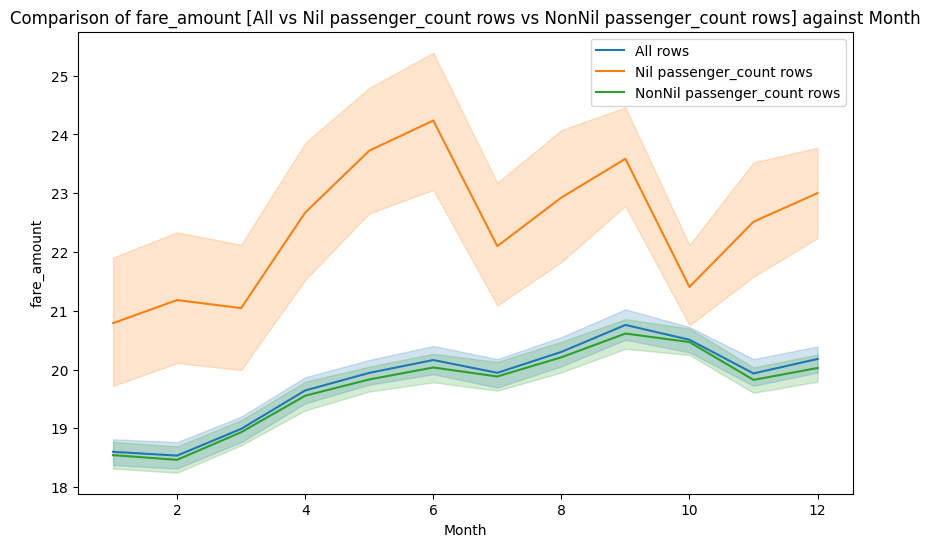

In [65]:
# let's plot fare_amount for passenger_count_nil_df vs df
plot_dataframes(df_sampled, passenger_count_nil_df, valid_rows_df,
                        'Month', 'fare_amount', 'Nil passenger_count rows', 'NonNil passenger_count rows')

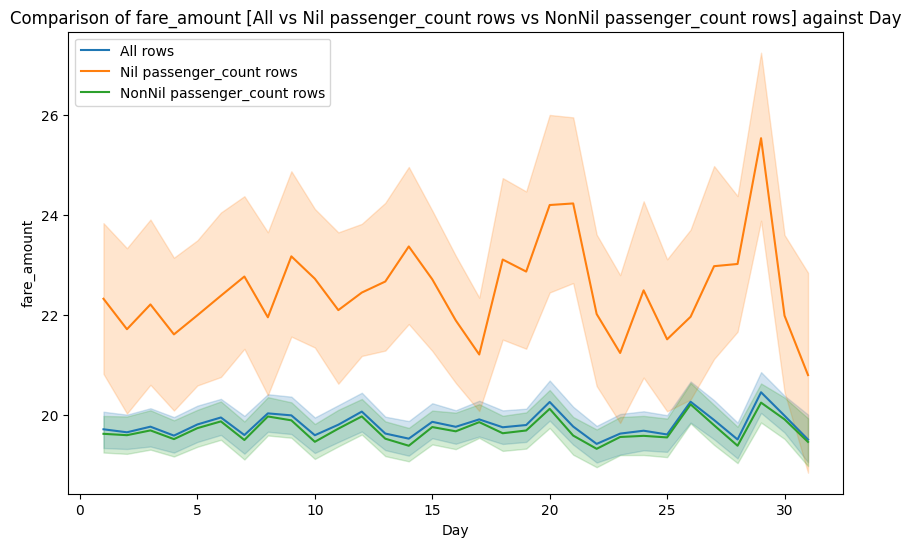

In [66]:
# let's plot fare_amount for passenger_count_nil_df vs df
plot_dataframes(df_sampled, passenger_count_nil_df, valid_rows_df,
                        'Day', 'fare_amount', 'Nil passenger_count rows', 'NonNil passenger_count rows')

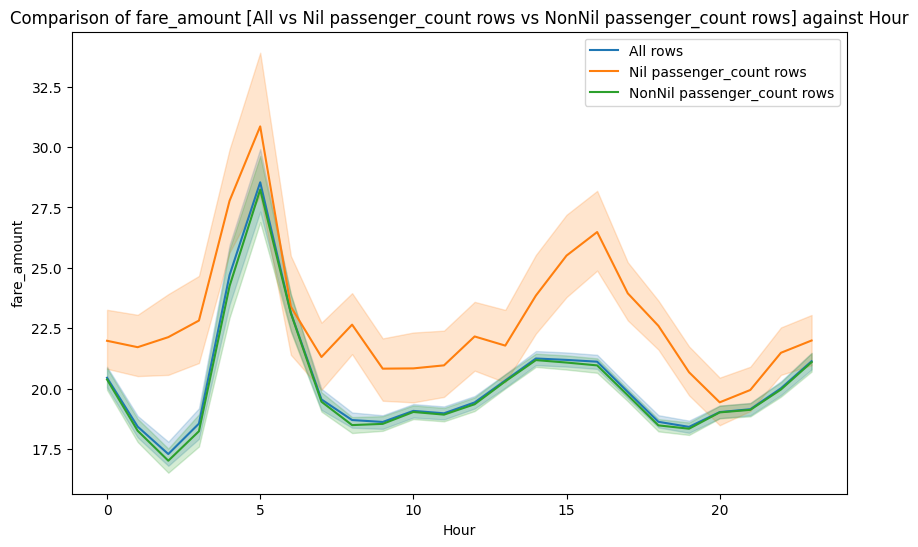

In [67]:
# plot for fare_amount against Hour
plot_dataframes(df_sampled, passenger_count_nil_df, valid_rows_df, 'Hour', 'fare_amount',
                'Nil passenger_count rows', 'NonNil passenger_count rows')

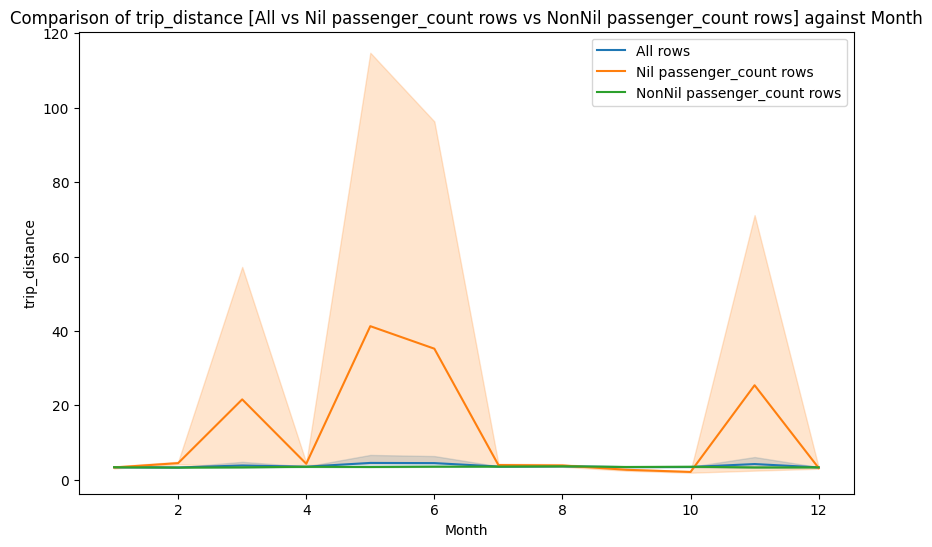

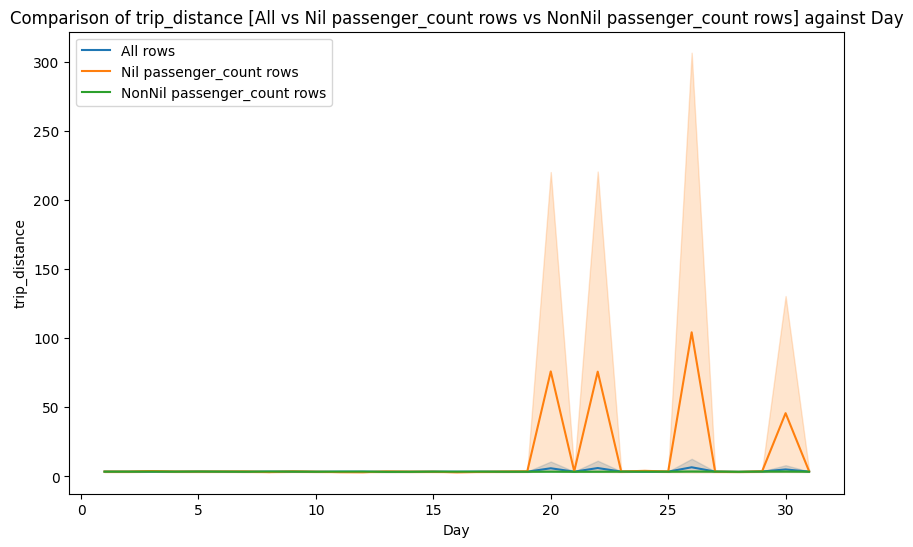

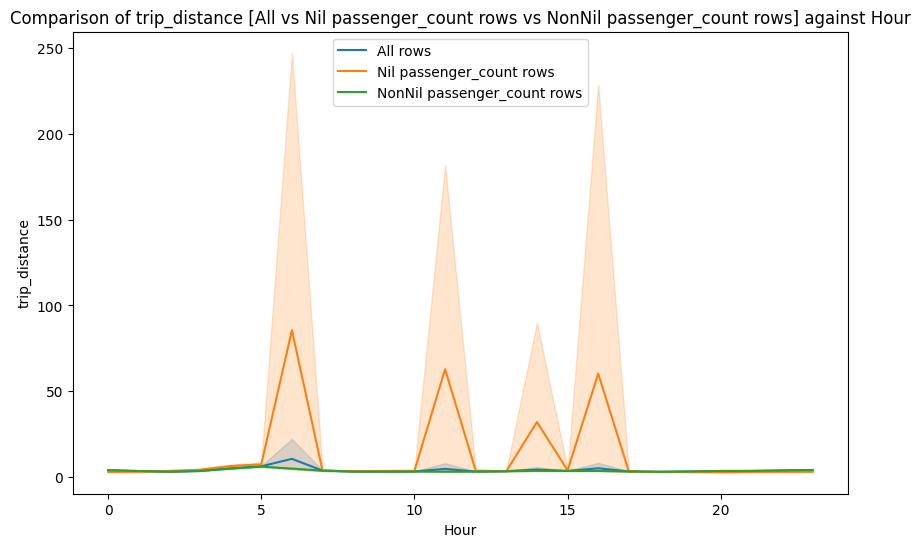

In [68]:
# plot for trip_distance vs Month, Day and Hour
plot_dataframes(df_sampled, passenger_count_nil_df, valid_rows_df, 'Month', 'trip_distance',
                'Nil passenger_count rows', 'NonNil passenger_count rows')
plot_dataframes(df_sampled, passenger_count_nil_df, valid_rows_df, 'Day', 'trip_distance',
                'Nil passenger_count rows', 'NonNil passenger_count rows')
plot_dataframes(df_sampled, passenger_count_nil_df, valid_rows_df, 'Hour', 'trip_distance',
                'Nil passenger_count rows', 'NonNil passenger_count rows')

**Observation**:

1.   On comparison of the fare_amounts against Month, it looks like the fare_amount is charged always higher for nil rows, than the ones with non-nil rows.
2.   While comparing them against 'Month', it looks like there is a peak observed during the holiday months.
3.   There are some Hourly peaks as well.


**Observation**: Taking into account all these, we cannot remove these rows, as these could have valid data.

**Action**:
1.  Keep the rows and impute values to the missing column rows.

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [69]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print("No of rows having nil passenger_count: ", df_sampled['passenger_count'].isna().sum())

No of rows having nil passenger_count:  9779


**Action**:
1.  Since fare_amounts are on the higher side, as we observed previously, we can impute values to fields such as passenger_count accordingly.


In [70]:
df_sampled['passenger_count'].value_counts()

passenger_count
1.0    206675
2.0     41576
3.0     10172
4.0      5698
0.0      4546
5.0      3608
6.0      2425
Name: count, dtype: int64

**Observation**: As we have seen previously, the peaks are during holiday months. And we see mode as 1.<br>
For these cases, let's go with passenger_count as 2, as this is in-line with our assumption of these trips being taken while on vacations or leisures.

In [71]:
# filling with passenger count as 2 for missing values
df_sampled['passenger_count'].fillna(2, inplace=True)
print("After imputing, No of rows having nil passenger_count: ",
      df_sampled['passenger_count'].isna().sum())

After imputing, No of rows having nil passenger_count:  0


Did you find zeroes in passenger_count? Handle these.

In [72]:
print("No of rows having zero passenger_count: ",
      df_sampled[df_sampled['passenger_count'] == 0].shape[0])

No of rows having zero passenger_count:  4546


In [73]:
# utility function to find the proportion of zero values compared to the total set
# it will work on a list of columns
def find_zero_values_proportion(df, cols):
  total_rows = df.shape[0]
  for col in cols:
    zero_vals = df[df[col] == 0].shape[0]
    if zero_vals > 0:
      zero_val_perc = round(zero_vals/total_rows*100, 2)
      print(f"Zero values percentage in {col}: ({zero_val_perc}%)")
    else:
      print(f"No zero values in {col}")


In [74]:
#find the ratio of the zero values for all monetory columns
find_zero_values_proportion(df_sampled, monetory_cols)

Zero values percentage in fare_amount: (0.03%)
Zero values percentage in extra: (39.87%)
Zero values percentage in mta_tax: (0.93%)
Zero values percentage in tip_amount: (22.86%)
Zero values percentage in tolls_amount: (91.92%)
Zero values percentage in improvement_surcharge: (0.05%)
Zero values percentage in total_amount: (0.02%)
Zero values percentage in congestion_surcharge: (7.32%)
Zero values percentage in Airport_fee: (88.16%)


**Observation**: Just a high level analysis on the monetory columns show that the zero values percentage is as expected.<br>
For eg: We see around 90% of the tolls/airport fees are zeros. It is inline with the understanding that the frequency of airport cabs and routes with tolls will be less.<br>
And on the other side, we see very few cases where fare_amount and total_amount have zero values.<br>
Another way of saying this is:


1.  Around **90%** of cabs, no tolls were applied. These could mean that they are mostly shorter travels, or routes does not include tolls.
2.  Only around **12%** of cabs are used for ***airport transfers***.
3.  Around **80%** of passengers ***have given tips*** to the cab driver, in addition to the travel fare.<br>Ofcourse, this does not include the cash tips.
4.  Around **60%** of passengers have paid extra amounts mostly since they are booked ***during peak/night times***.
5.  Congestion surcharges **are only applied for close to 7% of the trips**.<br>This needs to be analyzed further to check if the surcharges are correctly applied on all the congestion zones identified.



In [75]:
#utility function to compare zero values vs non-zero values against monetory columns
# currently only count, mean, min and max are added.
# this can be extended if needed
def compare_zero_vs_nonzero_col_vals(df, col, against_monetory_cols):
  df_zero = df[df[col] == 0]
  df_nonzero = df[df[col] != 0]
  print(f"{col}, containing zero vals Summary against monetary columns:")
  print(df_zero.groupby(col)[against_monetory_cols].agg(['count', 'mean', 'min', 'max']))
  print("-----------------------------------------------------------")
  print(f"{col}, containing non-zero vals Summary against monetary columns:")
  print(df_nonzero.groupby(col)[against_monetory_cols].agg(['count', 'mean', 'min', 'max']))

In [76]:
# let's compare zero values vs non-zero values against monetory columns
# for passenger_count column
compare_zero_vs_nonzero_col_vals(df_sampled, 'passenger_count', ['fare_amount', 'total_amount'])

passenger_count, containing zero vals Summary against monetary columns:
                fare_amount                        total_amount             \
                      count       mean  min    max        count       mean   
passenger_count                                                              
0.0                    4546  17.224089  0.0  175.9         4546  25.521016   

                              
                 min     max  
passenger_count               
0.0              0.0  222.15  
-----------------------------------------------------------
passenger_count, containing non-zero vals Summary against monetary columns:
                fare_amount                         total_amount             \
                      count       mean   min    max        count       mean   
passenger_count                                                               
1.0                  206675  19.054024  0.00  720.0       206675  28.046067   
2.0                   51355  22.250660 

**Observation**: Since zero values is a relatively small percentage, we can choose to remove them, or impute to either passenger_count as 5 or 1<br>
Reason being, when compared against the set of monetory columns such as fare_amount and total_amount, zero values of passenger_count has comparable means with either passenger_count 1 or 5<br>

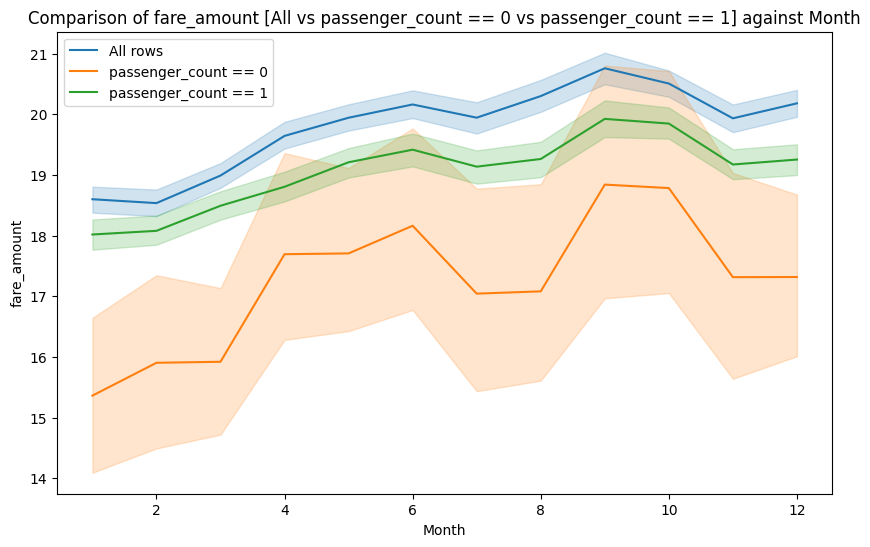

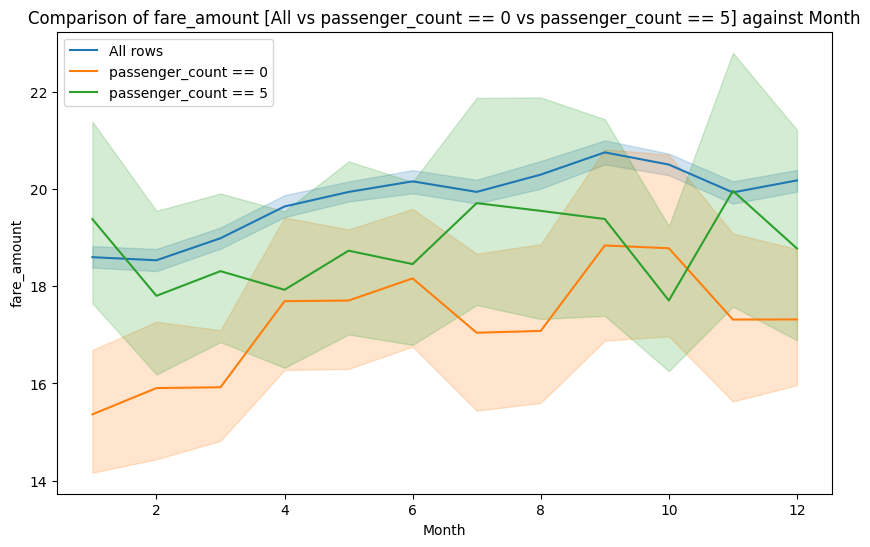

In [77]:
passenger_count_0_df = query_on_df(df_sampled, 'passenger_count == 0')
passenger_count_1_df = query_on_df(df_sampled, 'passenger_count == 1')
passenger_count_5_df = query_on_df(df_sampled, 'passenger_count == 5')

plot_dataframes(df_sampled, passenger_count_0_df, passenger_count_1_df, 'Month', 'fare_amount',
                'passenger_count == 0', 'passenger_count == 1')
plot_dataframes(df_sampled, passenger_count_0_df, passenger_count_5_df, 'Month', 'fare_amount',
                'passenger_count == 0', 'passenger_count == 5')

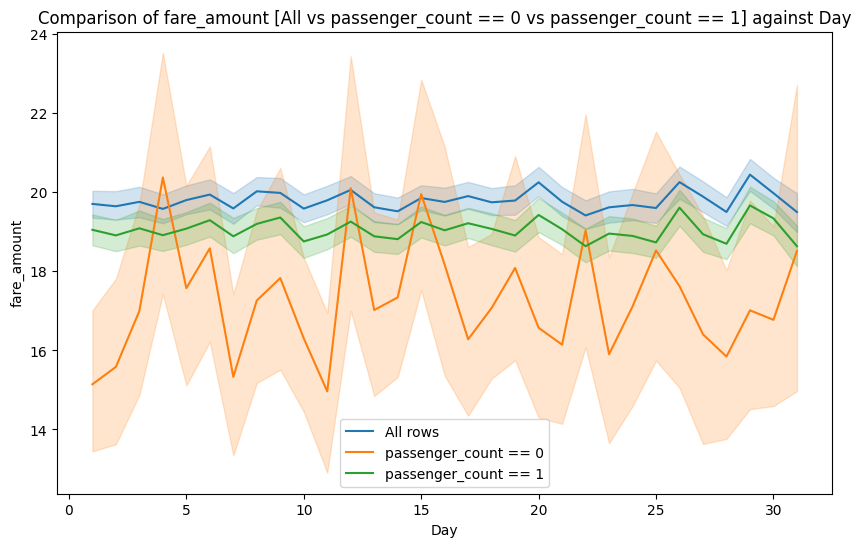

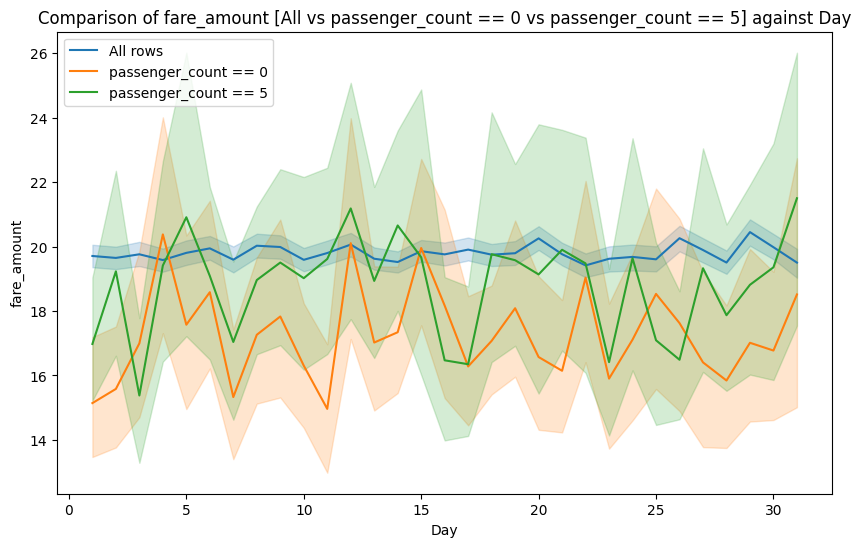

In [78]:
plot_dataframes(df_sampled, passenger_count_0_df, passenger_count_1_df, 'Day', 'fare_amount',
                'passenger_count == 0', 'passenger_count == 1')
plot_dataframes(df_sampled, passenger_count_0_df, passenger_count_5_df, 'Day', 'fare_amount',
                'passenger_count == 0', 'passenger_count == 5')

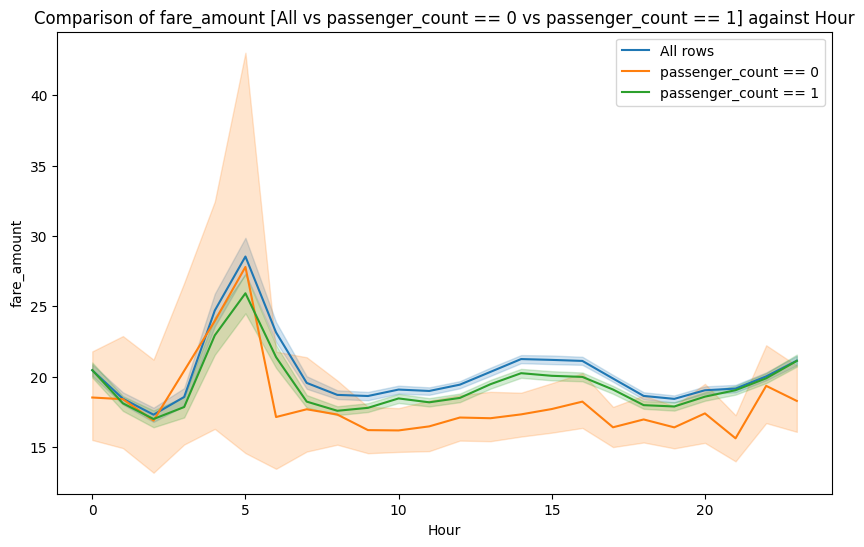

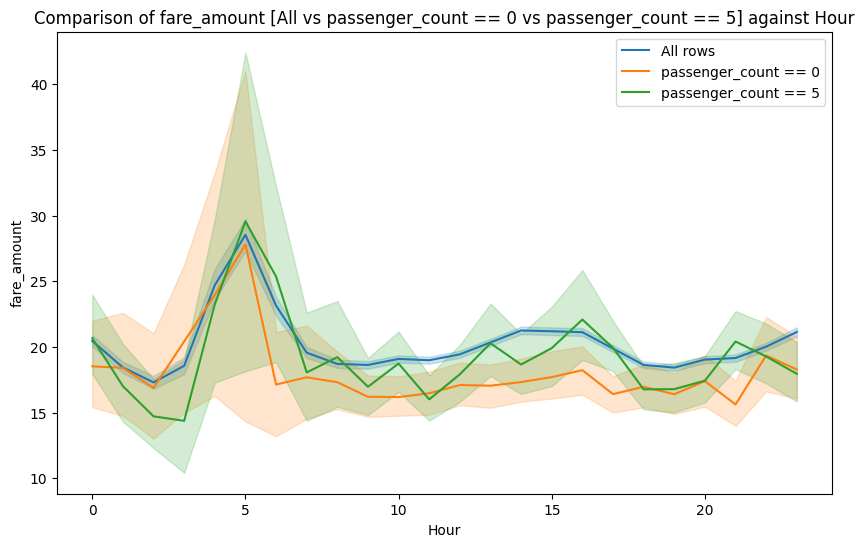

In [79]:
plot_dataframes(df_sampled, passenger_count_0_df, passenger_count_1_df, 'Hour', 'fare_amount',
                'passenger_count == 0', 'passenger_count == 1')
plot_dataframes(df_sampled, passenger_count_0_df, passenger_count_5_df, 'Hour', 'fare_amount',
                'passenger_count == 0', 'passenger_count == 5')

**Observation**: The means are comparable to passenger_count 5. Using this to impute for zero values in passenger_count

In [80]:
# utility function to get the mode
def get_mode(df, col):
  return df[col].mode()[0]

In [81]:
# change the passenger_count to 5, where it is 0
# since this is in-line with the comparison
df_sampled.loc[df_sampled['passenger_count'] == 0, 'passenger_count'] = 5

In [82]:
# check if passenger_count has any nil values or values less than 0
print(f"Nil passenger count: {df_sampled['passenger_count'].isna().sum()}",
      f"Zero passenger count: {(df_sampled['passenger_count'] <= 0).sum()}")

Nil passenger count: 0 Zero passenger count: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [83]:
# Fix missing values in 'RatecodeID'
print("Missing values in RatecodeID: ", df_sampled['RatecodeID'].isna().sum())

Missing values in RatecodeID:  9779


**Action**: Following the same approach as what we did for passenger_count, we can set the RatecodeID as 5(Negotiated fare)<br>
Reason being that these are not Standard Rates applied, as we saw fare_amounts were relatively higher.

In [84]:
# replacing rows with null RatecodeID with 5
df_sampled['RatecodeID'].fillna(5, inplace=True)

In [85]:
# find latest missing values proportion now
find_missing_values_proportion(df_sampled)

Missing values percentage in store_and_fwd_flag: (3.44%)
Missing values percentage in congestion_surcharge: (3.44%)
Missing values percentage in Airport_fee: (3.44%)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [86]:
# handle null values in congestion_surcharge
print("Nil values in congestion_surcharge: ", df_sampled['congestion_surcharge'].isna().sum())

Nil values in congestion_surcharge:  9779


In [87]:
# let's check the most used values in congestion_surcharge
df_sampled['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    253871
0.0     20829
Name: count, dtype: int64

**Observation**:
1.  From Previous observation, we know that both congestion_surcharge and Airport_fee have NaN values for the same rows.<br>Hence we can impute them together.
2.  From high level analysis, we can see that the total_amount is having some delta, as the congestion_surcharge and Airport_fee have been applied on calculation, but missed in this.


In [88]:
# before imputing for them, add a column 'IsImputed' to mark them
df_sampled['IsImputed'] = df_sampled['congestion_surcharge'].isna()

In [89]:
df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:54:15   2023-01-01 01:01:43              1.0   
1         2  2023-01-01 00:20:37   2023-01-01 00:33:43              1.0   
2         2  2023-01-01 00:42:30   2023-01-01 00:58:00              1.0   
3         1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
4         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.30         1.0                  N            90           211   
1           5.35         1.0                  N           236           244   
2           4.13         1.0                  N            79           236   
3          21.00         2.0                  N           132           238   
4           0.90         1.0                  N           148           114   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             1  ...        2.85          0.00                    1.0   
1             1  ...        5.66          0.00                    1.0   
2             1  ...        4.96          0.00                    1.0   
3             1  ...        0.00          6.55                    1.0   
4             1  ...        1.00          0.00                    1.0   

   total_amount  congestion_surcharge  Month  Day  Hour  Airport_fee  \
0         17.15                   2.5      1    1     0         0.00   
1         33.96                   2.5      1    1     0         0.00   
2         29.76                   2.5      1    1     0         0.00   
3         81.80                   2.5      1    1     0         1.25   
4         13.90                   2.5      1    1     0         0.00   

   IsImputed  
0      False  
1      False  
2      False  
3      False  
4      False  

[5 rows x 23 columns]

In [90]:
cong_surcharge_nil_df = query_on_df(df_sampled, 'congestion_surcharge.isna()')

In [91]:
# utility function to create 'calculated_total'
def calculate_total_amount(df, cols):
  df['calculated_total'] = df[cols].sum(axis=1).round(2)
  return df

In [92]:
# calculate total and store in cong_surcharge_nil_df itself
cong_surcharge_nil_df = calculate_total_amount(cong_surcharge_nil_df,
 ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
  'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'])

In [93]:
cong_surcharge_nil_df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
  'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'total_amount', 'calculated_total']]

fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
9             27.42    0.0      0.5        7.86          0.00   
33            25.13    0.0      0.5        4.37          0.00   
36            12.80    0.0      0.5        2.86          0.00   
37            45.38    0.0      0.5       11.19          6.55   
38            18.48    0.0      0.5        3.37          0.00   
...             ...    ...      ...         ...           ...   
284440        21.70    0.0      0.5        0.00          0.00   
284443        53.72    0.0      0.5       11.04          0.00   
284445        30.26    0.0      0.5        0.00          0.00   
284464        34.93    0.0      0.5        0.00          0.00   
284474         8.74    0.0      0.5        0.00          0.00   

        improvement_surcharge  congestion_surcharge  Airport_fee  \
9                         1.0                   NaN          NaN   
33                        1.0                   NaN          NaN   
36                        1.0                   NaN          NaN   
37                        1.0                   NaN          NaN   
38                        1.0                   NaN          NaN   
...                       ...                   ...          ...   
284440                    1.0                   NaN          NaN   
284443                    1.0                   NaN          NaN   
284445                    1.0                   NaN          NaN   
284464                    1.0                   NaN          NaN   
284474                    1.0                   NaN          NaN   

        total_amount  calculated_total  
9              39.28             36.78  
33             33.50             31.00  
36             17.16             17.16  
37             67.12             64.62  
38             25.85             23.35  
...              ...               ...  
284440         25.70             23.20  
284443         66.26             66.26  
284445         31.76             31.76  
284464         38.93             36.43  
284474         12.74             10.24  

[9779 rows x 10 columns]

In [94]:
# check the difference
cong_surcharge_nil_df['difference'] = (cong_surcharge_nil_df['total_amount'].round(2) - cong_surcharge_nil_df['calculated_total'].round(2)).round(2)

In [95]:
cong_surcharge_nil_df['difference'].value_counts()

difference
2.5    8765
0.0     926
4.5      80
2.0       8
Name: count, dtype: int64

In [96]:
# utility function to impute value based on a set of conditions for a given col
def apply_value_on_conditions(df, imputeCol, conditionCol, conditions, default_value):
  def condition_function(row):
    for condition, value in conditions:
      if condition(row[conditionCol]):
        return value
    return default_value

  # Apply the condition function to each row in the DataFrame
  df[imputeCol] = df.apply(condition_function, axis=1)
  return df

In [97]:
# define the conditions here for congestion_surcharge
condition_1 = lambda x: round(x, 2) >= 2.50
condition_2 = lambda x: round(x, 2) < 2.50

# List of conditions with their corresponding values
cong_surcharge_conditions = [
    (condition_1, 2.50),  # If condition_1 is met, assign 2.50
    (condition_2, 0.00)   # If condition_2 is met, assign 0.00
]

In [98]:
cong_surcharge_nil_df = apply_value_on_conditions(cong_surcharge_nil_df, 'congestion_surcharge', 'difference',
                          cong_surcharge_conditions, np.nan)

In [99]:
# recalculate difference and check the value_counts now
cong_surcharge_nil_df = calculate_total_amount(cong_surcharge_nil_df,
 ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
  'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'])
cong_surcharge_nil_df['difference'] = (cong_surcharge_nil_df['total_amount'].round(2) - cong_surcharge_nil_df['calculated_total'].round(2)).round(2)

In [100]:
cong_surcharge_nil_df['difference'].value_counts()

difference
0.0    9691
2.0      88
Name: count, dtype: int64

In [101]:
cong_surcharge_nil_df['congestion_surcharge'].isna().sum()

np.int64(0)

**Observation**:
1.  Now nil rows are 0 for congestion_surcharge
2.  Now check for Airport_fee

In [102]:
# check the mode for Airport_fee
df_sampled['Airport_fee'].value_counts()

Airport_fee
0.00    250806
1.75     18007
1.25      5887
Name: count, dtype: int64

In [103]:
# let's use mode for imputing value to Airport_fee
df_sampled['Airport_fee'].fillna(get_mode(df_sampled, 'Airport_fee').round(2), inplace=True)

In [104]:
df_sampled['Airport_fee'].isna().sum()

np.int64(0)

In [105]:
# let's merge the values imputed in cong_surcharge_nil_df for congestion_surcharge to df_sampled
df_sampled.update(cong_surcharge_nil_df[['congestion_surcharge']])

In [106]:
df_sampled['congestion_surcharge'].isna().sum()

np.int64(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [107]:
# find latest missing values proportion now
find_missing_values_proportion(df_sampled)

Missing values percentage in store_and_fwd_flag: (3.44%)


In [108]:
df_sampled['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    272955
Y      1745
Name: count, dtype: int64

**Action**: For store_and_fwd_flag, impute the value 'Y' as we can consider these to be treated the same as trip stored in vehicle memory and shared later.

In [109]:
df_sampled['store_and_fwd_flag'].fillna('Y', inplace=True)

All missing values are handled.

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [110]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
print(df_sampled[monetory_cols].describe())

         fare_amount          extra        mta_tax     tip_amount  \
count  284479.000000  284479.000000  284479.000000  284479.000000   
mean       19.795864       1.588110       0.495341       3.548195   
std        18.117261       1.829168       0.048110       4.059000   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.850000   
75%        21.900000       2.500000       0.500000       4.450000   
max       720.000000      14.250000       0.800000     200.000000   

        tolls_amount  improvement_surcharge   total_amount  \
count  284479.000000          284479.000000  284479.000000   
mean        0.594686               0.999037      28.856941   
std         2.180131               0.028799      22.685596   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%   

In [111]:
# check for non-monetory columns
print(df_sampled[non_monetory_cols].describe())

            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  284479.000000                      284479                      284479   
mean        1.732174  2023-07-02 19:26:56.751159  2023-07-02 19:44:19.989380   
min         1.000000         2023-01-01 00:00:57         2023-01-01 00:13:27   
25%         1.000000  2023-04-02 15:41:17.500000  2023-04-02 16:03:30.500000   
50%         2.000000         2023-06-27 15:11:16         2023-06-27 15:31:09   
75%         2.000000  2023-10-06 19:10:26.500000  2023-10-06 19:30:35.500000   
max         6.000000         2023-12-31 23:54:28         2024-01-01 00:22:07   
std         0.447722                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    284479.000000  284479.000000  284479.000000  284479.000000   
mean          1.469398       3.738787       1.752759     165.385100   
min           1.000000       0.000000       1.000000       1.00000

**Observation**:
1.  VendorID has 6 as maximum. We only have two vendorIDs(1&2)
1.  trip_distance has a minimum of 0 miles and maximum of 27586 miles.
2.  RatecodeID has 99(Invalid RatecodeID)
3.  We see PULocationID and DOLocationID having max of 265. For this dataset, we only need to consider LocationIDs within the range 1-263

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [112]:
# remove passenger_count > 7
df_sampled = remove_rows(df_sampled, query_on_df(df_sampled, 'passenger_count > 7'))

In [113]:
# let's create trip_duration column based on tpep_pickup_datetime and tpep_dropoff_datetime
df_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_sampled['tpep_pickup_datetime'])
df_sampled['tpep_dropoff_datetime'] = pd.to_datetime(df_sampled['tpep_dropoff_datetime'])
df_sampled['trip_duration_mins'] = (df_sampled['tpep_dropoff_datetime'] - df_sampled['tpep_pickup_datetime']).dt.total_seconds() / 60

In [114]:
# Continue with outlier handling
df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:54:15   2023-01-01 01:01:43              1.0   
1         2  2023-01-01 00:20:37   2023-01-01 00:33:43              1.0   
2         2  2023-01-01 00:42:30   2023-01-01 00:58:00              1.0   
3         1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
4         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.30         1.0                  N            90           211   
1           5.35         1.0                  N           236           244   
2           4.13         1.0                  N            79           236   
3          21.00         2.0                  N           132           238   
4           0.90         1.0                  N           148           114   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
0             1  ...          0.00                    1.0         17.15   
1             1  ...          0.00                    1.0         33.96   
2             1  ...          0.00                    1.0         29.76   
3             1  ...          6.55                    1.0         81.80   
4             1  ...          0.00                    1.0         13.90   

   congestion_surcharge  Month  Day  Hour  Airport_fee  IsImputed  \
0                   2.5      1    1     0         0.00      False   
1                   2.5      1    1     0         0.00      False   
2                   2.5      1    1     0         0.00      False   
3                   2.5      1    1     0         1.25      False   
4                   2.5      1    1     0         0.00      False   

   trip_duration_mins  
0            7.466667  
1           13.100000  
2           15.500000  
3           36.183333  
4            7.166667  

[5 rows x 24 columns]

In [115]:
# check where trip_distance is nearly 0 and fare_amount greater than 300
outlier_df_1 = query_on_df(df_sampled, 'trip_distance < 1 and fare_amount > 300')

In [116]:
outlier_df_1[['fare_amount', 'store_and_fwd_flag', 'payment_type', 'RatecodeID', 'PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration_mins', 'IsImputed']]

fare_amount store_and_fwd_flag  payment_type  RatecodeID  \
126426        450.0                  N             1         5.0   
180193        399.0                  N             1         5.0   
183234        350.0                  N             1         5.0   
184632        400.0                  N             1         5.0   
188662        400.0                  N             1         5.0   

        PULocationID  DOLocationID tpep_pickup_datetime tpep_dropoff_datetime  \
126426            94            94  2023-06-08 04:59:03   2023-06-08 04:59:38   
180193           132           132  2023-08-20 21:39:04   2023-08-20 21:39:12   
183234           265           265  2023-08-25 16:13:28   2023-08-25 16:13:42   
184632           260           260  2023-08-27 18:46:43   2023-08-27 18:47:01   
188662           226           226  2023-09-02 22:01:05   2023-09-02 22:01:20   

        trip_duration_mins  IsImputed  
126426            0.583333      False  
180193            0.133333      False  
183234            0.233333      False  
184632            0.300000      False  
188662            0.250000      False

**Observations**:

1.   RatecodeID is 5("Negotiated Fare")<br>And also the pick up and drop off locations are the same.<br>Add to the fact that all of these trips were completed in the same minute, these are clearly outliers.




In [117]:
# clear these outliers
df_sampled = remove_rows(df_sampled, outlier_df_1)

In [118]:
# check if there are any entries where trip_distance is more than 250 miles
outlier_df_2 = query_on_df(df_sampled, 'trip_distance > 250')

In [119]:
outlier_df_2[['trip_distance', 'trip_duration_mins', 'fare_amount', 'payment_type', 'RatecodeID', 'PULocationID', 'DOLocationID', 'IsImputed']]

trip_distance  trip_duration_mins  fare_amount  payment_type  \
68455        12133.27                85.0        77.00             0   
116565       27586.37                34.0        46.43             0   
137888       22562.67                13.0        16.32             0   
251685       22869.37                44.0        27.39             0   

        RatecodeID  PULocationID  DOLocationID  IsImputed  
68455          5.0            50           132       True  
116565         5.0           230            17       True  
137888         5.0           151           237       True  
251685         5.0           179           237       True

**Observation**:
1.   These are all imputed rows.
2.   The trip_distances are upwards of 12k miles. These are highly unlikely to be travelled in the trip durations seen.
<br> These are clearly outliers and can be removed.



In [120]:
df_sampled = remove_rows(df_sampled, outlier_df_2)

In [121]:
# entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
outlier_df_3 = query_on_df(df_sampled, 'trip_distance == 0 & fare_amount == 0 & (PULocationID != DOLocationID)')

In [122]:
outlier_df_3[['trip_distance', 'fare_amount', 'trip_duration_mins', 'passenger_count', 'payment_type', 'RatecodeID', 'PULocationID', 'DOLocationID', 'IsImputed']]

trip_distance  fare_amount  trip_duration_mins  passenger_count  \
95557             0.0          0.0            0.000000              1.0   
126839            0.0          0.0            0.000000              1.0   
131520            0.0          0.0            0.000000              5.0   
146422            0.0          0.0           47.766667              1.0   
210198            0.0          0.0           27.533333              2.0   
246448            0.0          0.0           10.166667              1.0   
249223            0.0          0.0           24.066667              1.0   

        payment_type  RatecodeID  PULocationID  DOLocationID  IsImputed  
95557              2         5.0            75           264      False  
126839             2         5.0           132           264      False  
131520             2         5.0           265           264      False  
146422             1         1.0            89            39      False  
210198             0         5.0           262           230       True  
246448             1         1.0            74            41      False  
249223             1        99.0            74           234      False

**Observation**:
1.  There are trips that have completed in no time.
2. 	Some trips have higher trip durations, but the distance or fare_amount don’t reflect that.
3.	We see invalid RatecodeID(99) as well.
These can be considered as outliers as they don’t serve any purpose for identifying any trends.

Analyze RatecodeID 99 further, and see if this can be imputed.




In [123]:
# clear these rows
df_sampled = remove_rows(df_sampled, outlier_df_3)

In [124]:
# check for invalid RatecodeID
df_sampled['RatecodeID'].value_counts()

RatecodeID
1.0     259517
5.0      11311
2.0      10634
99.0      1579
3.0        894
4.0        527
6.0          1
Name: count, dtype: int64

In [125]:
# RatecodeID 99 seems to be the only outlier.
ratecodeID_99_df = query_on_df(df_sampled, 'RatecodeID == 99')

In [126]:
ratecodeID_99_df.shape[0]/df_sampled.shape[0]*100

0.5550809771393819

In [127]:
ratecodeID_99_df[monetory_cols].describe()

fare_amount       extra      mta_tax  tip_amount  tolls_amount  \
count  1579.000000  1579.00000  1579.000000      1579.0   1579.000000   
mean     32.927707     0.00285     0.498417         0.0      1.687815   
std      14.096263     0.07225     0.028100         0.0      3.531309   
min       0.000000     0.00000     0.000000         0.0      0.000000   
25%      21.050000     0.00000     0.500000         0.0      0.000000   
50%      30.500000     0.00000     0.500000         0.0      0.000000   
75%      42.500000     0.00000     0.500000         0.0      0.000000   
max     160.000000     2.50000     0.500000         0.0     33.560000   

       improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
count            1579.000000   1579.000000                1579.0       1579.0  
mean                0.996833     36.113623                   0.0          0.0  
std                 0.056201     16.143924                   0.0          0.0  
min                 0.000000      0.000000                   0.0          0.0  
25%                 1.000000     22.500000                   0.0          0.0  
50%                 1.000000     32.000000                   0.0          0.0  
75%                 1.000000     47.000000                   0.0          0.0  
max                 1.000000    160.000000                   0.0          0.0

In [128]:
valid_ratecodes_df = query_on_df(df_sampled, 'RatecodeID != 99')

In [129]:
valid_ratecodes_df.groupby('RatecodeID')['fare_amount'].describe()

count        mean        std  min     25%    50%      75%  \
RatecodeID                                                                 
1.0         259517.0   16.825834  12.488844  0.0   9.300  12.80   19.800   
2.0          10634.0   69.957401   1.668967  0.0  70.000  70.00   70.000   
3.0            894.0   87.234899  27.073187  0.0  82.500  89.50   97.200   
4.0            527.0  111.254839  66.696033  0.0  65.300  99.60  140.900   
5.0          11311.0   29.193690  29.787496  0.0  13.325  19.93   32.195   
6.0              1.0    2.500000        NaN  2.5   2.500   2.50    2.500   

              max  
RatecodeID         
1.0         301.2  
2.0          70.0  
3.0         328.2  
4.0         497.2  
5.0         720.0  
6.0           2.5

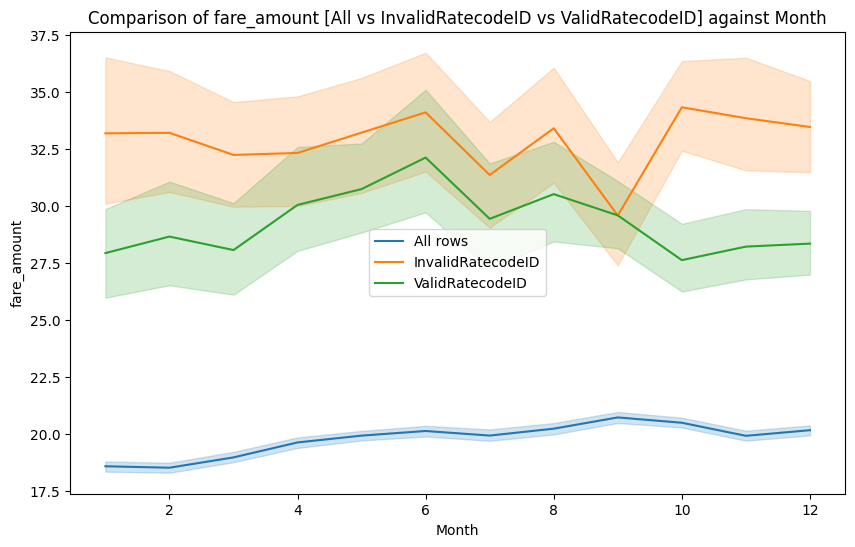

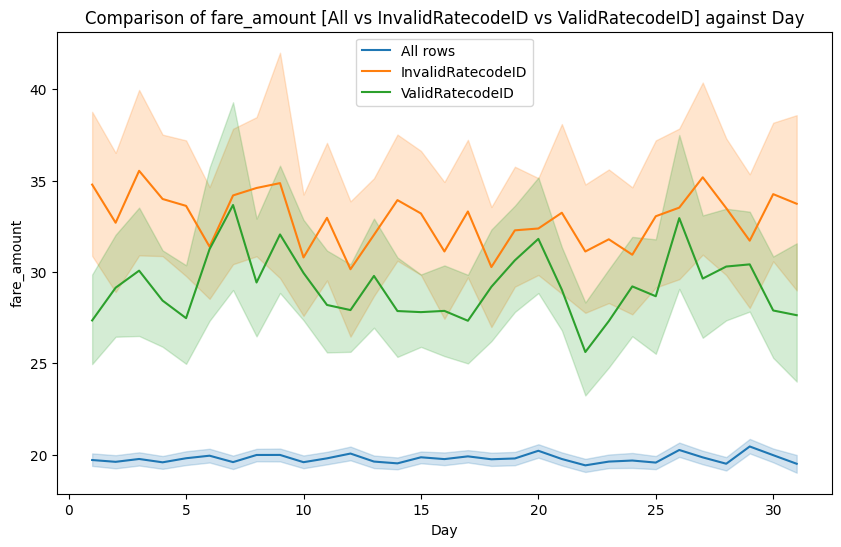

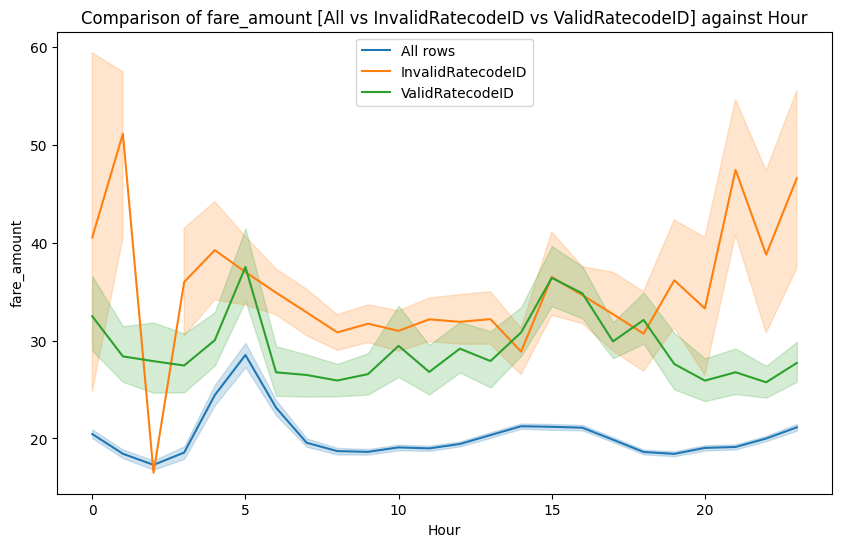

In [130]:
# plot ratecodeID 99 vs ratecodeID 5
ratecodeID_5_df = query_on_df(df_sampled, 'RatecodeID == 5')
plot_dataframes(df_sampled, ratecodeID_99_df, ratecodeID_5_df, 'Month', 'fare_amount',
                'InvalidRatecodeID', 'ValidRatecodeID')
plot_dataframes(df_sampled, ratecodeID_99_df, ratecodeID_5_df, 'Day', 'fare_amount',
                'InvalidRatecodeID', 'ValidRatecodeID')
plot_dataframes(df_sampled, ratecodeID_99_df, ratecodeID_5_df, 'Hour', 'fare_amount',
                'InvalidRatecodeID', 'ValidRatecodeID')


**Observation**: These have comparable means with RatecodeID 5(Negotiated Fare).
Hence we can use this to impute for the same.

In [131]:
# update RatecodeID to 5 where RatecodeID is 99
df_sampled.loc[df_sampled['RatecodeID'] == 99, 'RatecodeID'] = 5

In [132]:
# check where payment_type == 0
outlier_df_4 = query_on_df(df_sampled, 'payment_type == 0')

In [133]:
outlier_df_4[['RatecodeID', 'fare_amount', 'total_amount']].describe()

RatecodeID  fare_amount  total_amount
count      9774.0  9774.000000   9774.000000
mean          5.0    22.518150     29.969657
std           0.0    14.353572     17.958375
min           5.0     0.000000      0.000000
25%           5.0    12.940000     19.020000
50%           5.0    18.510000     24.610000
75%           5.0    27.600000     35.030000
max           5.0   196.820000    215.570000

In [134]:
outlier_df_4['IsImputed'].value_counts()

IsImputed
True    9774
Name: count, dtype: int64

**Observation**: Since these are all imputed rows, it is not recorded whether payment was by Card or Cash.<br>There is a defined payment_type - "Unknown" in the data dictionary, which can be used here.

In [135]:
# update payment_type to 5, where payment_type is 0
df_sampled.loc[df_sampled['payment_type'] == 0, 'payment_type'] = 5

**Action**: Let's check for other outliers by analyzing the columns independently.

In [136]:
# utility function for plotting boxplots
def plot_boxplots_subplots(df, columns_to_plot, rows=1, cols=None):
    # If cols is not provided, calculate it based on number of columns to plot
    if cols is None:
        cols = len(columns_to_plot)

    # Create the figure and axes for the subplots
    fig, axes = plt.subplots(rows, cols, figsize=(18, 6))

    # Flatten axes if there's more than one row and column
    if rows > 1 and cols > 1:
        axes = axes.flatten()

    # Loop through columns and create a boxplot in each subplot
    for i, col in enumerate(columns_to_plot):
        if rows == 1 and cols == 1:  # Handle single subplot
            sns.boxplot(x=df[col], ax=axes)
            axes.set_title(f'Boxplot of {col}')
            axes.set_xlabel(col)
        else:  # Handle multiple subplots
            sns.boxplot(x=df[col], ax=axes[i])
            axes[i].set_title(f'Boxplot of {col}')
            axes[i].set_xlabel(col)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

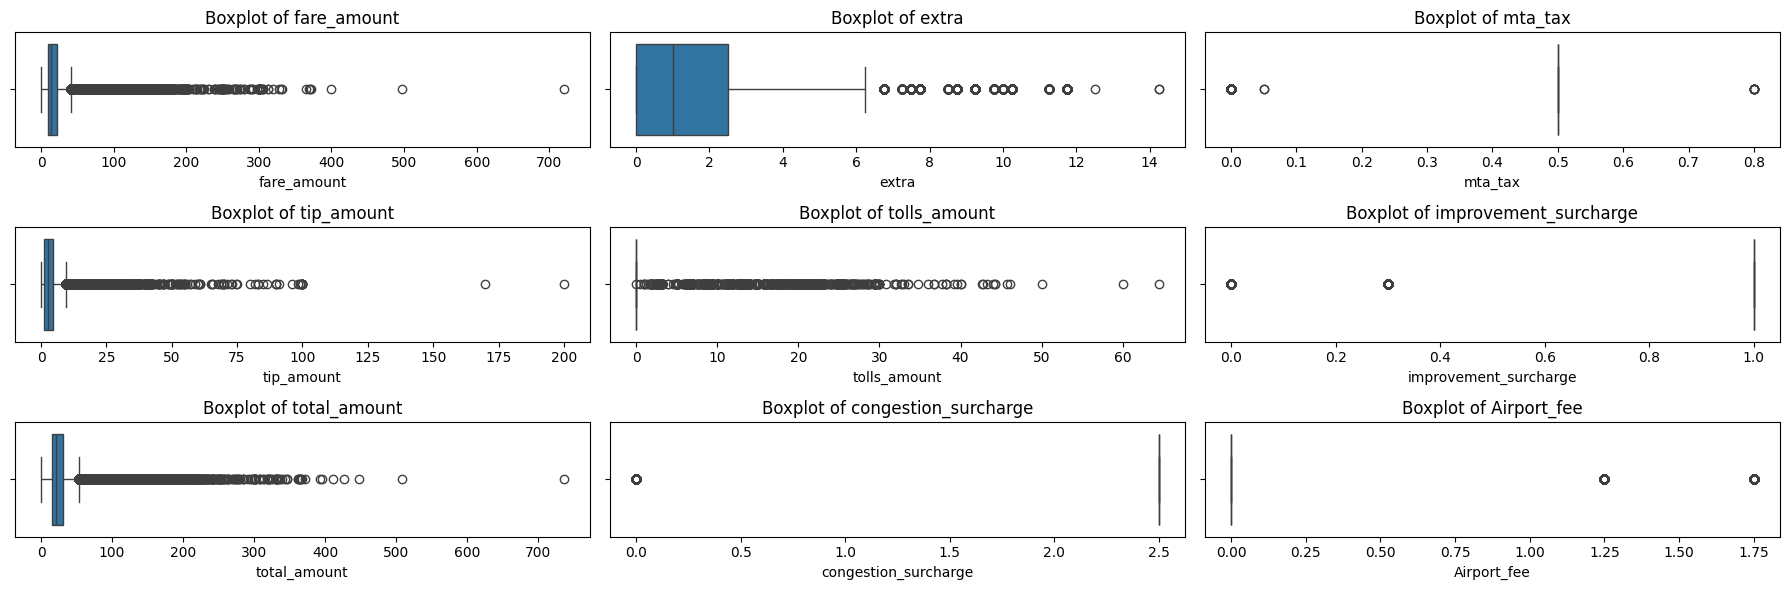

In [137]:
# plot all monetory columns
plot_boxplots_subplots(df_sampled, monetory_cols, rows=3, cols=3)

**Observation**:
1. There are some outliers seen mostly on fare_amount, tip_amount and thereby also impacting total_amount.
2. Although these may look like outliers, there is a possibility that this is actual data.

**Observation**: Some more outliers can be checked on these lines:
1. Check where fare_amount is greater than total_amount.
2. Calculate the total_amount and see if it matches the total_amount in the data
4. trip_distance is greater, but fare_amount or total_amount is less.
5. tpep_pickup_datetime cannot be after tpep_dropoff_datetime
6. trip_duration is greater, but fare_amount or total_amount is less.

**Additional outlier check** : Check where fare_amount is greater than total_amount.

In [138]:
# check for outliers
outlier_fare_gt_total_df = query_on_df(df_sampled, 'fare_amount > total_amount')

In [139]:
outlier_fare_gt_total_df.head()

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Month, Day, Hour, Airport_fee, IsImputed, trip_duration_mins]
Index: []

[0 rows x 24 columns]

**Observation**: There are no such rows where fare_amount is greater than total_amount.

**Additional outlier check**: Check if calculated_total and total_amount matches or not.

In [140]:
# create calculated_total
df_sampled = calculate_total_amount(df_sampled,
 ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
  'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'])

In [141]:
mismatch_total_df = query_on_df(df_sampled, 'calculated_total.round(2) != total_amount.round(2)')

In [142]:
mismatch_total_df[['calculated_total', 'total_amount', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
  'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'IsImputed']]

calculated_total  total_amount  fare_amount  extra  mta_tax  \
0                  19.65         17.15          9.3   3.50      0.5   
3                  85.55         81.80         70.0   3.75      0.5   
4                  16.40         13.90          7.9   3.50      0.5   
5                  14.11         11.61          5.1   3.50      0.5   
7                  17.95         15.45          7.9   3.50      0.5   
...                  ...           ...          ...    ...      ...   
284450             17.50         15.00         10.0   3.50      0.5   
284451             17.70         15.20          7.2   3.50      0.5   
284459             26.50         24.75         20.5   2.75      0.5   
284460             19.60         17.10         12.1   3.50      0.5   
284462             35.60         33.85         29.6   2.75      0.5   

        tip_amount  tolls_amount  improvement_surcharge  congestion_surcharge  \
0             2.85          0.00                    1.0                   2.5   
3             0.00          6.55                    1.0                   2.5   
4             1.00          0.00                    1.0                   2.5   
5             1.51          0.00                    1.0                   2.5   
7             2.55          0.00                    1.0                   2.5   
...            ...           ...                    ...                   ...   
284450        0.00          0.00                    1.0                   2.5   
284451        3.00          0.00                    1.0                   2.5   
284459        0.00          0.00                    1.0                   0.0   
284460        0.00          0.00                    1.0                   2.5   
284462        0.00          0.00                    1.0                   0.0   

        Airport_fee  IsImputed  
0              0.00      False  
3              1.25      False  
4              0.00      False  
5              0.00      False  
7              0.00      False  
...             ...        ...  
284450         0.00      False  
284451         0.00      False  
284459         1.75      False  
284460         0.00      False  
284462         1.75      False  

[68995 rows x 11 columns]

In [143]:
mismatch_total_df['difference'] = (mismatch_total_df['total_amount'].round(2) - mismatch_total_df['calculated_total'].round(2)).round(2)

In [144]:
mismatch_total_df['difference'].value_counts()

difference
-2.50    63517
-4.25     2132
-1.75     1607
-3.75      765
-1.25      601
 2.50      272
 2.00       87
-2.80        7
 1.95        6
-0.30        1
Name: count, dtype: int64

In [145]:
mismatch_total_df.shape[0]/df_sampled.shape[0]*100

24.254472462147977

In [146]:
mismatch_total_df.groupby('difference')['IsImputed'].value_counts()

difference  IsImputed
-4.25       False         2132
-3.75       False          765
-2.80       False            7
-2.50       False        63517
-1.75       False         1607
-1.25       False          601
-0.30       False            1
 1.95       False            6
 2.00       True            87
 2.50       False          272
Name: count, dtype: int64

**Observation**:
1.  Here we see that the difference -2.5 is for a comparatively larger percentage.
2.  Overall, close to 25% of the data has an error in calculation of the total_amount.
3.  The difference being in the range of -4.25 to 2.5
4.  This can impact revenue calculation.

2.  Let's fix these rows, by taking from calculated_total

In [147]:
mismatch_total_df_2_5 = query_on_df(mismatch_total_df, 'difference == -2.5')

In [148]:
mismatch_total_df_2_5[['calculated_total', 'total_amount', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
  'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'IsImputed']]

calculated_total  total_amount  fare_amount  extra  mta_tax  \
0                  19.65         17.15          9.3    3.5      0.5   
4                  16.40         13.90          7.9    3.5      0.5   
5                  14.11         11.61          5.1    3.5      0.5   
7                  17.95         15.45          7.9    3.5      0.5   
11                 45.05         42.55         31.0    3.5      0.5   
...                  ...           ...          ...    ...      ...   
284443             13.30         10.80          5.8    3.5      0.5   
284449             45.00         42.50         34.5    3.5      0.5   
284450             17.50         15.00         10.0    3.5      0.5   
284451             17.70         15.20          7.2    3.5      0.5   
284460             19.60         17.10         12.1    3.5      0.5   

        tip_amount  tolls_amount  improvement_surcharge  congestion_surcharge  \
0             2.85          0.00                    1.0                   2.5   
4             1.00          0.00                    1.0                   2.5   
5             1.51          0.00                    1.0                   2.5   
7             2.55          0.00                    1.0                   2.5   
11            0.00          6.55                    1.0                   2.5   
...            ...           ...                    ...                   ...   
284443        0.00          0.00                    1.0                   2.5   
284449        3.00          0.00                    1.0                   2.5   
284450        0.00          0.00                    1.0                   2.5   
284451        3.00          0.00                    1.0                   2.5   
284460        0.00          0.00                    1.0                   2.5   

        Airport_fee  IsImputed  
0               0.0      False  
4               0.0      False  
5               0.0      False  
7               0.0      False  
11              0.0      False  
...             ...        ...  
284443          0.0      False  
284449          0.0      False  
284450          0.0      False  
284451          0.0      False  
284460          0.0      False  

[63517 rows x 11 columns]

In [149]:
mismatch_total_df_2_5['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    63517
Name: count, dtype: int64

**Observation**: For all these rows, it looks like congestion_surcharge is not added as that is the only amount that is not considered in calculation of total_amount

In [150]:
# copy calculated_total to total_amount where difference is not zero.
df_sampled['difference'] = (df_sampled['total_amount'].round(2) - df_sampled['calculated_total'].round(2)).round(2)
df_sampled.loc[df_sampled['difference'].round(2) != 0.00, 'total_amount'] = df_sampled['calculated_total']

In [151]:
# recalculate total and check if there are any mismatches
df_sampled = calculate_total_amount(df_sampled,
 ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
  'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'])
df_sampled['difference'] = (df_sampled['total_amount'].round(2) - df_sampled['calculated_total'].round(2)).round(2)

In [152]:
df_sampled['difference'].value_counts()

difference
0.0    284463
Name: count, dtype: int64

In [153]:
# reset the index
df_sampled.reset_index(drop=True, inplace=True)

In [154]:
df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:54:15   2023-01-01 01:01:43              1.0   
1         2  2023-01-01 00:20:37   2023-01-01 00:33:43              1.0   
2         2  2023-01-01 00:42:30   2023-01-01 00:58:00              1.0   
3         1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
4         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.30         1.0                  N            90           211   
1           5.35         1.0                  N           236           244   
2           4.13         1.0                  N            79           236   
3          21.00         2.0                  N           132           238   
4           0.90         1.0                  N           148           114   

   payment_type  ...  total_amount  congestion_surcharge  Month  Day  Hour  \
0             1  ...         19.65                   2.5      1    1     0   
1             1  ...         33.96                   2.5      1    1     0   
2             1  ...         29.76                   2.5      1    1     0   
3             1  ...         85.55                   2.5      1    1     0   
4             1  ...         16.40                   2.5      1    1     0   

   Airport_fee  IsImputed  trip_duration_mins  calculated_total  difference  
0         0.00      False            7.466667             19.65         0.0  
1         0.00      False           13.100000             33.96         0.0  
2         0.00      False           15.500000             29.76         0.0  
3         1.25      False           36.183333             85.55         0.0  
4         0.00      False            7.166667             16.40         0.0  

[5 rows x 26 columns]

In [155]:
# utility function to calculate the outlier range
def calculate_outlier_range(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return round(lower_bound, 2), round(upper_bound, 2)


In [156]:
lower_fare_amount, upper_fare_amount = calculate_outlier_range(df_sampled, 'fare_amount')
print("Lower and upper ranges for fare_amount", lower_fare_amount, upper_fare_amount)

Lower and upper ranges for fare_amount -9.6 40.8


In [157]:
lower_total_amount, upper_total_amount = calculate_outlier_range(df_sampled, 'total_amount')
print("Lower and upper ranges for total_amount", lower_total_amount, upper_total_amount)
lower_tip_amount, upper_tip_amount = calculate_outlier_range(df_sampled, 'tip_amount')
print("Lower and upper ranges for tip_amount", lower_tip_amount, upper_tip_amount)
lower_tolls_amount, upper_tolls_amount = calculate_outlier_range(df_sampled, 'tolls_amount')
print("Lower and upper ranges for tolls_amount", lower_tolls_amount, upper_tolls_amount)
lower_trip_distance, upper_trip_distance = calculate_outlier_range(df_sampled, 'trip_distance')
print("Lower and upper ranges for trip_distance", lower_trip_distance, upper_trip_distance)

Lower and upper ranges for total_amount -5.5 53.7
Lower and upper ranges for tip_amount -4.18 9.62
Lower and upper ranges for tolls_amount 0.0 0.0
Lower and upper ranges for trip_distance -2.47 6.92


**Action**:
1. Let's update the condition to check these outliers.


**Additional outlier check**: Check if trip_distance is greater, but fare_amount or total_amount is less.

In [158]:
# check for higher trip_distance but total_amount is lesser
outlier_trip_distance_gt_total_df = query_on_df(df_sampled,
                                                'trip_distance > @upper_trip_distance & total_amount < @lower_total_amount')

In [159]:
outlier_trip_distance_gt_total_df.head()

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Month, Day, Hour, Airport_fee, IsImputed, trip_duration_mins, calculated_total, difference]
Index: []

[0 rows x 26 columns]

**Observation**: For "**Additional outlier check**: Check if trip_distance is greater, but fare_amount or total_amount is less."<br>
<br>There are no such rows. No action required.

**Additional outlier check**: tpep_pickup_datetime cannot be after tpep_dropoff_datetime

In [160]:
negative_trip_duration_df = query_on_df(df_sampled, 'trip_duration_mins < 0')
negative_trip_duration_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
35438          6  2023-02-17 06:02:42   2023-02-17 06:02:36              2.0   
40834          6  2023-02-24 10:02:34   2023-02-24 10:02:15              2.0   
44246          6  2023-02-28 17:02:32   2023-02-28 17:02:09              2.0   
51246          6  2023-03-09 09:03:27   2023-03-09 09:03:01              2.0   
52061          6  2023-03-10 06:03:21   2023-03-10 06:03:19              2.0   
54583          6  2023-03-13 09:03:36   2023-03-13 09:03:24              2.0   
60256          6  2023-03-19 22:03:13   2023-03-19 22:03:07              2.0   
62041          6  2023-03-22 14:03:43   2023-03-22 14:03:23              2.0   
120698         6  2023-06-01 13:06:38   2023-06-01 13:06:34              2.0   
141863         6  2023-06-27 04:06:47   2023-06-27 04:06:11              2.0   
164679         1  2023-07-29 11:45:00   2023-07-29 11:29:01              1.0   
216395         6  2023-10-10 19:10:57   2023-10-10 19:10:36              2.0   
238470         2  2023-11-05 01:24:41   2023-11-05 01:00:00              1.0   
238474         1  2023-11-05 01:48:31   2023-11-05 01:04:10              2.0   
238480         2  2023-11-05 01:42:12   2023-11-05 01:04:24              1.0   
238491         1  2023-11-05 01:59:30   2023-11-05 01:15:33              1.0   
238494         2  2023-11-05 01:51:47   2023-11-05 01:09:07              1.0   
238495         2  2023-11-05 01:59:19   2023-11-05 01:12:55              2.0   
238497         2  2023-11-05 01:44:38   2023-11-05 01:05:43              1.0   
238520         1  2023-11-05 01:51:19   2023-11-05 01:04:06              1.0   
275158         6  2023-12-17 20:12:54   2023-12-17 20:12:35              2.0   
277156         6  2023-12-20 11:12:42   2023-12-20 11:12:28              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
35438           13.62         5.0                  Y           265   
40834            5.85         5.0                  Y           265   
44246            8.53         5.0                  Y           265   
51246            3.05         5.0                  Y           265   
52061            4.94         5.0                  Y           265   
54583            7.22         5.0                  Y           265   
60256           20.38         5.0                  Y           265   
62041            2.44         5.0                  Y           265   
120698           1.55         5.0                  Y           265   
141863           0.49         5.0                  Y           265   
164679           3.60         5.0                  N           213   
216395           3.88         5.0                  Y           265   
238470           6.84         1.0                  N            50   
238474           0.00         5.0                  Y           158   
238480           5.04         1.0                  N           144   
238491           6.10         1.0                  N           151   
238494           3.66         1.0                  N           164   
238495           2.78         1.0                  N           114   
238497           4.70         1.0                  N           249   
238520           2.40         1.0                  N           100   
275158           8.33         5.0                  Y           265   
277156           6.16         5.0                  Y           265   

        DOLocationID  payment_type  ...  total_amount  congestion_surcharge  \
35438            170             5  ...         41.51                   0.0   
40834            179             5  ...         48.00                   2.5   
44246            179             5  ...         26.00                   0.0   
51246            149             5  ...         35.00                   0.0   
52061            137             5  ...         11.62                   0.0   
54583            196             5  ...         60.00                   2.5   
602

In [161]:
negative_trip_duration_df[monetory_cols]

fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
35438         40.71    0.0      0.5        0.00           0.0   
40834         45.50    0.0      0.0        0.00           0.0   
44246         25.20    0.0      0.5        0.00           0.0   
51246         34.20    0.0      0.5        0.00           0.0   
52061         10.82    0.0      0.5        0.00           0.0   
54583         57.50    0.0      0.0        0.00           0.0   
60256         58.64    0.0      0.5        0.00           0.0   
62041         15.20    0.0      0.5        0.00           0.0   
120698        23.20    0.0      0.5        0.00           0.0   
141863        27.20    0.0      0.5        0.00           0.0   
164679        24.50    0.0      0.5        0.00           0.0   
216395        27.20    0.0      0.5        0.00           0.0   
238470        38.00    1.0      0.5        0.00           0.0   
238474        22.91    0.0      0.5        0.00           0.0   
238480        26.80    1.0      0.5        6.36           0.0   
238491        24.70    3.5      0.5        0.00           0.0   
238494        19.80    1.0      0.5        4.96           0.0   
238495        15.60    1.0      0.5        4.12           0.0   
238497        25.40    1.0      0.5        6.08           0.0   
238520        14.20    3.5      0.5        1.00           0.0   
275158        29.05    0.0      0.5        0.00           0.0   
277156        32.87    0.0      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
35438                     0.3         41.51                   0.0          0.0  
40834                     0.0         48.00                   2.5          0.0  
44246                     0.3         26.00                   0.0          0.0  
51246                     0.3         35.00                   0.0          0.0  
52061                     0.3         11.62                   0.0          0.0  
54583                     0.0         60.00                   2.5          0.0  
60256                     0.3         59.44                   0.0          0.0  
62041                     0.3         16.00                   0.0          0.0  
120698                    0.3         24.00                   0.0          0.0  
141863                    0.3         28.00                   0.0          0.0  
164679                    1.0         26.00                   0.0          0.0  
216395                    0.3         28.00                   0.0          0.0  
238470                    1.0         43.00                   2.5          0.0  
238474                    1.0         26.91                   2.5          0.0  
238480                    1.0         38.16                   2.5          0.0  
238491                    1.0         32.20                   2.5          0.0  
238494                    1.0         29.76                   2.5          0.0  
238495                    1.0         24.72                   2.5          0.0  
238497                    1.0         36.48                   2.5          0.0  
238520                    1.0         22.70                   2.5          0.0  
275158                    0.3         29.85                   0.0          0.0  
277156                    0.3         33.67                   0.0          0.0

**Observation**: "For **Additional outlier check**: tpep_pickup_datetime cannot be after tpep_dropoff_datetime"
1.  It looks like there are entries where trip_duration is lesser than 0.
2.  These are having pickup Date as November 5,2023. It is when **DayLightSavings** have taken effect.
3.  For others, we see that VendorID is invalid.

**Action**:
1.  Let's remove these, as it is very negligible.

In [162]:
# clear these rows.
df_sampled = remove_rows(df_sampled, negative_trip_duration_df)

**Additional outlier check**: trip_duration is greater, but fare_amount or total_amount is less.

In [163]:
lower_trip_duration, upper_trip_duration = calculate_outlier_range(df_sampled, 'trip_duration_mins')
print("Lower and upper ranges for trip_duration", lower_trip_duration, upper_trip_duration)

Lower and upper ranges for trip_duration -11.81 40.12


In [164]:
df_sampled['trip_duration_mins'].describe()

count    284441.000000
mean         17.389832
std          40.772541
min           0.000000
25%           7.666667
50%          12.683333
75%          20.650000
max        5125.216667
Name: trip_duration_mins, dtype: float64

In [165]:
# check for trip_distance, fare_amount, total_amount, where trip_duration is in the upper range
outlier_trip_duration_gt_ub_df = query_on_df(df_sampled,
                                                'trip_duration_mins > @upper_trip_duration')

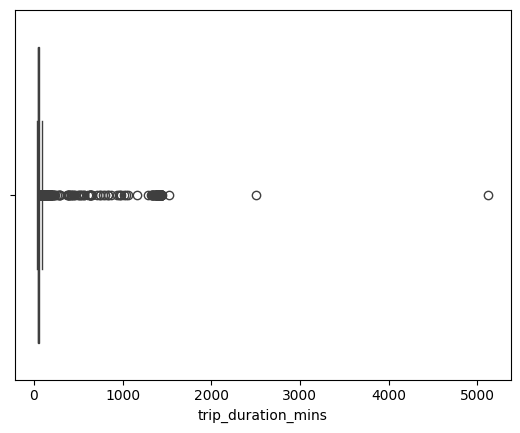

In [166]:
# plot outlier_trip_duration_gt_fare_df
sns.boxplot(x=outlier_trip_duration_gt_ub_df['trip_duration_mins'])
plt.show()

**Observation**:
1.  We see trip duration from the sample, have a max of 5125 minutes. This is roughly 3.5 days, and can be considered as an outlier.
2.  Since we are focused on Daily trends, we can use this to set an upper limit of 720 minutes.<br> Remove the rows that are beyond 1 day trips.

In [167]:
# remove rows that have trip_duration_mins greater than 720 minutes.
df_sampled = remove_rows(df_sampled, query_on_df(df_sampled, 'trip_duration_mins > 720'))

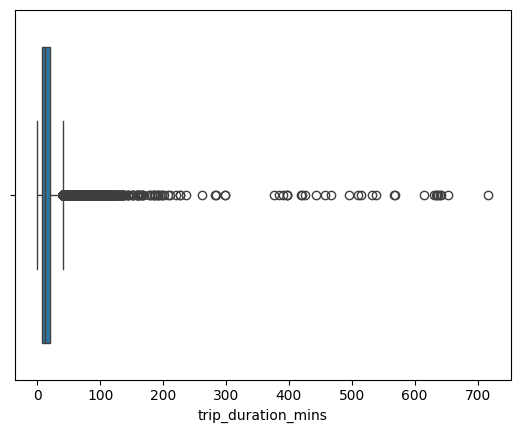

In [168]:
# plot for trip_duration_mins now
sns.boxplot(x=df_sampled['trip_duration_mins'])
plt.show()

**Observation**: For **Additional outlier check**: trip_duration is greater, but fare_amount or total_amount is less.
1.  The records containing trip_duration more than 1 day and lesser fare_amount can be considered as outliers.

**Action**: Clear them

In [169]:
print(upper_total_amount)

53.7


In [170]:
print(upper_fare_amount)

40.8


**Observation**: Continue with outlier analysis for total amount being lesser when trip duration is higher than its upper bound.

In [171]:
trip_duration_high_total_lesser = query_on_df(df_sampled, 'trip_duration_mins > @upper_trip_duration & total_amount < @upper_total_amount')

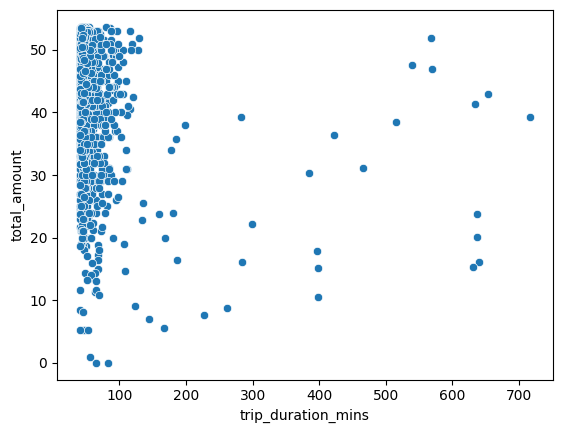

In [172]:
# plot trip_duration_mins vs total_amount for trip_duration_high_total_lesser
sns.scatterplot(x=trip_duration_high_total_lesser['trip_duration_mins'], y=trip_duration_high_total_lesser['total_amount'])
plt.show()

In [173]:
# get correlation of trip_duration_mins vs total_amount for trip_duration_high_total_lesser
trip_duration_high_total_lesser['trip_duration_mins'].corr(trip_duration_high_total_lesser['total_amount'])

np.float64(-0.207569938689698)

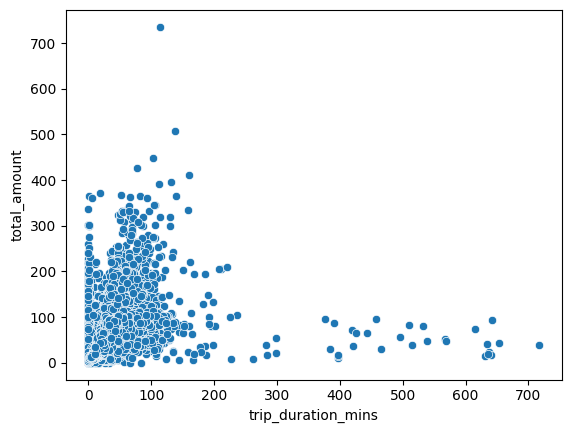

In [174]:
# check for trip_duration_mins vs total_amount for df_sampled
sns.scatterplot(x=df_sampled['trip_duration_mins'], y=df_sampled['total_amount'])
plt.show()

In [175]:
# let's check whether the correlation follows the same trend in df_sampled
df_sampled['trip_duration_mins'].corr(df_sampled['total_amount'])

np.float64(0.7477531914632561)

In [176]:
# get the trip_duration where total_amount is max
df_sampled[df_sampled['total_amount'] == df_sampled['total_amount'].max()][['total_amount', 'trip_duration_mins']]

total_amount  trip_duration_mins
126081        735.75          114.383333

**Observation**: Max total_amount is seen for trip_duration of ~115 mins.<br>Hence this can be used as a cap amount, instead of 'upper_trip_duration'

In [177]:
# remove rows that are beyond 120 mins trip_duration and lesser than lower bound of total_amount
# setting a cap limit of 120 minutes for this one, instead of removing all.
df_sampled = remove_rows(df_sampled, query_on_df(df_sampled, 'trip_duration_mins > 120 & total_amount < @lower_total_amount'))

In [178]:
df_sampled['trip_duration_mins'].describe()

count    284235.000000
mean         16.384770
std          14.209874
min           0.000000
25%           7.666667
50%          12.666667
75%          20.616667
max         717.166667
Name: trip_duration_mins, dtype: float64

In [180]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284235 entries, 0 to 284234
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284235 non-null  int64         
 1   tpep_pickup_datetime   284235 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284235 non-null  datetime64[us]
 3   passenger_count        284235 non-null  float64       
 4   trip_distance          284235 non-null  float64       
 5   RatecodeID             284235 non-null  float64       
 6   store_and_fwd_flag     284235 non-null  object        
 7   PULocationID           284235 non-null  int64         
 8   DOLocationID           284235 non-null  int64         
 9   payment_type           284235 non-null  int64         
 10  fare_amount            284235 non-null  float64       
 11  extra                  284235 non-null  float64       
 12  mta_tax                284235 non-null  floa

**Additional outlier condition**: Remove zones that do not come in the range 1-263, for pick-up/drop-off locationIDs.

In [188]:
invalid_locationID_df = query_on_df(df_sampled, 'PULocationID > 263 | DOLocationID > 263')

In [189]:
invalid_locationID_df.shape[0]/df_sampled.shape[0]*100

1.634914771228033

In [190]:
# remove these rows
df_sampled = remove_rows(df_sampled, invalid_locationID_df)

In [191]:
# Monetory columns are fine. Now check for categorical columns
# payment_type, RatecodeID are all considered
print(df_sampled[monetory_cols].describe())
print(df_sampled[non_monetory_cols].describe())


         fare_amount          extra        mta_tax     tip_amount  \
count  279588.000000  279588.000000  279588.000000  279588.000000   
mean       19.424570       1.589348       0.496359       3.517303   
std        16.688313       1.828507       0.042579       3.921727   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.850000   
75%        21.900000       2.500000       0.500000       4.420000   
max       300.000000      14.250000       0.800000     200.000000   

        tolls_amount  improvement_surcharge   total_amount  \
count  279588.000000          279588.000000  279588.000000   
mean        0.569528               0.999285      29.053018   
std         2.084489               0.025032      21.265381   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      16.700000   
50%   

In [192]:
# Do any columns need standardising?
# No. All are considered.

In [194]:
# reset indexes before proceeding
df_sampled.reset_index(drop=True, inplace=True)

Completed outlier analysis.

In [195]:
# write to parquet file
df_sampled.to_parquet('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC/DataSet/2023_ReducedSample_CleanedData.parquet')

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [196]:
df_cleaned = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC/DataSet/2023_ReducedSample_CleanedData.parquet')

In [197]:
df_cleaned.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Month',
 'Day',
 'Hour',
 'Airport_fee',
 'IsImputed',
 'trip_duration_mins',
 'calculated_total',
 'difference']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Categorical and Numerical both
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

**Observation**: The above monetory parameters are numerical in nature

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

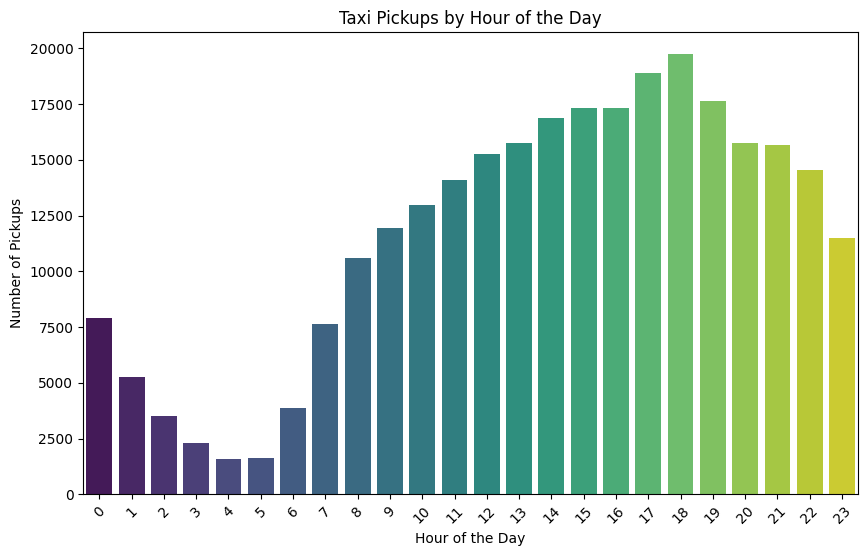

In [198]:
# Find and show the hourly trends in taxi pickups
# Analyse the distribution of taxi pickups by hours, days of the week, and months.
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df_cleaned, palette='viridis')
plt.title('Taxi Pickups by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

**Observation**: It looks like peak hours are in the evening as this could be when a lot of office going people would take the cab services.<br>
There is a comparable peak during 23rd hour and 0th hour as well, which could be during holidays like NewYear's Eve or Christmas Eve etc.

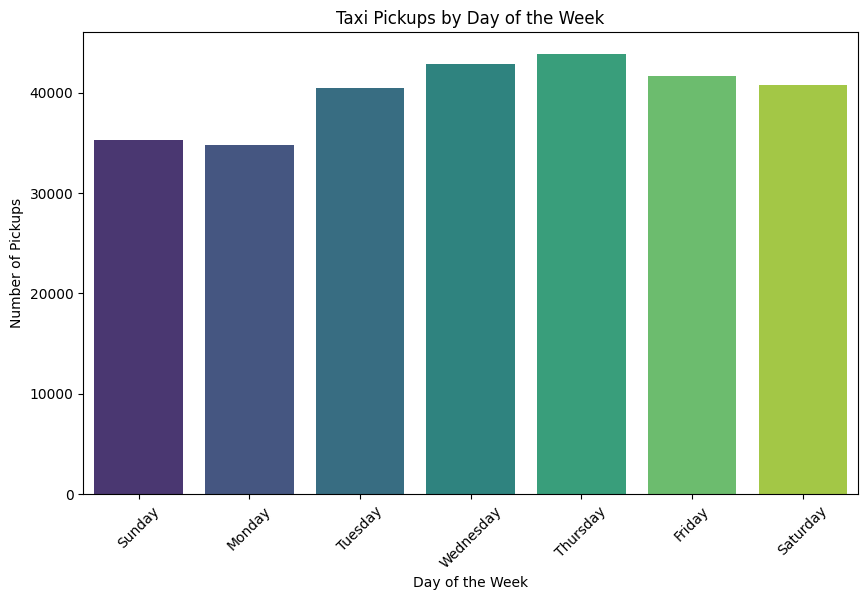

In [199]:
# Find and show the daily trends in taxi pickups (days of the week)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_cleaned['day_of_week'] = df_cleaned['tpep_pickup_datetime'].dt.dayofweek
df_cleaned['day_name'] = df_cleaned['day_of_week'].map(lambda x: day_names[x])

# Plot distribution of pickups by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_name', data=df_cleaned, palette='viridis')
plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()


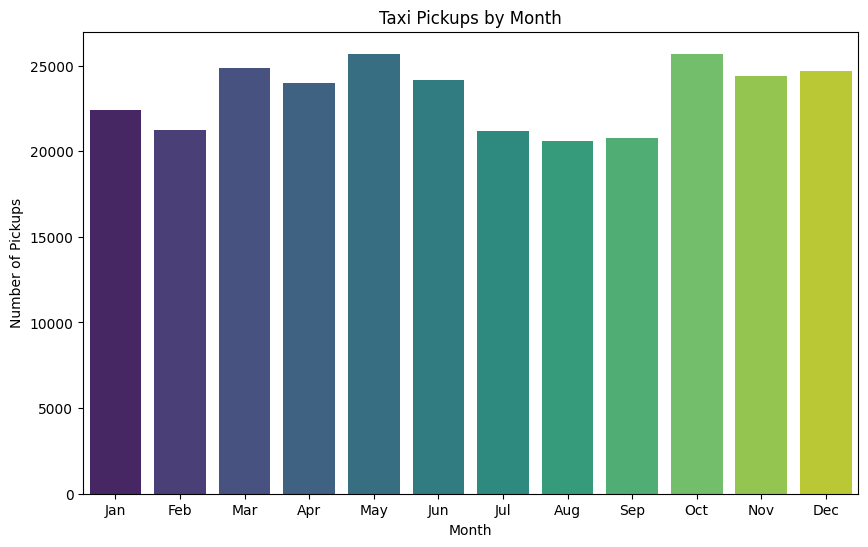

In [200]:
# Show the monthly trends in pickups
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df_cleaned, palette='viridis')
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [201]:
# Analyse the above parameters
def analyze_zeroes(df, col):
  zero_rows = df[df[col] == 0]

  print(f"Number of rows with zero {col}: {zero_rows.shape[0]}")

In [202]:
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
for col in financial_cols:
  analyze_zeroes(df_cleaned, col)

Number of rows with zero fare_amount: 74
Number of rows with zero tip_amount: 63513
Number of rows with zero total_amount: 41
Number of rows with zero trip_distance: 4903


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**Observation**: Yes, we can leave out these rows as:<br>
1. fare_amount: This could be a data entry error.
2. tip_amount: There could be cash tips which would be paid directly to the cab driver. Hence showing zero here.
3. total_amount: This again, could be a data entry error
4. trip_distance: This can be zero, if both pickup and dropoff locations are in the same zone.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

Yes, we can drop them.

In [203]:
rows_with_zero_in_financial_cols = (df_cleaned[financial_cols] == 0).any(axis=1).sum()
print(f"Rows with zero in fare, tip, total_amount or trip_distance: {rows_with_zero_in_financial_cols}")

Rows with zero in fare, tip, total_amount or trip_distance: 64601


In [221]:
# Create a df with non zero entries for the selected parameters.
df_nonzero_financialCols = df_cleaned[(df_cleaned[financial_cols] != 0).all(axis=1)].copy()
df_zero_financialCols = df[~((df[financial_cols] != 0).all(axis=1))].copy()

# Check the shape of the original and filtered DataFrame
print(f"Original DataFrame rows: {df_cleaned.shape[0]}")
print(f"Filtered Non-zero rows: {df_nonzero_financialCols.shape[0]}")
print(f"Filtered zero rows: {df_zero_financialCols.shape[0]}")

Original DataFrame rows: 279588
Filtered Non-zero rows: 214987
Filtered zero rows: 445130


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [205]:
# Group data by month and analyse monthly revenue
monthly_revenue_df = df_nonzero_financialCols.groupby('Month')['total_amount'].sum().reset_index()


Text(0, 0.5, 'Total Revenue (in million dollars)')

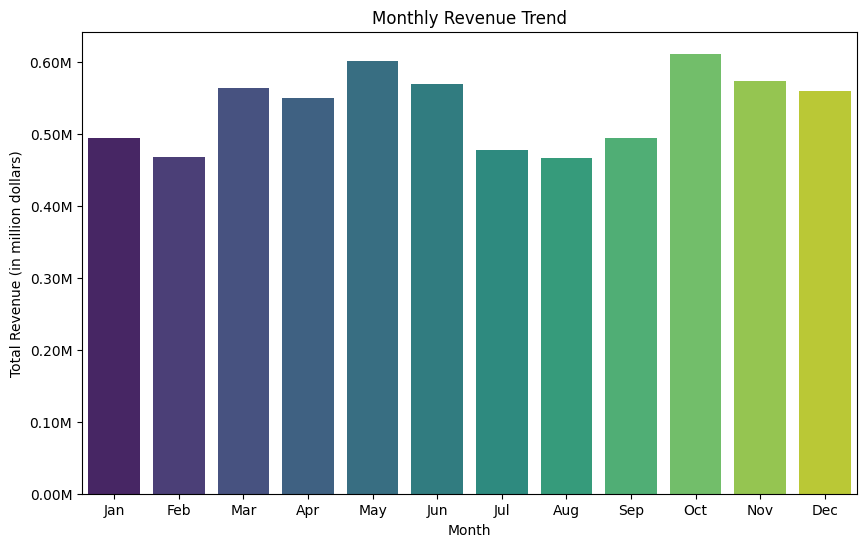

In [206]:
# plot the data
plt.figure(figsize=(10, 6))

# Plot monthly revenue trends
sns.barplot(x='Month', y='total_amount', data=monthly_revenue_df, palette='viridis')
plt.title('Monthly Revenue Trend')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Formatting the y-ticks to show values in millions
yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(tick)/1000000:.2f}M' for tick in yticks])
plt.xlabel('Month')
plt.ylabel('Total Revenue (in million dollars)')

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [207]:
# utility function to calculate proportion of each quarter
def calculate_revenue_proportion(df, col):
  # create quarter column
  df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')

  # Group data by quarter and calculate total revenue for each quarter
  quarter_revenue = df.groupby(df['quarter'])[col].sum()

  # Calculate the total revenue for each row
  total_revenue = quarter_revenue.sum()

  # Calculate the proportion of each quarter's revenue relative to the total revenue
  quarter_proportion = quarter_revenue / total_revenue

  return quarter_proportion

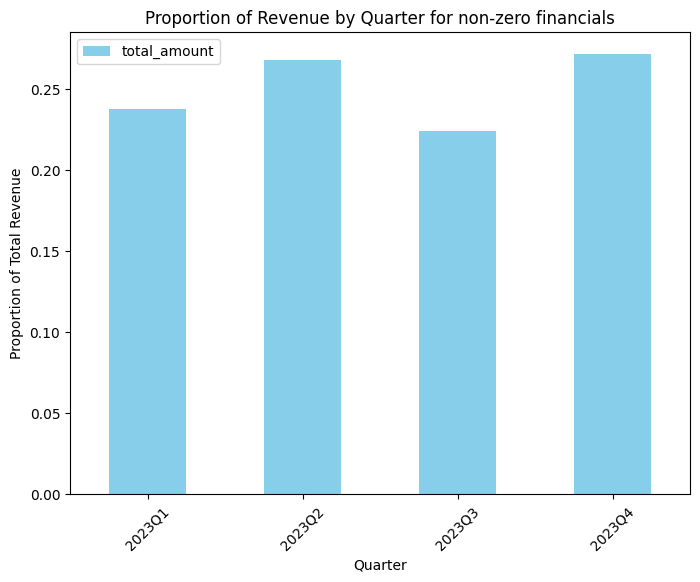

In [208]:
revenue_proportion_nonzero_fc = calculate_revenue_proportion(df_nonzero_financialCols, 'total_amount')
#revenue_proportion_zero_fc = calculate_revenue_proportion(df_zero_financialCols, 'total_amount')

# Plot the proportions of revenue for each quarter
plt.figure(figsize=(8, 6))
revenue_proportion_nonzero_fc.plot(kind='bar', color='skyblue')
#revenue_proportion_zero_fc.plot(kind='bar', color='lightcoral', position=1, width=0.4,
#                                label='FinancialCols with zero values- Revenue')
plt.title('Proportion of Revenue by Quarter for non-zero financials')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Total Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [209]:
# Show how trip fare is affected by distance
trip_distance_nonzero_df = query_on_df(df_nonzero_financialCols, 'trip_distance > 0')

In [210]:
# utility function to calculate correlation
def calculate_correlation(df, col1, col2):
  # Calculate correlation
  correlation = df[col1].corr(df[col2])

  # Print correlation values
  print(f"Correlation between {col1} and {col2}: {correlation:.2f}")

# utility function to plot
def visualize_relationships(df, col1, col2, title, xcolLabel, ycolLabel):
  # Plot col1 vs col2
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=col1, y=col2, data=df, color='blue', alpha=0.5)
  plt.title(f'{title}')
  plt.xlabel(f'{xcolLabel}')
  plt.ylabel(f'{ycolLabel}')

  # Adjust layout to prevent overlap
  plt.tight_layout()
  plt.show()

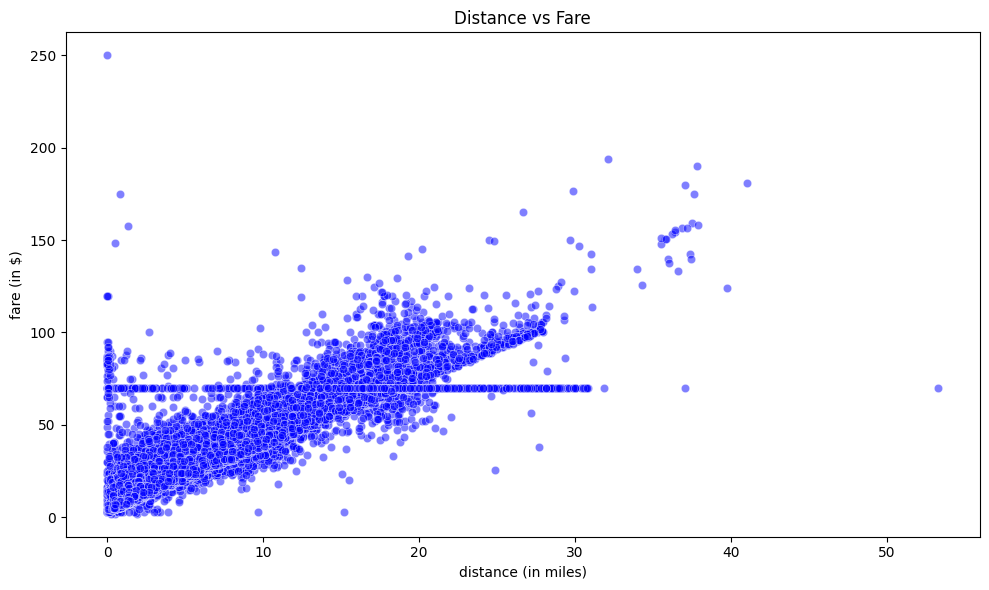

In [211]:
# visualize relationship between trip_distance and fare_amount
visualize_relationships(trip_distance_nonzero_df, 'trip_distance', 'fare_amount',
                        'Distance vs Fare', 'distance (in miles)', 'fare (in $)')

In [212]:
# correlation between trip_distance and fare_amount
calculate_correlation(trip_distance_nonzero_df, 'trip_distance', 'fare_amount')

Correlation between trip_distance and fare_amount: 0.95


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare_amount and trip_duration_mins: 0.85


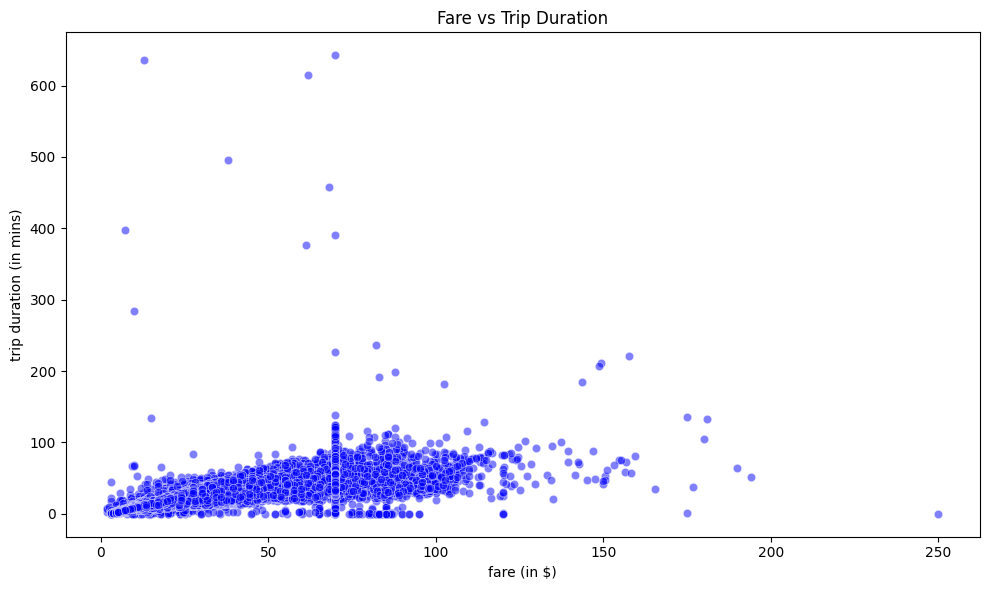

In [213]:
# Show relationship between fare and trip duration
# Ensure the date columns are in datetime format
calculate_correlation(df_nonzero_financialCols, 'fare_amount', 'trip_duration_mins')
visualize_relationships(df_nonzero_financialCols, 'fare_amount', 'trip_duration_mins',
                        'Fare vs Trip Duration', 'fare (in $)', 'trip duration (in mins)')

Correlation between fare_amount and passenger_count: 0.03


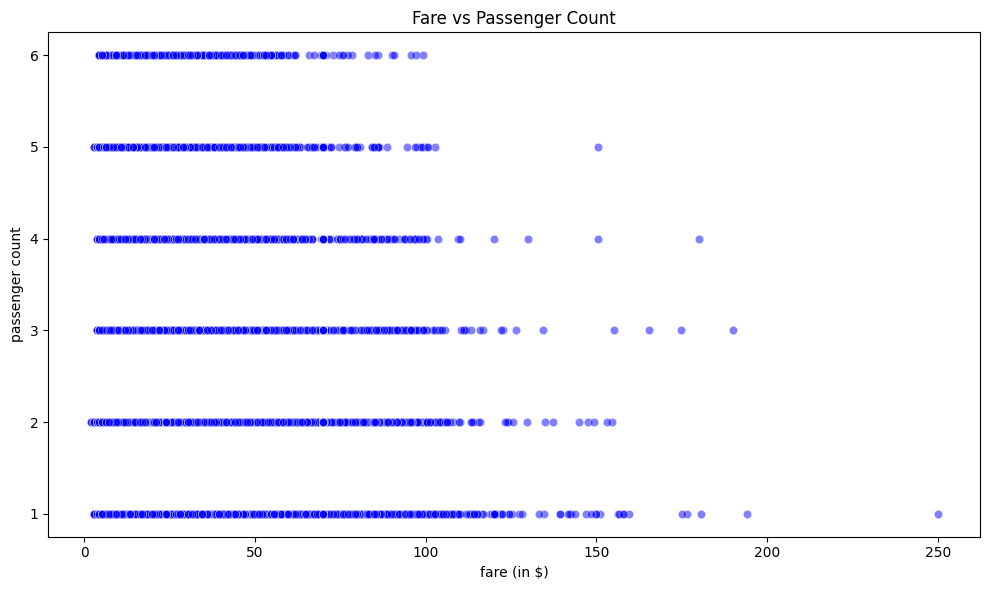

In [214]:
calculate_correlation(df_nonzero_financialCols, 'fare_amount', 'passenger_count')
visualize_relationships(df_nonzero_financialCols, 'fare_amount', 'passenger_count',
                        'Fare vs Passenger Count', 'fare (in $)', 'passenger count')

Correlation between tip_amount and trip_distance: 0.79


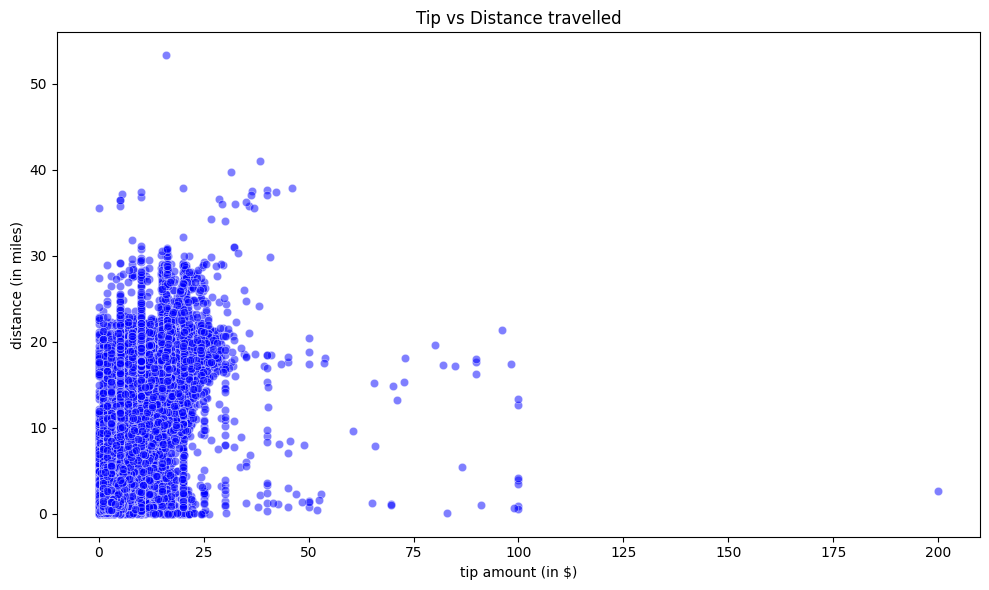

In [215]:
# Show relationship between tip and trip distance
calculate_correlation(df_nonzero_financialCols, 'tip_amount', 'trip_distance')
visualize_relationships(df_nonzero_financialCols, 'tip_amount', 'trip_distance',
                        'Tip vs Distance travelled', 'tip amount (in $)', 'distance (in miles)')


Correlation between tip_amount and passenger_count: 0.02


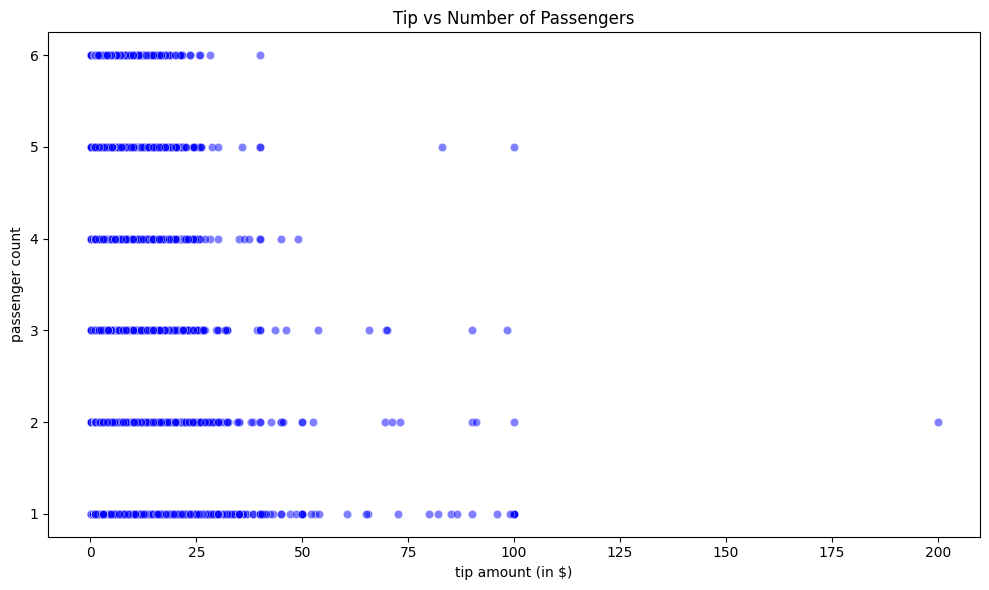

In [216]:
calculate_correlation(df_nonzero_financialCols, 'tip_amount', 'passenger_count')

# use box plot for numerical vs categorical
visualize_relationships(df_nonzero_financialCols, 'tip_amount', 'passenger_count',
                        'Tip vs Number of Passengers', 'tip amount (in $)', 'passenger count')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [218]:
# Analyse the distribution of different payment types (payment_type).
def analyze_payment_type_distribution(df, payment_column='payment_type'):
    # Count the occurrences of each payment type
    payment_type_counts = df[payment_column].value_counts()

    # Print the counts for each payment type
    print(f"Payment Type Distribution:\n{payment_type_counts}\n")

    # Plot the distribution using a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='viridis')
    plt.title('Distribution of Payment Types')
    plt.xlabel('Payment Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Payment Type Distribution:
payment_type
1    209129
5      5853
4         3
2         1
3         1
Name: count, dtype: int64



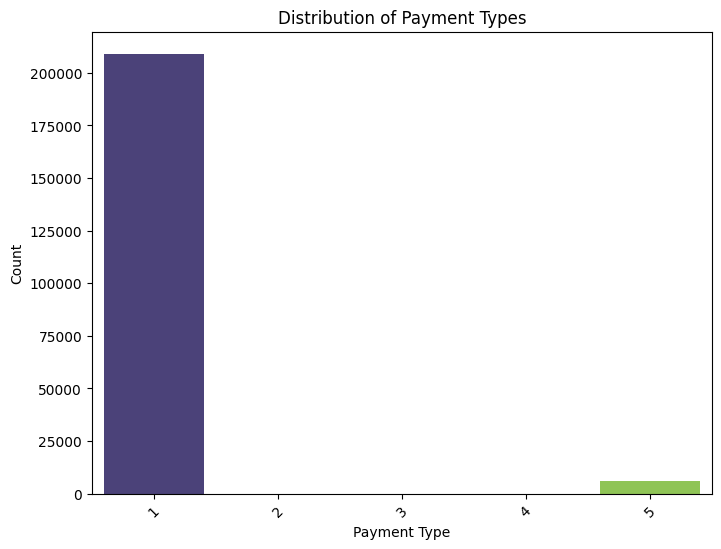

In [219]:
# plot the distribution
analyze_payment_type_distribution(df_nonzero_financialCols)

Payment Type Distribution:
payment_type
2    316429
1     79492
0     26532
4     13669
3      9008
Name: count, dtype: int64



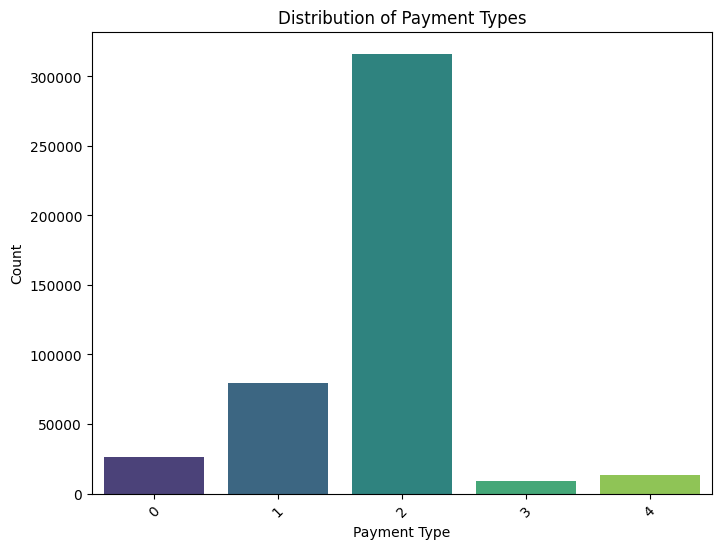

In [222]:
analyze_payment_type_distribution(df_zero_financialCols)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute
- 5= Unknown


**Observation**: Credit card is the preferred method of payment.

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [223]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [224]:
import geopandas as gpd

# Read the shapefile using geopandas
# read the .shp file using gpd
zones = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC/DataSet/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

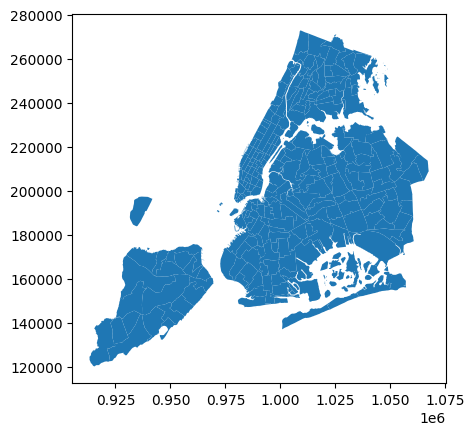

In [225]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [315]:
# Merge zones and trip records using locationID and PULocationID
df_merged_zones = pd.merge(df_nonzero_financialCols, zones, left_on='PULocationID', right_on='LocationID', how='left')


In [316]:
df_merged_zones.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:54:15   2023-01-01 01:01:43              1.0   
1         2  2023-01-01 00:20:37   2023-01-01 00:33:43              1.0   
2         2  2023-01-01 00:42:30   2023-01-01 00:58:00              1.0   
3         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
4         1  2023-01-01 00:38:19   2023-01-01 00:42:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.30         1.0                  N            90           211   
1           5.35         1.0                  N           236           244   
2           4.13         1.0                  N            79           236   
3           0.90         1.0                  N           148           114   
4           0.60         1.0                  N           263           236   

   payment_type  ...  difference  day_of_week  day_name  OBJECTID  Shape_Leng  \
0             1  ...         0.0            6    Sunday        90    0.030759   
1             1  ...         0.0            6    Sunday       236    0.044252   
2             1  ...         0.0            6    Sunday        79    0.042625   
3             1  ...         0.0            6    Sunday       148    0.039131   
4             1  ...         0.0            6    Sunday       263    0.037017   

   Shape_Area                   zone  LocationID    borough  \
0    0.000055               Flatiron          90  Manhattan   
1    0.000103  Upper East Side North         236  Manhattan   
2    0.000108           East Village          79  Manhattan   
3    0.000070        Lower East Side         148  Manhattan   
4    0.000066         Yorkville West         263  Manhattan   

                                            geometry  
0  POLYGON ((985265.129 208165.863, 985125.733 20...  
1  POLYGON ((995940.048 221122.92, 995812.322 220...  
2  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  POLYGON ((988552.836 201677.665, 988387.669 20...  
4  POLYGON ((997493.323 220912.386, 997355.264 22...  

[5 rows x 35 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [317]:
# Group data by location and calculate the number of trips
zone_data_by_location_df = df_merged_zones.groupby('LocationID').size()
zone_data_by_location_df = zone_data_by_location_df.reset_index(name='num_trips_pickup')

In [318]:
# let's use this to get top 5 locationIDs, in terms of number of pickups
top_location_trip_counts = zone_data_by_location_df.nlargest(5, 'num_trips_pickup')
top_location_trip_counts

LocationID  num_trips_pickup
157         237             10733
106         161             10135
156         236              9807
84          132              9167
107         162              8099

In [319]:
# utility function for top-n
def visualize_top_n(df, n, xcol, ycol, title, xcolLabel, ycolLabel):
  top_n = df.nlargest(n, ycol)

  # plot them
  plt.figure(figsize=(10, 6))
  sns.barplot(x=xcol, y=ycol, data=top_n, palette='viridis')
  plt.title(f'{title}')

  plt.xlabel(xcolLabel)
  plt.ylabel(ycolLabel)
  plt.xticks(rotation=90)
  plt.show()


In [320]:
def visualize_bottom_n(df, n, xcol, ycol, title, xcolLabel, ycolLabel):
  bottom_n = df.nsmallest(n, ycol)

  # plot them
  plt.figure(figsize=(10, 6))
  sns.barplot(x=xcol, y=ycol, data=bottom_n, palette='viridis')
  plt.title(f'{title}')

  plt.xlabel(xcolLabel)
  plt.ylabel(ycolLabel)
  plt.xticks(rotation=90)
  plt.show()

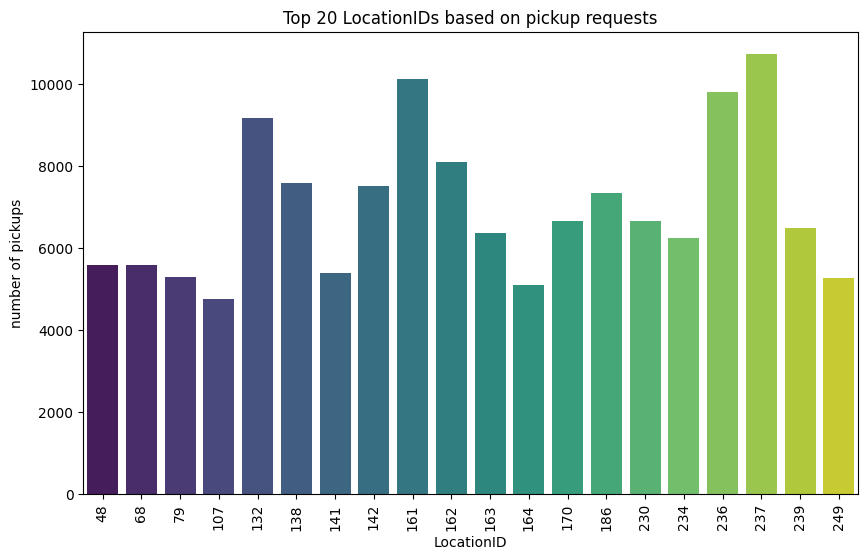

In [321]:
# plotting them
visualize_top_n(zone_data_by_location_df, 20, 'LocationID', 'num_trips_pickup',
                'Top 20 LocationIDs based on pickup requests', 'LocationID', 'number of pickups')

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [322]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trip_counts = zones.merge(zone_data_by_location_df, left_on='LocationID', right_on='LocationID', how='left')
zones_with_trip_counts.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   num_trips_pickup  
0               4.0  
1               NaN  
2               NaN  
3             245.0  
4               NaN

In [323]:
zones_with_trip_counts[zones_with_trip_counts['LocationID'] == 237]

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
236       237    0.042213    0.000096  Upper East Side South         237   

       borough                                           geometry  \
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   

     num_trips_pickup  
236           10733.0

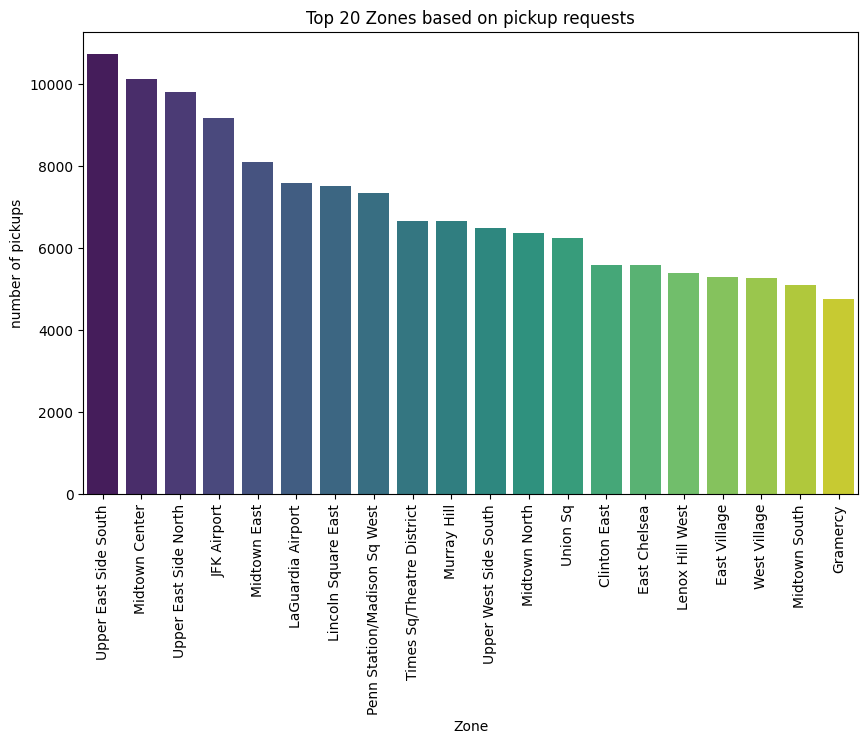

In [324]:
visualize_top_n(zones_with_trip_counts, 20, 'zone', 'num_trips_pickup',
                'Top 20 Zones based on pickup requests', 'Zone', 'number of pickups')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [325]:
zones_with_trip_counts.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   num_trips_pickup  
0               4.0  
1               NaN  
2               NaN  
3             245.0  
4               NaN

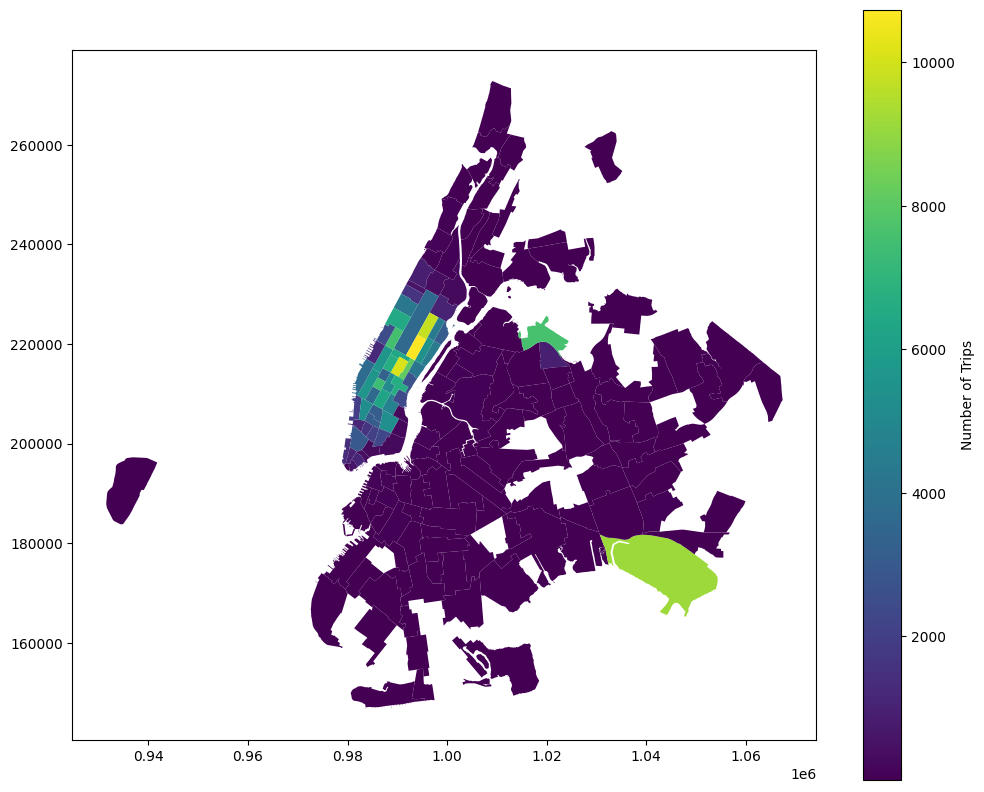

In [326]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_with_trip_counts.plot(column='num_trips_pickup', ax=ax, legend=True,
                            legend_kwds={'label': "Number of Trips", 'orientation': "vertical"})
plt.show()


In [327]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted_by_trips = zones_with_trip_counts.sort_values(by='num_trips_pickup', ascending=False)
zones_sorted_by_trips.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
131       132    0.245479    0.002038            JFK Airport         132   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  \
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

     num_trips_pickup  
236           10733.0  
160           10135.0  
235            9807.0  
131            9167.0  
161            8099.0

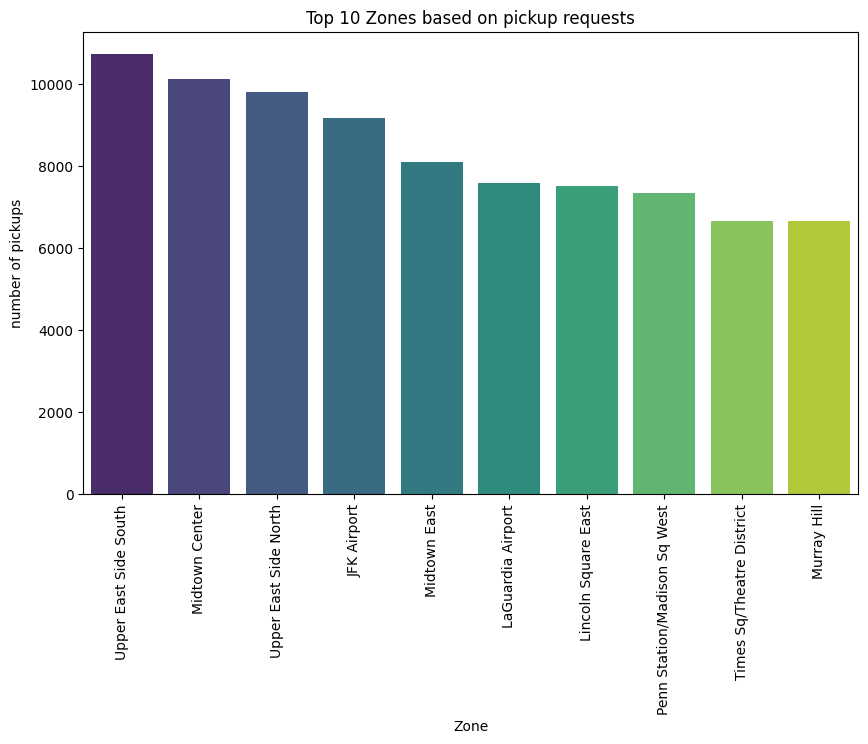

In [328]:
# plot zones_sorted_by_trips
visualize_top_n(zones_sorted_by_trips, 10, 'zone', 'num_trips_pickup',
                'Top 10 Zones based on pickup requests', 'Zone', 'number of pickups')

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


**Observation**:
1.  Hourly trends:
*  Increased pick-ups during office arrival and departure hours.
*  Peak is observed at 6pm.
*  Low demand at night times(2am to 6am)
2.	Daily trends:
*	Mid-week office attendance which causes peak pickups.
*	Lower Sunday pickups.
3.	Monthly trends:
* Q2 and Q4 have the largest share of revenue.
*	Although during winter months, there may be a lesser number of trips for work, it makes it up for leisure travel or family visits during the festivities. Thus, tipping Q4 revenue higher.
*	The decline in revenue from Q2 to Q3 could be also due to the holiday season, where travel is mostly out of NYS.
4.  Fares:
*	Longer the trip distance, higher the fare.
*	Minimum fare is charged, even for shorter distances.
5.	Tips and Passengers:
*	The saying, “more the merrier” is not true in this case, as we see tips are generally higher for passengers up to 3. After that, it is comparatively capped.
*	Solo passengers are more generous with their tips.
*	Longer trip time, generally means higher tip amounts, but this is capped.
6.	Busiest zones:
*	The top busiest zones are in the Manhattan region.
*	JFK and LaGuardia airports also are busy compared to others.


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [329]:
zones_with_trip_counts.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'num_trips_pickup'],
      dtype='object')

In [330]:
# Find routes which have the slowest speeds at different times of the day
# utility function for calculating route speed
def calculate_route_speeds_by_hour(df):
  average_speed = 0
  route_stats_df = df.groupby(['Hour', 'PULocationID', 'DOLocationID']).agg(
        total_distance=('trip_distance', 'sum'),
        total_trip_duration=('trip_duration_mins', 'sum'),
        num_trips=('Hour', 'count')
    ).reset_index()

  # calculate average = (total_distance/total_time taken) * 60
  # since we want units of speed be miles per hour.
  route_stats_df['average_speed'] = (route_stats_df['total_distance'] / route_stats_df['total_trip_duration'] * 60).round(2)

  # ensure it is not lesser than 0
  route_stats_df['average_speed'] = route_stats_df['average_speed'].apply(lambda x: max(x, 0))

  return route_stats_df

In [331]:
# calculate route stats from df_merged_zones
# route_stats will be used for analysis on speed or num_trips.
route_stats_df = calculate_route_speeds_by_hour(df_merged_zones)
route_stats_df.head()

Hour  PULocationID  DOLocationID  total_distance  total_trip_duration  \
0     0             4             4            0.38             2.650000   
1     0             4            33            3.90            14.883333   
2     0             4            48            3.77            15.950000   
3     0             4            50            4.33            25.716667   
4     0             4            68            2.70            22.033333   

   num_trips  average_speed  
0          1           8.60  
1          1          15.72  
2          1          14.18  
3          1          10.10  
4          1           7.35

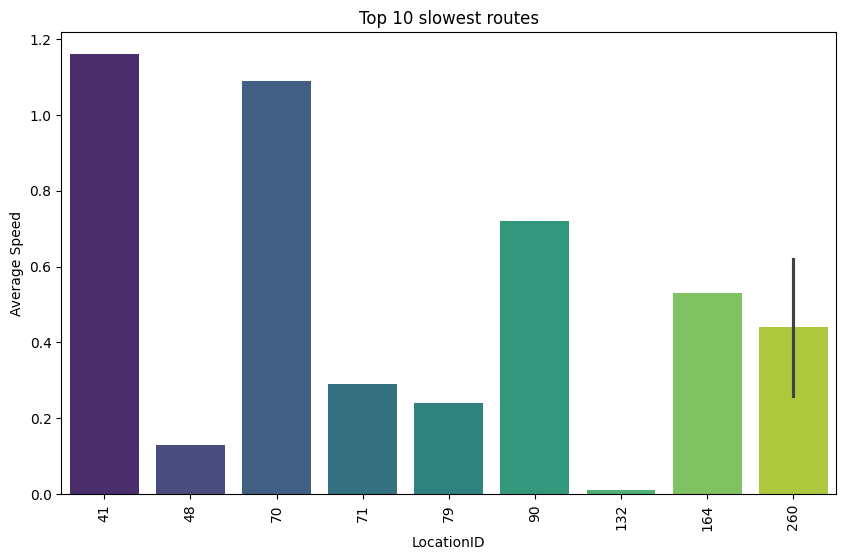

In [332]:
# plot route_stats_df
visualize_bottom_n(route_stats_df, 10, 'PULocationID', 'average_speed',
                   'Top 10 slowest routes', 'LocationID', 'Average Speed')

In [333]:
# find which is locationID 132
zones[zones['LocationID'] == 132]

OBJECTID  Shape_Leng  Shape_Area         zone  LocationID borough  \
131       132    0.245479    0.002038  JFK Airport         132  Queens   

                                              geometry  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...

How does identifying high-traffic, high-demand routes help us?

Identifying high-traffic, high-demand routes can help us to:
1.  Provide short trip durations by avoiding these, and adding to customer satisfaction.
2.  Cab services will know that these routes should levy congestion_surcharges.
3.  Routes can be planned in advance, for peak vs non-peak hours.
4.  Deploy right number of cabs, during these hours.


In [334]:
route_stats_df.columns

Index(['Hour', 'PULocationID', 'DOLocationID', 'total_distance',
       'total_trip_duration', 'num_trips', 'average_speed'],
      dtype='object')

In [335]:
# utility function to get the cap
def get_cap_limit(df, col, percentile):
  return df[col].quantile(percentile).round(2)

In [336]:
# get high traffic and high demand routes
# average speed is less and num_trips is high
# we can use cap limit for average_speed as its 90th percentile
# and cap limit for num_trips as its 90th percentile
speed_cap = get_cap_limit(route_stats_df, 'average_speed', 0.90)
trips_cap = get_cap_limit(route_stats_df, 'num_trips', 0.90)
print(f"Speed Cap: {speed_cap}")
print(f"Trips Cap: {trips_cap}")

Speed Cap: 22.43
Trips Cap: 9.0


In [337]:
# extract df that is based on high demand and high traffic
high_traffic_demand_routes = query_on_df(route_stats_df, 'average_speed <= @speed_cap & num_trips >= @trips_cap')
high_traffic_demand_routes.head()

Hour  PULocationID  DOLocationID  total_distance  total_trip_duration  \
89      0            48            48            4.73            33.783333   
92      0            48            68           26.69           139.800000   
94      0            48            79           33.27           177.333333   
98      0            48            90           15.96            94.000000   
112     0            48           143           12.06            63.383333   

     num_trips  average_speed  
89           9           8.40  
92          20          11.45  
94          11          11.26  
98           9          10.19  
112          9          11.42

In [338]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

In [339]:
high_traffic_demand_routes.columns

Index(['Hour', 'PULocationID', 'DOLocationID', 'total_distance',
       'total_trip_duration', 'num_trips', 'average_speed'],
      dtype='object')

In [340]:
# utility function to generate expanded zone df from zone_df and value_add_df
def expand_zone_location_hour_df(zone_df, value_add_df, value_add_df_loc_col,
                                 additional_cols=None, zone_location_col='LocationID',
                                 hour_col='Hour', how='left'):
  # If additional columns are specified, select those columns from value_add_df
  if additional_cols:
    temp_df = value_add_df[[value_add_df_loc_col, hour_col] + additional_cols]
  else:
    temp_df = value_add_df[[value_add_df_loc_col, hour_col]]

  # Create a DataFrame for all combinations of LocationID and Hour
  hours = temp_df[hour_col].unique()  # Get all unique hours from df2
  location_hours = pd.MultiIndex.from_product([zone_df[zone_location_col].unique(), hours],
                                              names=[zone_location_col, hour_col])

  # Create an expanded DataFrame for zone_df
  df1_expanded = pd.DataFrame(index=location_hours).reset_index()

  # Merge expanded zone_df with temp_df on both LocationID and Hour
  merged_df = pd.merge(df1_expanded, temp_df, left_on=[zone_location_col, hour_col],
                        right_on=[value_add_df_loc_col, hour_col], how=how)

  # Merge this with df1 to bring in the additional columns from df1
  final_merged_df = zone_df.merge(merged_df, left_on=zone_location_col, right_on=zone_location_col, how='left')

  final_merged_df['num_trips'].fillna(0, inplace=True)  # Fill NaN with 0
  final_merged_df['average_speed'].fillna(final_merged_df['average_speed'].mean(), inplace=True)  # Fill NaN with mean value
  final_merged_df['average_speed'] = final_merged_df['average_speed'].round(2)

  return final_merged_df

In [270]:
# to plot this to zones, merge this to zones
# but there is no 'Hour' column in zones.
zones_highDemand_highTraffic_hours = expand_zone_location_hour_df(zones, high_traffic_demand_routes,
                                                    value_add_df_loc_col='PULocationID',
                                                    additional_cols=['num_trips', 'average_speed'],
                                                    zone_location_col='LocationID',
                                                    hour_col='Hour')
zones_highDemand_highTraffic_hours.head()


OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   
1         1    0.116357    0.000782  Newark Airport           1     EWR   
2         1    0.116357    0.000782  Newark Airport           1     EWR   
3         1    0.116357    0.000782  Newark Airport           1     EWR   
4         1    0.116357    0.000782  Newark Airport           1     EWR   

                                            geometry  Hour  PULocationID  \
0  POLYGON ((933100.918 192536.086, 933091.011 19...     0           NaN   
1  POLYGON ((933100.918 192536.086, 933091.011 19...     1           NaN   
2  POLYGON ((933100.918 192536.086, 933091.011 19...     2           NaN   
3  POLYGON ((933100.918 192536.086, 933091.011 19...     3           NaN   
4  POLYGON ((933100.918 192536.086, 933091.011 19...     5           NaN   

   num_trips  average_speed  
0        0.0           8.73  
1        0.0           8.73  
2        0.0           8.73  
3        0.0           8.73  
4        0.0           8.73

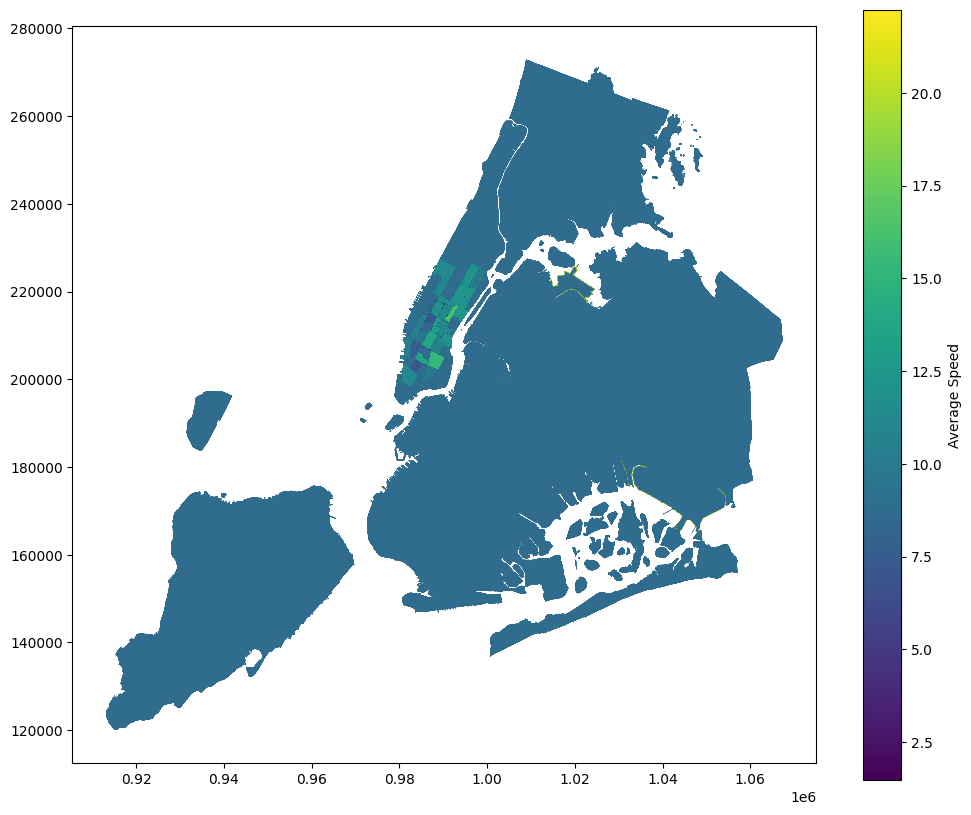

In [271]:
# plot this based on zone
# Define figure and axis
fig1, ax1 = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_highDemand_highTraffic_hours.plot(column='average_speed', ax=ax1, legend=True,
                          legend_kwds={'label': "Average Speed", 'orientation': "vertical"})
plt.show()


In [341]:
# utility function that summarizes above steps
def visualize_zones_based_on_query(source_df, zone_df, query, additional_cols,
                                   visualization_col, label):
  # extract df that is based on high demand and high traffic
  # average speed is less and num_trips is high
  # we can use cap limit for
  stats_df = query_on_df(source_df, query)

  zones_expanded_hours = expand_zone_location_hour_df(zone_df, stats_df,
                                                    value_add_df_loc_col='PULocationID',
                                                    additional_cols=additional_cols,
                                                    zone_location_col='LocationID',
                                                    hour_col='Hour')

  fig1, ax = plt.subplots(1, 1, figsize = (12, 10))

  # Plot the map and display it
  zones_expanded_hours.plot(column=visualization_col, ax=ax, legend=True,
                            legend_kwds={'label': label, 'orientation': "vertical"})
  plt.show()

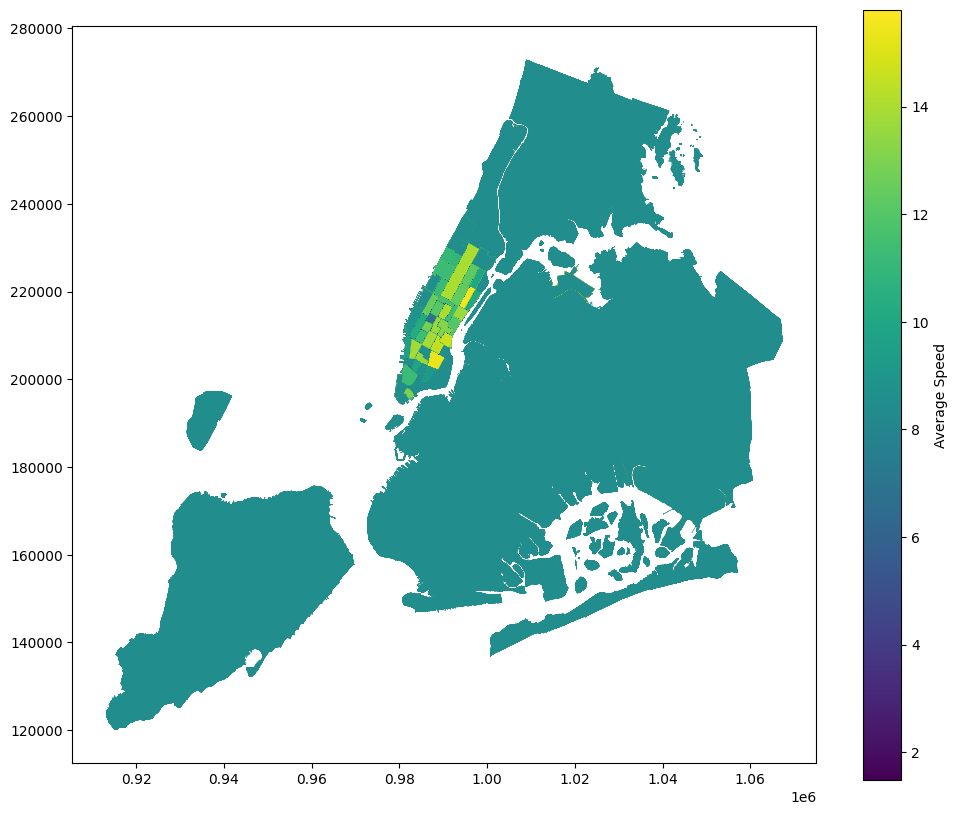

In [342]:
# let's try setting a different cap
speed_cap = get_cap_limit(route_stats_df, 'average_speed', 0.75)
trips_cap = get_cap_limit(route_stats_df, 'num_trips', 0.75)

query = 'average_speed < @speed_cap & num_trips > @trips_cap'
additional_cols = ['num_trips', 'average_speed']
visualization_col = 'average_speed'
label = "Average Speed"

visualize_zones_based_on_query(route_stats_df, zones, query, additional_cols, visualization_col, label)

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [343]:
route_stats_df['num_trips'].describe()

count    53375.000000
mean         4.027991
std          5.907047
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        142.000000
Name: num_trips, dtype: float64

In [344]:
def hourly_stats_num_trips(df, cols=None):
  if cols:
    groupbycols = ['Hour'] + cols
  else:
    groupbycols = ['Hour']

  # Perform the grouping and count the number of trips (rows) per group
  hourly_stats_df = df.groupby(groupbycols).size().reset_index(name='num_trips')

  return hourly_stats_df

Busiest Hour: 18 with 15730 trips


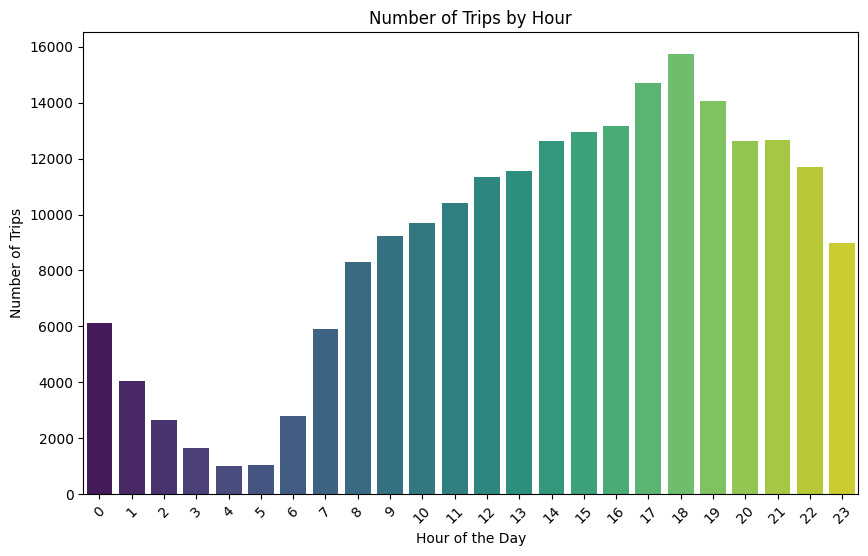

In [345]:
# Visualise the number of trips per hour and find the busiest hour
# let's use df_merged_zones for this
hourly_trip_count = hourly_stats_num_trips(df_merged_zones)

# Find the busiest hour
busiest_hour = hourly_trip_count.loc[hourly_trip_count['num_trips'].idxmax()]
print(f"Busiest Hour: {busiest_hour['Hour']} with {busiest_hour['num_trips']} trips")

plt.figure(figsize=(10, 6))

# Create a barplot for number of trips per hour
sns.barplot(x='Hour', y='num_trips', data=hourly_trip_count, palette='viridis')

plt.title('Number of Trips by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [346]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# (Since we applied a sample of 5% first and then on this sample, again applied a sample of 15%)
SCALE_UP_FRACTION = 0.05 * 0.15

scaled_trip_counts = hourly_trip_count['num_trips'] / SCALE_UP_FRACTION
hourly_trip_count['scaled_num_trips'] = scaled_trip_counts
hourly_trip_count.head()



Hour  num_trips  scaled_num_trips
0     0       6109     814533.333333
1     1       4036     538133.333333
2     2       2638     351733.333333
3     3       1667     222266.666667
4     4       1028     137066.666667

In [347]:
# find the actual number of trips in 5 busiest hours
busiest_hours = hourly_trip_count.nlargest(5, 'scaled_num_trips')
busiest_hours

Hour  num_trips  scaled_num_trips
18    18      15730      2.097333e+06
17    17      14689      1.958533e+06
19    19      14061      1.874800e+06
16    16      13162      1.754933e+06
15    15      12942      1.725600e+06

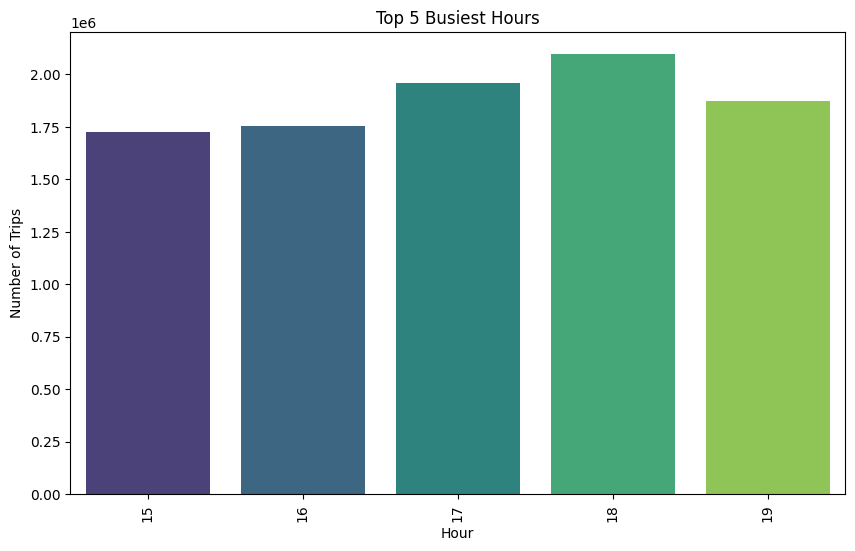

In [348]:
visualize_top_n(hourly_trip_count, 5, 'Hour', 'scaled_num_trips',
                'Top 5 Busiest Hours', 'Hour', 'Number of Trips')

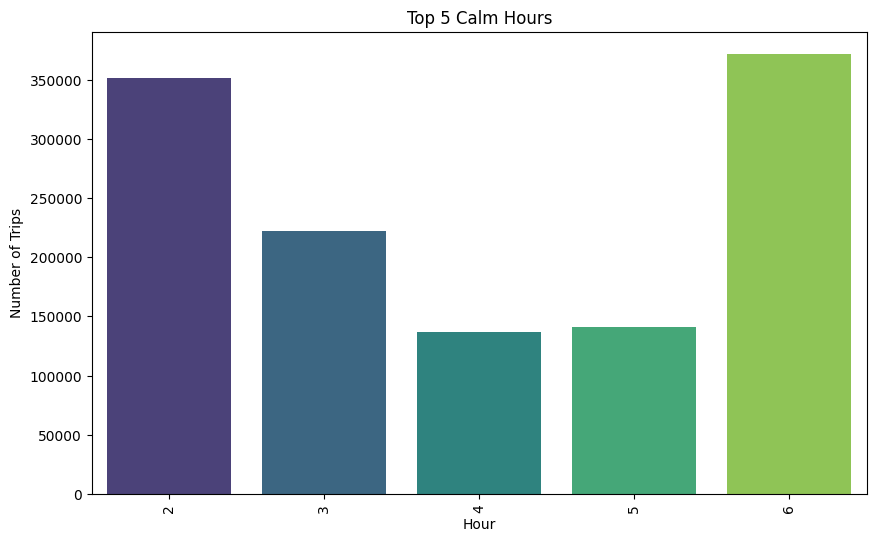

In [349]:
visualize_bottom_n(hourly_trip_count, 5, 'Hour', 'scaled_num_trips',
                'Top 5 Calm Hours', 'Hour', 'Number of Trips')

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [279]:
df_merged_zones.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Month', 'Day', 'Hour',
       'Airport_fee', 'IsImputed', 'trip_duration_mins', 'calculated_total',
       'difference', 'day_of_week', 'day_name', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry'],
      dtype='object')

In [350]:
# add IsWeekend
df_merged_zones['IsWeekend'] = df_merged_zones['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)

In [351]:
# Compare traffic trends for the week days and weekends
# get for week days
weekdays_df = query_on_df(df_merged_zones, 'IsWeekend == 0')
weekends_df = query_on_df(df_merged_zones, 'IsWeekend == 1')

weekdays_hourly_trips = hourly_stats_num_trips(weekdays_df)
weekends_hourly_trips = hourly_stats_num_trips(weekends_df)


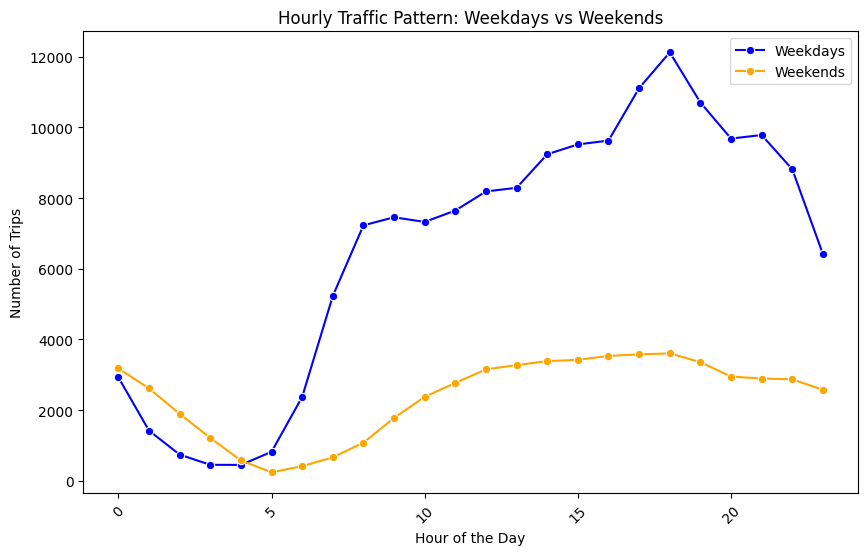

In [352]:
# plot them
plt.figure(figsize=(10, 6))

# Plot weekday traffic
sns.lineplot(x='Hour', y='num_trips', data=weekdays_hourly_trips, label='Weekdays', color='blue', marker='o')

# Plot weekend traffic
sns.lineplot(x='Hour', y='num_trips', data=weekends_hourly_trips, label='Weekends', color='orange', marker='o')

plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.xticks(rotation=45)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**Observation**:
1.  During weekdays, we can clearly see more trips during evening. This coincides with people leaving from their workplaces.
2.  For 8am to 2pm and 8pm to 11pm, the number of trips are comparable.
3.  During weekends, it is lot calmer. But we see there are some cab requests during lunch or early dinner.
4. There are late night cabs also requested, which comes down after around 2am.
<br>
**Knowing this, we can infer**:
1.  How many cabs will need to be deployed at Hour's granularity, across weekdays and weekends.
2.  Promotional offers can be thought of, to increase revenue during the calmer hours.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [353]:
df_merged_zones.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Month', 'Day', 'Hour',
       'Airport_fee', 'IsImputed', 'trip_duration_mins', 'calculated_total',
       'difference', 'day_of_week', 'day_name', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry', 'IsWeekend'],
      dtype='object')

In [354]:
# df_merged_zones is created on merging zones on PULocationID and LocationID
# for drop-off zones as well, lets create another one.
df_merged_zones_pickup_dropoff = pd.merge(df_merged_zones, zones, left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('_pickup', '_dropoff'))

In [355]:
df_merged_zones_pickup_dropoff.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Month', 'Day', 'Hour',
       'Airport_fee', 'IsImputed', 'trip_duration_mins', 'calculated_total',
       'difference', 'day_of_week', 'day_name', 'OBJECTID_pickup',
       'Shape_Leng_pickup', 'Shape_Area_pickup', 'zone_pickup',
       'LocationID_pickup', 'borough_pickup', 'geometry_pickup', 'IsWeekend',
       'OBJECTID_dropoff', 'Shape_Leng_dropoff', 'Shape_Area_dropoff',
       'zone_dropoff', 'LocationID_dropoff', 'borough_dropoff',
       'geometry_dropoff'],
      dtype='object')

In [356]:
# Find top 10 pickup and dropoff zones

# find the hourly stats based on zone_pickup and zone_dropoff
pickup_stats = hourly_stats_num_trips(df_merged_zones_pickup_dropoff, ['zone_pickup'])
dropoff_stats = hourly_stats_num_trips(df_merged_zones_pickup_dropoff, ['zone_dropoff'])


In [357]:
pickup_stats.columns

Index(['Hour', 'zone_pickup', 'num_trips'], dtype='object')

In [358]:
# Sort to get top 10 zones by pickup and dropoff count
top_pickup_zones = pickup_stats.groupby('zone_pickup')['num_trips'].sum().nlargest(10).index
top_dropoff_zones = dropoff_stats.groupby('zone_dropoff')['num_trips'].sum().nlargest(10).index

# Filter out the top 10 zones for pickups and dropoffs
top_pickup_stats = pickup_stats[pickup_stats['zone_pickup'].isin(top_pickup_zones)]
top_dropoff_stats = dropoff_stats[dropoff_stats['zone_dropoff'].isin(top_dropoff_zones)]

In [359]:
top_pickup_stats.head()

Hour          zone_pickup  num_trips
39     0          JFK Airport        412
41     0    LaGuardia Airport        171
44     0  Lincoln Square East        151
53     0       Midtown Center        160
54     0         Midtown East        123

In [360]:
# utility function to visualize trends across hours
def visualize_trends_across_cols(df, xcol, ycol, huecol, title, xcolLabel, ycolLabel):
  plt.figure(figsize=(12, 6))
  sns.lineplot(data=df, x=xcol, y=ycol, hue=huecol, marker='o')
  plt.title(title)
  plt.xlabel(xcolLabel)
  plt.ylabel(ycolLabel)
  plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')  # Customize legend placement if needed

  plt.tight_layout()
  plt.show()

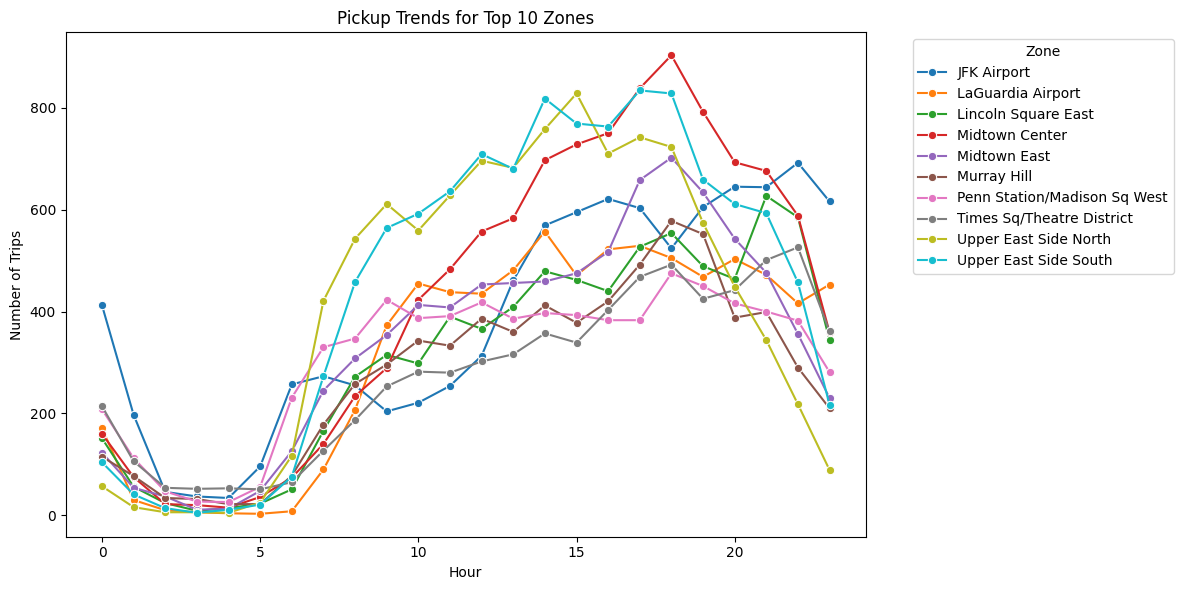

In [361]:
visualize_trends_across_cols(top_pickup_stats, 'Hour', 'num_trips', 'zone_pickup',
                             'Pickup Trends for Top 10 Zones', 'Hour', 'Number of Trips')

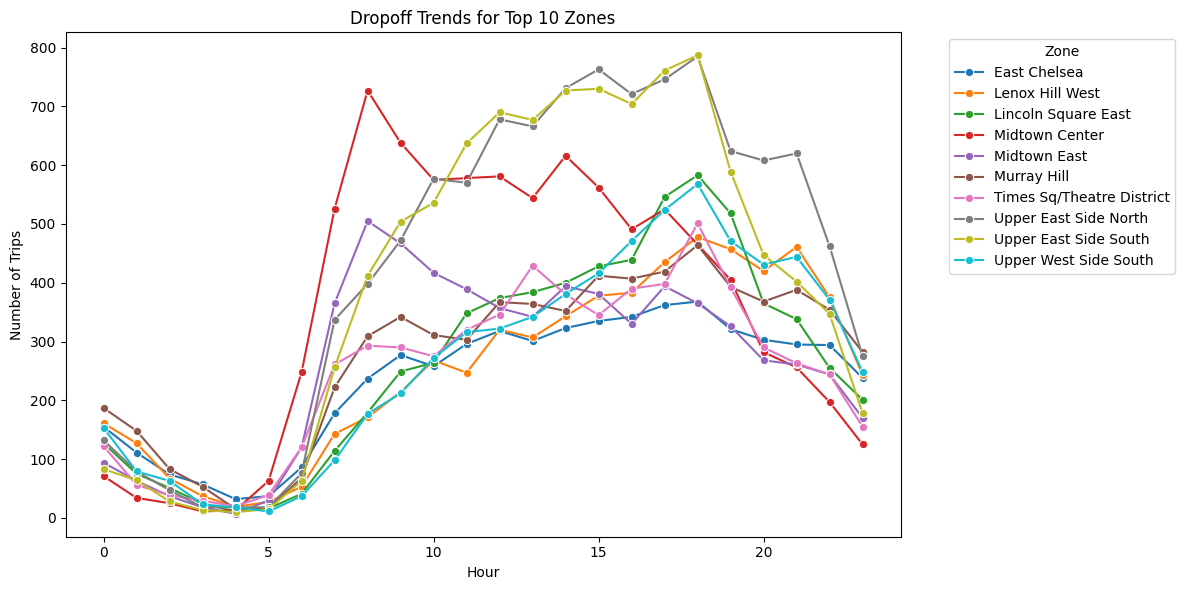

In [362]:
visualize_trends_across_cols(top_dropoff_stats, 'Hour', 'num_trips', 'zone_dropoff',
                             'Dropoff Trends for Top 10 Zones', 'Hour', 'Number of Trips')

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [363]:
df_merged_zones_pickup_dropoff.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Month', 'Day', 'Hour',
       'Airport_fee', 'IsImputed', 'trip_duration_mins', 'calculated_total',
       'difference', 'day_of_week', 'day_name', 'OBJECTID_pickup',
       'Shape_Leng_pickup', 'Shape_Area_pickup', 'zone_pickup',
       'LocationID_pickup', 'borough_pickup', 'geometry_pickup', 'IsWeekend',
       'OBJECTID_dropoff', 'Shape_Leng_dropoff', 'Shape_Area_dropoff',
       'zone_dropoff', 'LocationID_dropoff', 'borough_dropoff',
       'geometry_dropoff'],
      dtype='object')

In [364]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Aggregate the pickup and dropoff stats by zone (sum across all hours)
# we are reusing pickup_stats which is already grouped by Hour and LocationIDs.
pickup_totals = pickup_stats.groupby('zone_pickup')['num_trips'].sum().reset_index(name='num_pickups')
dropoff_totals = dropoff_stats.groupby('zone_dropoff')['num_trips'].sum().reset_index(name='num_dropoffs')

# create zone_stats by merging them
zone_stats = pd.merge(pickup_totals, dropoff_totals, left_on='zone_pickup', right_on='zone_dropoff', how='outer')
zone_stats.head()



zone_pickup  num_pickups             zone_dropoff  num_dropoffs
0            NaN          NaN  Allerton/Pelham Gardens            10
1  Alphabet City        245.0            Alphabet City           772
2            NaN          NaN            Arden Heights             1
3            NaN          NaN  Arrochar/Fort Wadsworth             2
4        Astoria         44.0                  Astoria           559

In [365]:
# utility function to calculate ratio
def calculate_pickup_dropoff_ratio(df):
  df['pickup_dropoff_ratio'] = df['num_pickups'] / df['num_dropoffs']
  return df

In [366]:
# Calculate the ratio of pickups to dropoffs for each zone
zone_stats = calculate_pickup_dropoff_ratio(zone_stats)

# Find the top 10 highest and lowest ratios
top_10_highest_ratios = zone_stats.nlargest(10, 'pickup_dropoff_ratio')
top_10_lowest_ratios = zone_stats.nsmallest(10, 'pickup_dropoff_ratio')

# Display results
print("Top 10 Highest Pickup/Dropoff Ratios:")
print(top_10_highest_ratios[['zone_pickup', 'pickup_dropoff_ratio']])

print("\nTop 10 Lowest Pickup/Dropoff Ratios:")
print(top_10_lowest_ratios[['zone_pickup', 'pickup_dropoff_ratio']])

Top 10 Highest Pickup/Dropoff Ratios:
                          zone_pickup  pickup_dropoff_ratio
64                      East Elmhurst             13.681159
117                       JFK Airport              4.162432
194  Saint Michaels Cemetery/Woodside              3.000000
126                 LaGuardia Airport              2.513880
175      Penn Station/Madison Sq West              1.630213
102           Greenwich Village South              1.437790
39                       Central Park              1.406238
236                      West Village              1.365375
202                     South Jamaica              1.294118
92                   Garment District              1.283794

Top 10 Lowest Pickup/Dropoff Ratios:
                          zone_pickup  pickup_dropoff_ratio
161                    Newark Airport              0.006015
11                          Bay Ridge              0.007353
189                  Roosevelt Island              0.015267
244                   Wi

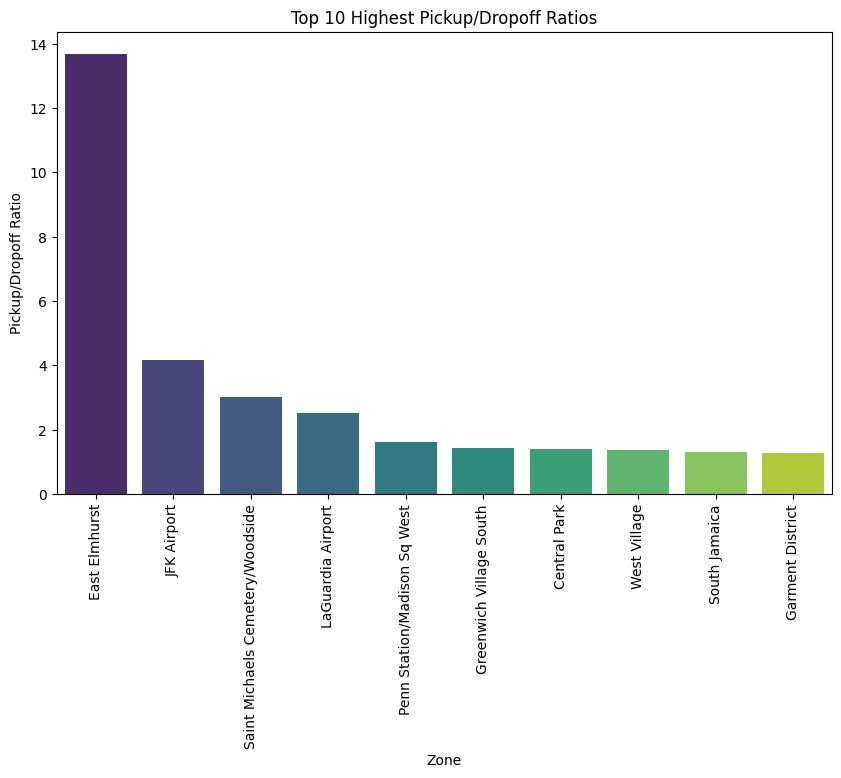

In [367]:
# visualize these
visualize_top_n(top_10_highest_ratios, 10, 'zone_pickup', 'pickup_dropoff_ratio',
                'Top 10 Highest Pickup/Dropoff Ratios', 'Zone', 'Pickup/Dropoff Ratio')

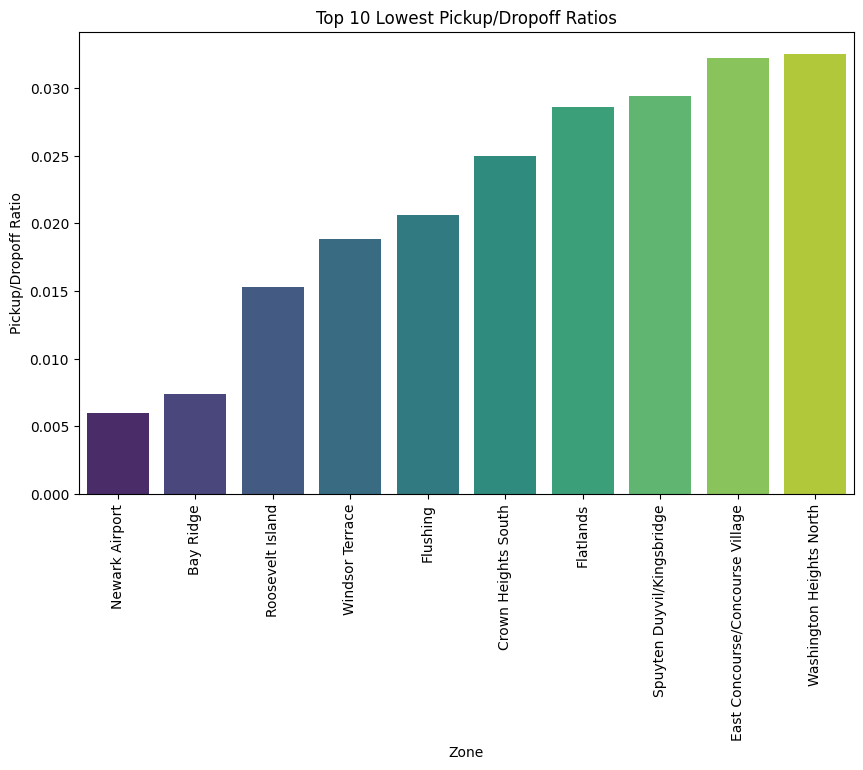

In [368]:
# lowest pickup-drop off ratio means, it is
visualize_bottom_n(top_10_lowest_ratios, 10, 'zone_pickup', 'pickup_dropoff_ratio',
                'Top 10 Lowest Pickup/Dropoff Ratios', 'Zone', 'Pickup/Dropoff Ratio')

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [369]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours_df = df_merged_zones_pickup_dropoff[(df_merged_zones_pickup_dropoff['Hour'] >= 23) |
                                                (df_merged_zones_pickup_dropoff['Hour'] <= 5)]

night_pickup_stats = hourly_stats_num_trips(night_hours_df, ['zone_pickup'])
night_dropoff_stats = hourly_stats_num_trips(night_hours_df, ['zone_dropoff'])


In [370]:
night_pickup_stats.head()

Hour        zone_pickup  num_trips
0     0      Alphabet City         38
1     0            Astoria          2
2     0       Battery Park          1
3     0  Battery Park City          4
4     0            Bedford          2

In [371]:
night_dropoff_stats.head()

Hour   zone_dropoff  num_trips
0     0  Alphabet City         59
1     0  Arden Heights          1
2     0        Astoria         47
3     0     Auburndale          1
4     0   Baisley Park         10

In [372]:
night_zone_stats = pd.merge(night_pickup_stats, night_dropoff_stats,
                            left_on='zone_pickup', right_on='zone_dropoff',
                            suffixes=('_pickup', '_dropoff'), how='outer')
night_zone_stats.head()

Hour_pickup    zone_pickup  num_trips_pickup  Hour_dropoff  \
0          NaN            NaN               NaN            23   
1          0.0  Alphabet City              38.0             0   
2          0.0  Alphabet City              38.0             1   
3          0.0  Alphabet City              38.0             2   
4          0.0  Alphabet City              38.0             3   

              zone_dropoff  num_trips_dropoff  
0  Allerton/Pelham Gardens                  1  
1            Alphabet City                 59  
2            Alphabet City                 32  
3            Alphabet City                 24  
4            Alphabet City                 11

In [373]:
top_night_pickup_zones = night_zone_stats.nlargest(10, 'num_trips_pickup')
top_night_dropoff_zones = night_zone_stats.nlargest(10, 'num_trips_dropoff')

# Display the top 10 zones with the highest pickups and dropoffs during night hours
print("Top 10 Zones with High Night Pickups:")
print(top_night_pickup_zones[['zone_pickup', 'num_trips_pickup', 'Hour_pickup']])

print("\nTop 10 Zones with High Night Dropoffs:")
print(top_night_dropoff_zones[['zone_dropoff', 'num_trips_dropoff']])

Top 10 Zones with High Night Pickups:
       zone_pickup  num_trips_pickup  Hour_pickup
1731   JFK Airport             616.0         23.0
1732   JFK Airport             616.0         23.0
1733   JFK Airport             616.0         23.0
1734   JFK Airport             616.0         23.0
1735   JFK Airport             616.0         23.0
1736   JFK Airport             616.0         23.0
1737   JFK Airport             616.0         23.0
3839  West Village             469.0         23.0
3840  West Village             469.0         23.0
3841  West Village             469.0         23.0

Top 10 Zones with High Night Dropoffs:
      zone_dropoff  num_trips_dropoff
998   East Village                324
1005  East Village                324
1012  East Village                324
1019  East Village                324
1026  East Village                324
1033  East Village                324
1040  East Village                324
2665   Murray Hill                282
2672   Murray Hill            

In [374]:
# looks like there are duplicates after merging.
# drop them
night_zone_stats = night_zone_stats.drop_duplicates(subset=['zone_pickup', 'zone_dropoff'])

In [375]:
top_night_pickup_zones = night_zone_stats.nlargest(10, 'num_trips_pickup')
top_night_dropoff_zones = night_zone_stats.nlargest(10, 'num_trips_dropoff')

# Display the top 10 zones with the highest pickups and dropoffs during night hours
print("Top 10 Zones with High Night Pickups:")
print(top_night_pickup_zones[['zone_pickup', 'num_trips_pickup', 'Hour_pickup']])

print("\nTop 10 Zones with High Night Dropoffs:")
print(top_night_dropoff_zones[['zone_dropoff', 'num_trips_dropoff', 'Hour_dropoff']])

Top 10 Zones with High Night Pickups:
                       zone_pickup  num_trips_pickup  Hour_pickup
992                   East Village             460.0          0.0
3797                  West Village             426.0          0.0
1689                   JFK Airport             412.0          0.0
570                   Clinton East             269.0          0.0
1528       Greenwich Village South             262.0          0.0
2195               Lower East Side             261.0          0.0
3279     Times Sq/Theatre District             214.0          0.0
2799  Penn Station/Madison Sq West             208.0          0.0
3468                      Union Sq             187.0          0.0
2535                 Midtown South             179.0          0.0

Top 10 Zones with High Night Dropoffs:
               zone_dropoff  num_trips_dropoff  Hour_dropoff
992            East Village                255             0
2659            Murray Hill                187             0
570          

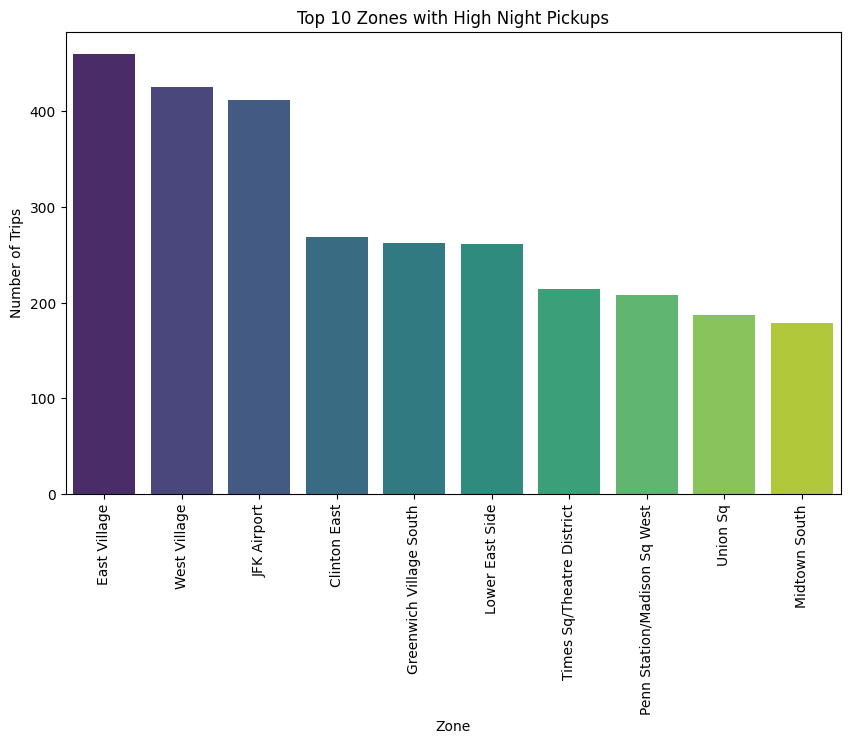

In [376]:
visualize_top_n(top_night_pickup_zones, 10, 'zone_pickup', 'num_trips_pickup',
                'Top 10 Zones with High Night Pickups', 'Zone', 'Number of Trips')

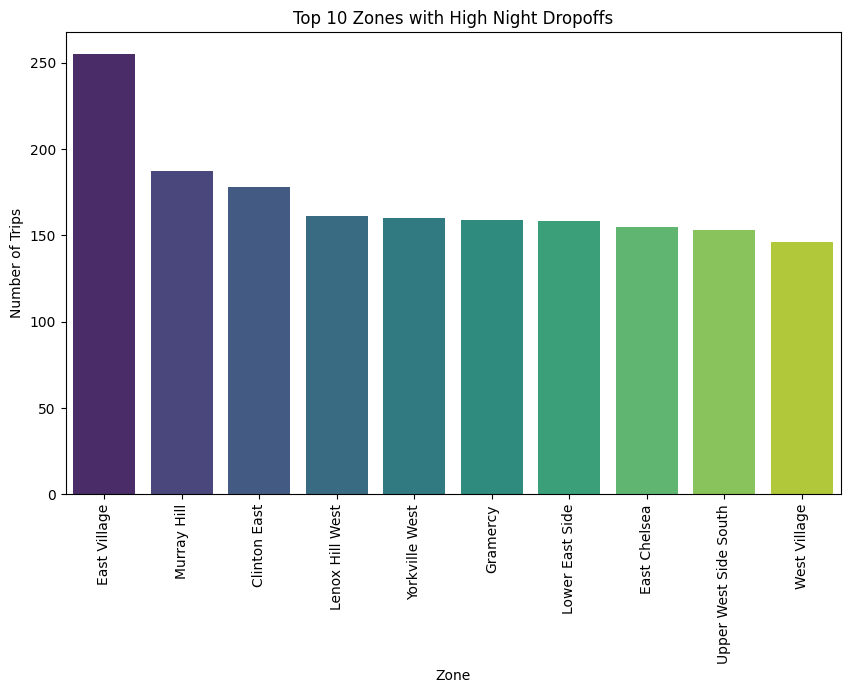

In [377]:
visualize_top_n(top_night_dropoff_zones, 10, 'zone_dropoff', 'num_trips_dropoff',
                'Top 10 Zones with High Night Dropoffs', 'Zone', 'Number of Trips')

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [378]:
# Filter for night hours (11 PM to 5 AM)
# calculate the total_amount sum which should give the revenue
# night_hours_df can be used here, as it is already calculated for previous analysis.
nighttime_revenue = night_hours_df['total_amount'].sum()

day_hours_df = query_on_df(df_merged_zones_pickup_dropoff, 'Hour >= 6 & Hour <= 22')
daytime_revenue = day_hours_df['total_amount'].sum()

# get total revenue across all hours
total_revenue = df_merged_zones_pickup_dropoff['total_amount'].sum()

In [379]:
print(f"Nighttime Revenue: ${nighttime_revenue:.2f}")
print(f"Daytime Revenue: ${daytime_revenue:.2f}")
print(f"Total Revenue: ${total_revenue:.2f}")

Nighttime Revenue: $773933.26
Daytime Revenue: $5659195.47
Total Revenue: $6433128.73


In [380]:
# calculate individual revenue percentages
nighttime_percentage = (nighttime_revenue / total_revenue) * 100
daytime_percentage = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Percentage: {nighttime_percentage:.2f}%")
print(f"Daytime Revenue Percentage: {daytime_percentage:.2f}%")

Nighttime Revenue Percentage: 12.03%
Daytime Revenue Percentage: 87.97%


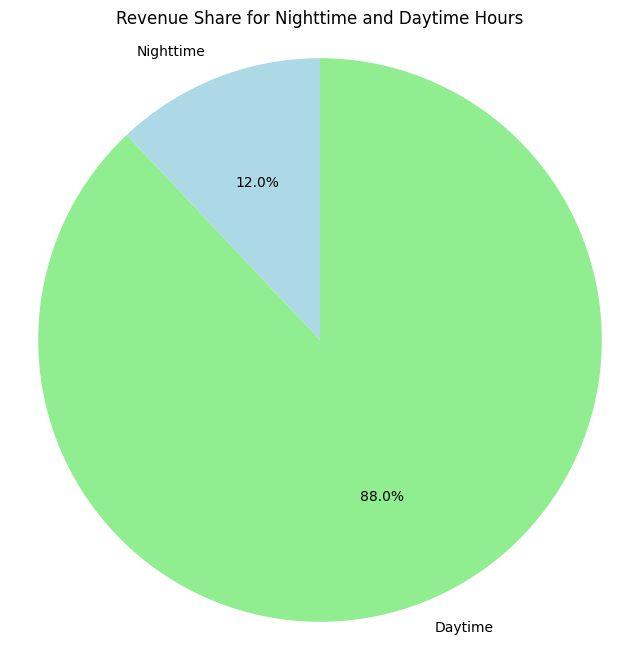

In [381]:
#visualize the revenue percentage
labels = ['Nighttime', 'Daytime']
sizes = [nighttime_percentage, daytime_percentage]
colors = ['lightblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Revenue Share for Nighttime and Daytime Hours')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [382]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate the fare per mile for each trip
df_merged_zones_pickup_dropoff['fare_per_mile'] = df_merged_zones_pickup_dropoff['fare_amount'] / df_merged_zones_pickup_dropoff['trip_distance']

# Group by passenger_count and calculate the average fare per mile for each passenger count
passenger_fare_stats = df_merged_zones_pickup_dropoff.groupby('passenger_count')['fare_per_mile'].mean().reset_index()

# Calculate fare per mile per passenger
passenger_fare_stats['fare_per_mile_per_passenger'] = passenger_fare_stats['fare_per_mile'] / passenger_fare_stats['passenger_count']

# Print the result
print(passenger_fare_stats)

   passenger_count  fare_per_mile  fare_per_mile_per_passenger
0              1.0       9.464988                     9.464988
1              2.0      10.047278                     5.023639
2              3.0       9.347214                     3.115738
3              4.0      14.386721                     3.596680
4              5.0       7.896768                     1.579354
5              6.0       7.546188                     1.257698


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [383]:
# Compare the average fare per mile for different days and for different times of the day
avg_fare_per_mile_by_day = df_merged_zones_pickup_dropoff.groupby('day_of_week')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')

avg_fare_per_mile_by_hour = df_merged_zones_pickup_dropoff.groupby('Hour')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')

In [384]:
avg_fare_per_mile_by_day['day_of_week'].value_counts()

day_of_week
0    1
1    1
2    1
3    1
4    1
5    1
6    1
Name: count, dtype: int64

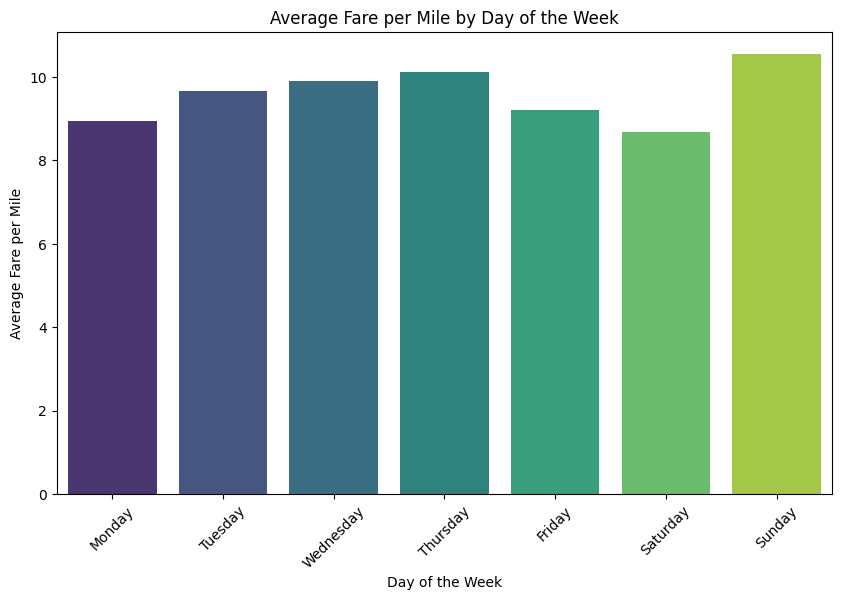

In [385]:
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Replace the integers in 'day_of_week' with the actual day names
avg_fare_per_mile_by_day['day_of_week'] = avg_fare_per_mile_by_day['day_of_week'].map(day_mapping)

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='avg_fare_per_mile', data=avg_fare_per_mile_by_day, palette='viridis')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=45)
plt.show()

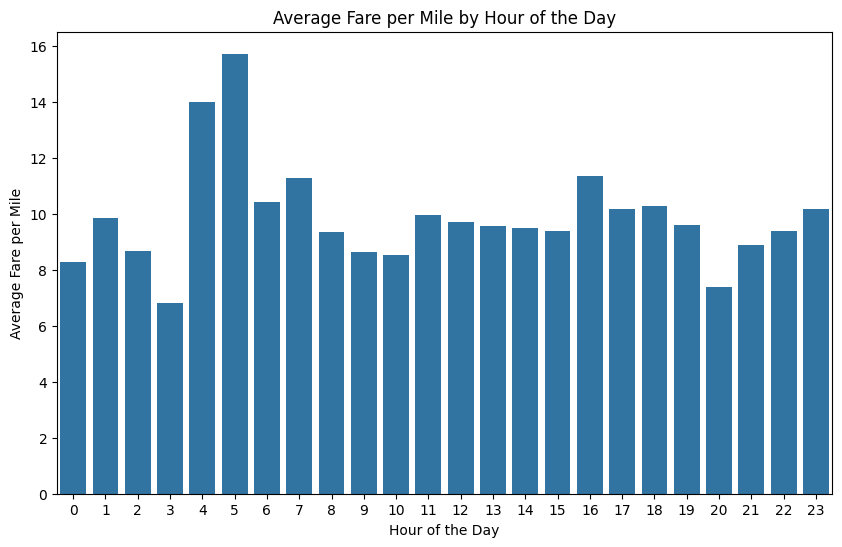

In [386]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='avg_fare_per_mile', data=avg_fare_per_mile_by_hour)
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(0, 24, 1))
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [387]:
# Compare fare per mile for different vendors
avg_fare_per_mile_vendor_hour = df_merged_zones_pickup_dropoff.groupby(['VendorID', 'Hour'])['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')

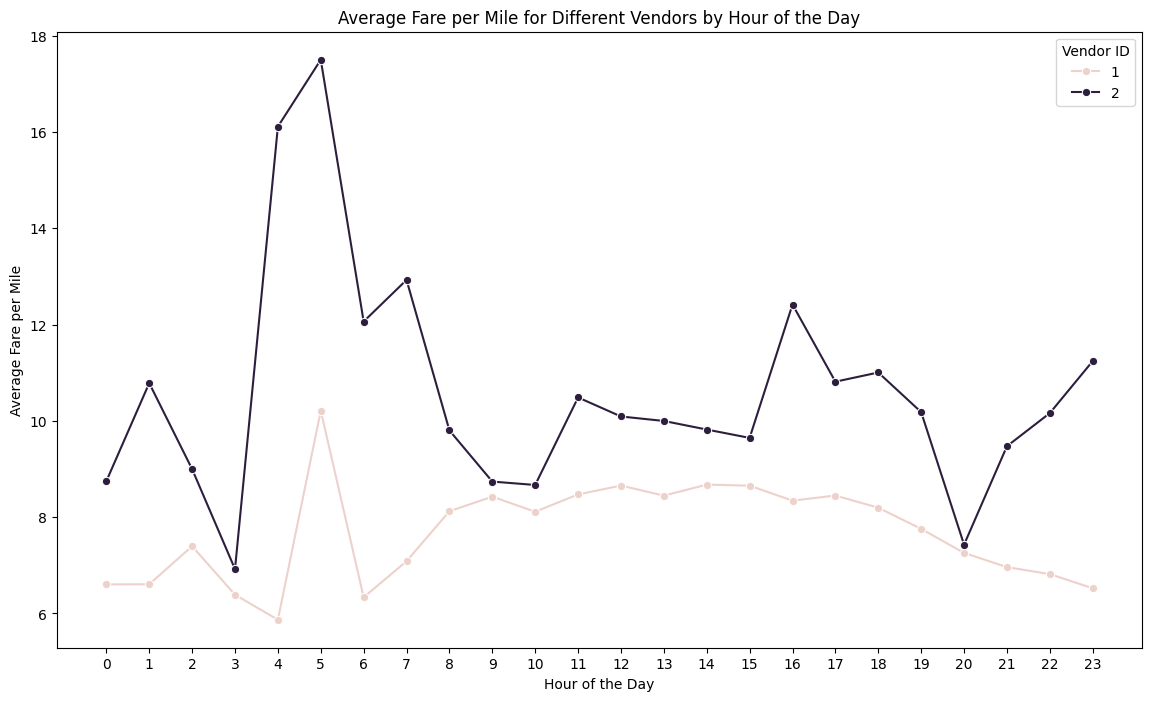

In [388]:
plt.figure(figsize=(14, 8))

# Plot the data
sns.lineplot(data=avg_fare_per_mile_vendor_hour, x='Hour', y='avg_fare_per_mile', hue='VendorID', marker='o')

# Add plot titles and labels
plt.title('Average Fare per Mile for Different Vendors by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(0, 24, 1))  # Set x-axis ticks to display each hour
plt.legend(title='Vendor ID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [389]:
# Defining distance tiers
# use df_merged_zones_pickup_dropoff
df_2_miles = query_on_df(df_merged_zones_pickup_dropoff, 'trip_distance <= 2')
df_2_to_5_miles = query_on_df(df_merged_zones_pickup_dropoff, 'trip_distance > 2 & trip_distance <= 5')
df_above_5_miles = query_on_df(df_merged_zones_pickup_dropoff, 'trip_distance > 5')


In [390]:
# Calculate the average fare per mile for each vendor and distance range
avg_fare_per_mile_2_miles = df_2_miles.groupby('VendorID')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile_2_miles')
avg_fare_per_mile_2_to_5_miles = df_2_to_5_miles.groupby('VendorID')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile_2_to_5_miles')
avg_fare_per_mile_above_5_miles = df_above_5_miles.groupby('VendorID')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile_above_5_miles')

In [391]:
# merge to one for comparison
fare_comparison_across_vendors_distance_tiers = avg_fare_per_mile_2_miles.merge(avg_fare_per_mile_2_to_5_miles, on='VendorID', how='outer')\
    .merge(avg_fare_per_mile_above_5_miles, on='VendorID', how='outer')

In [392]:
# check if there are any duplicates
fare_comparison_across_vendors_distance_tiers[fare_comparison_across_vendors_distance_tiers.duplicated()]

Empty DataFrame
Columns: [VendorID, avg_fare_per_mile_2_miles, avg_fare_per_mile_2_to_5_miles, avg_fare_per_mile_above_5_miles]
Index: []

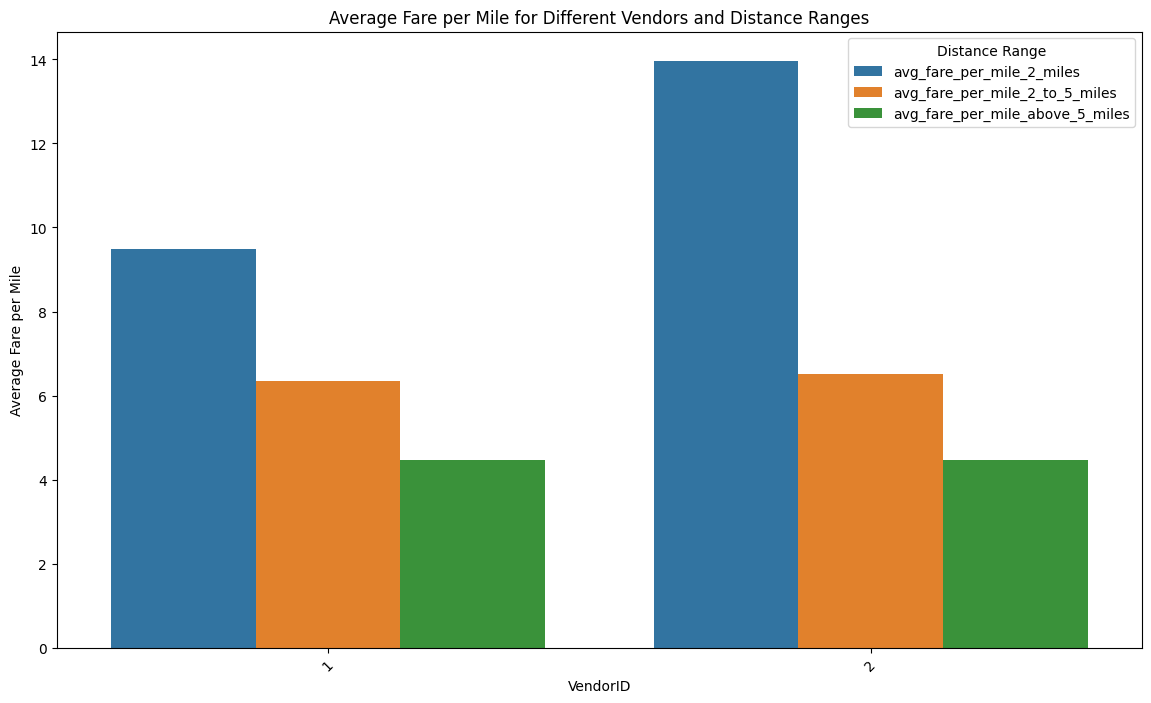

In [393]:
# Reshape the dataframe for easier plotting (melt it)
fare_comparison_melted = fare_comparison_across_vendors_distance_tiers.melt(id_vars='VendorID', var_name='distance_range', value_name='avg_fare_per_mile')

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot the data
sns.barplot(x='VendorID', y='avg_fare_per_mile', hue='distance_range', data=fare_comparison_melted)

# Add plot titles and labels
plt.title('Average Fare per Mile for Different Vendors and Distance Ranges')
plt.xlabel('VendorID')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=45)
plt.legend(title='Distance Range')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [394]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# create tip_percentage column
df_merged_zones_pickup_dropoff['tip_percentage'] = (df_merged_zones_pickup_dropoff['tip_amount'] / df_merged_zones_pickup_dropoff['total_amount']) * 100


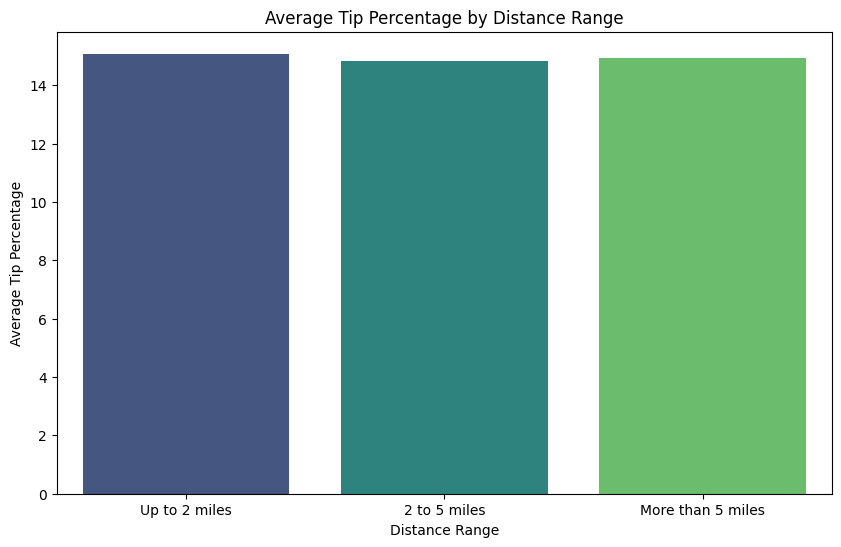

In [395]:
# analyze this based on distances
df_merged_zones_pickup_dropoff['distance_range'] = pd.cut(df_merged_zones_pickup_dropoff['trip_distance'],
                                           bins=[0, 2, 5, float('inf')],
                                           labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'])

avg_tip_percentage_by_distance = df_merged_zones_pickup_dropoff.groupby('distance_range')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')

# visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_range', y='avg_tip_percentage', data=avg_tip_percentage_by_distance, palette='viridis')

plt.title('Average Tip Percentage by Distance Range')
plt.xlabel('Distance Range')
plt.ylabel('Average Tip Percentage')
plt.show()

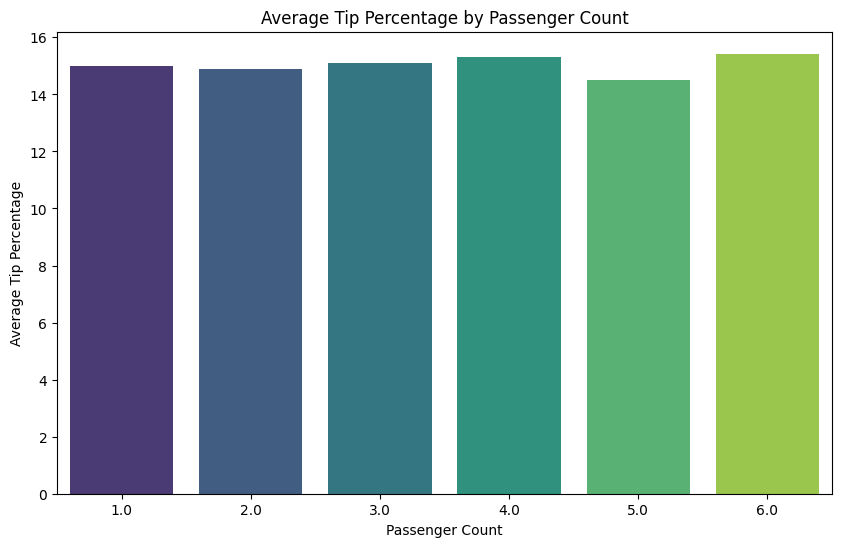

In [396]:
# analyze based on passenger_count
avg_tip_percentage_by_passenger_count = df_merged_zones_pickup_dropoff.groupby('passenger_count')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')

# visualize them
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='avg_tip_percentage', data=avg_tip_percentage_by_passenger_count, palette='viridis')

plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()

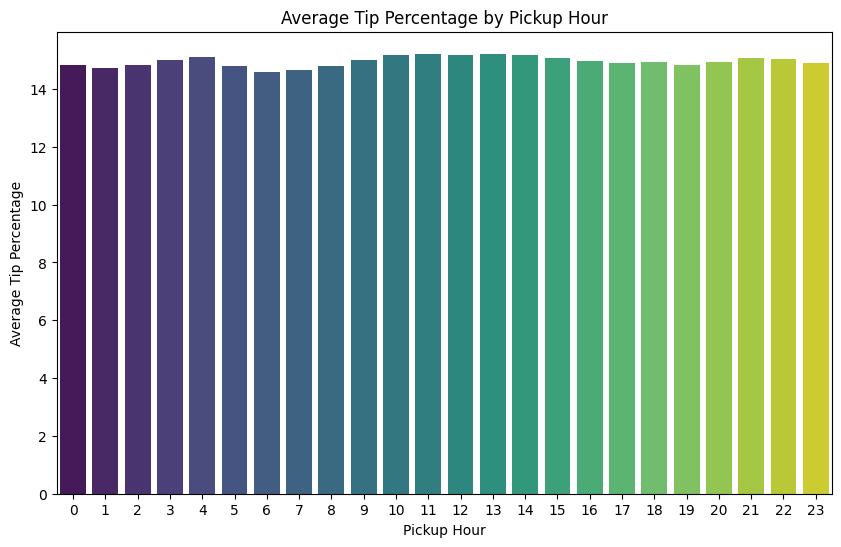

In [397]:
# analyze the same based on pickup time
avg_tip_percentage_by_hour = df_merged_zones_pickup_dropoff.groupby('Hour')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')

# visualize it
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='avg_tip_percentage', data=avg_tip_percentage_by_hour, palette='viridis')

plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [398]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_df = query_on_df(df_merged_zones_pickup_dropoff, 'tip_percentage < 10')
high_tip_df = query_on_df(df_merged_zones_pickup_dropoff, 'tip_percentage > 25')


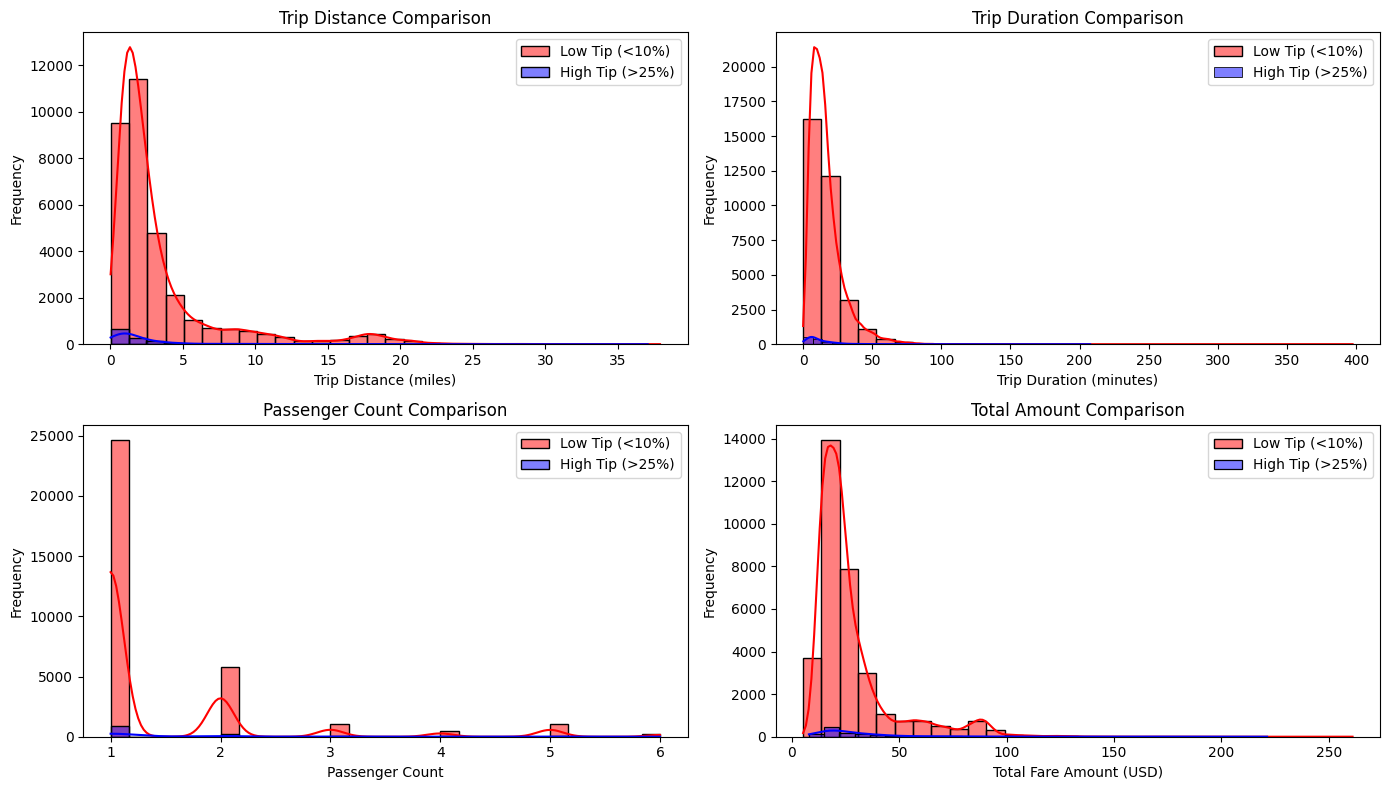

In [399]:
low_tip_summary = low_tip_df[['trip_distance', 'trip_duration_mins', 'passenger_count', 'total_amount']].describe()
high_tip_summary = high_tip_df[['trip_distance', 'trip_duration_mins', 'passenger_count', 'total_amount']].describe()

# Step 3: Compare using Visualizations
plt.figure(figsize=(14, 8))

# Plot for Trip Distance
plt.subplot(2, 2, 1)
sns.histplot(low_tip_df['trip_distance'], color='red', label='Low Tip (<10%)', kde=True, bins=30)
sns.histplot(high_tip_df['trip_distance'], color='blue', label='High Tip (>25%)', kde=True, bins=30)
plt.title('Trip Distance Comparison')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.legend()

# Plot for Trip Duration
plt.subplot(2, 2, 2)
sns.histplot(low_tip_df['trip_duration_mins'], color='red', label='Low Tip (<10%)', kde=True, bins=30)
sns.histplot(high_tip_df['trip_duration_mins'], color='blue', label='High Tip (>25%)', kde=True, bins=30)
plt.title('Trip Duration Comparison')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()

# Plot for Passenger Count
plt.subplot(2, 2, 3)
sns.histplot(low_tip_df['passenger_count'], color='red', label='Low Tip (<10%)', kde=True, bins=30)
sns.histplot(high_tip_df['passenger_count'], color='blue', label='High Tip (>25%)', kde=True, bins=30)
plt.title('Passenger Count Comparison')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.legend()

# Plot for Total Amount (Fare)
plt.subplot(2, 2, 4)
sns.histplot(low_tip_df['total_amount'], color='red', label='Low Tip (<10%)', kde=True, bins=30)
sns.histplot(high_tip_df['total_amount'], color='blue', label='High Tip (>25%)', kde=True, bins=30)
plt.title('Total Amount Comparison')
plt.xlabel('Total Fare Amount (USD)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [400]:
# See how passenger count varies across hours and days
hourly_passenger_count = df_merged_zones_pickup_dropoff.groupby('Hour')['passenger_count'].mean().reset_index(name='avg_passenger_count')
weekly_passenger_count = df_merged_zones_pickup_dropoff.groupby('day_of_week')['passenger_count'].mean().reset_index(name='avg_passenger_count')

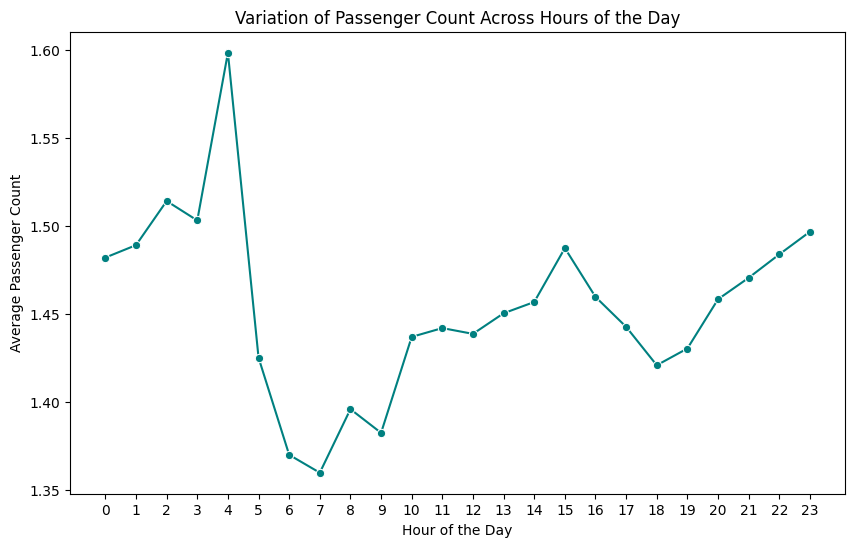

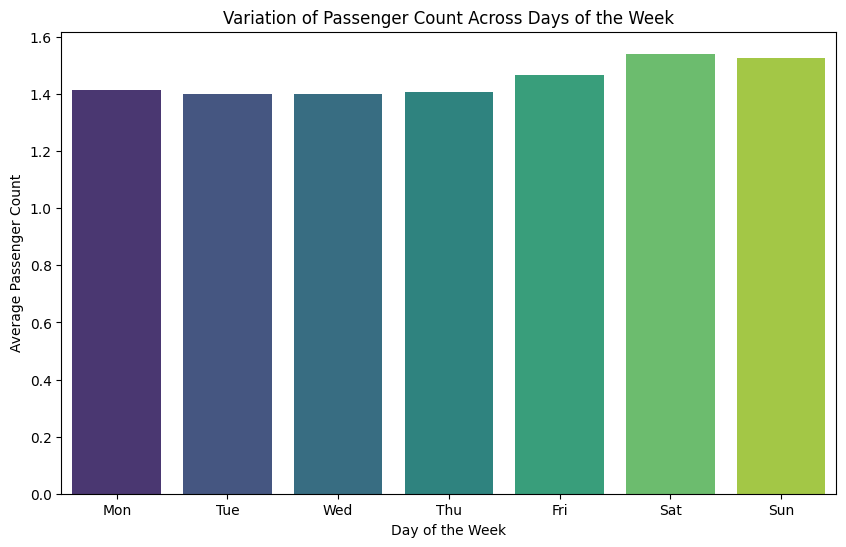

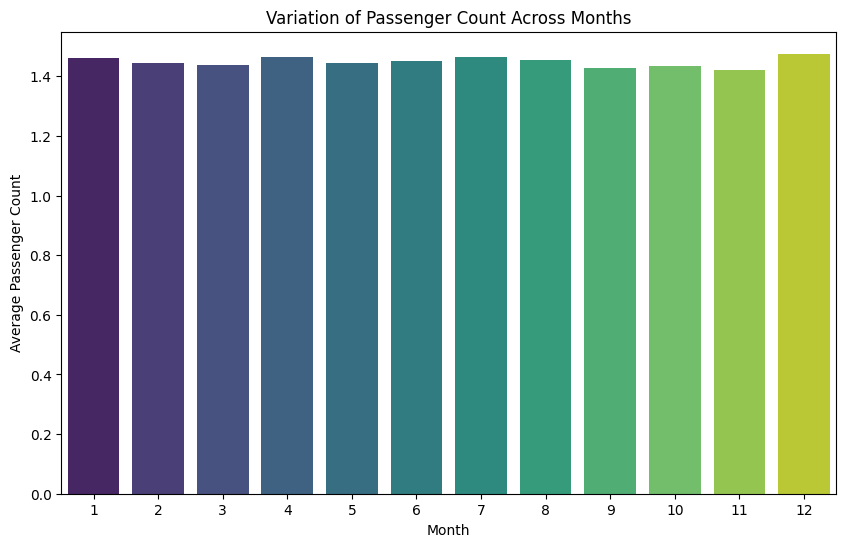

In [404]:
# Visualize the variation across hours of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='avg_passenger_count', data=hourly_passenger_count, marker='o', color='teal')
plt.title('Variation of Passenger Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))  # To ensure we show all hours
plt.show()

# Visualize the variation across days of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='avg_passenger_count', data=weekly_passenger_count, palette='viridis')
plt.title('Variation of Passenger Count Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# visualize the variation across months
monthly_passenger_count = df_merged_zones_pickup_dropoff.groupby('Month')['passenger_count'].mean().reset_index(name='avg_passenger_count')
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='avg_passenger_count', data=monthly_passenger_count, palette='viridis')
plt.title('Variation of Passenger Count Across Months')
plt.xlabel('Month')
plt.ylabel('Average Passenger Count')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

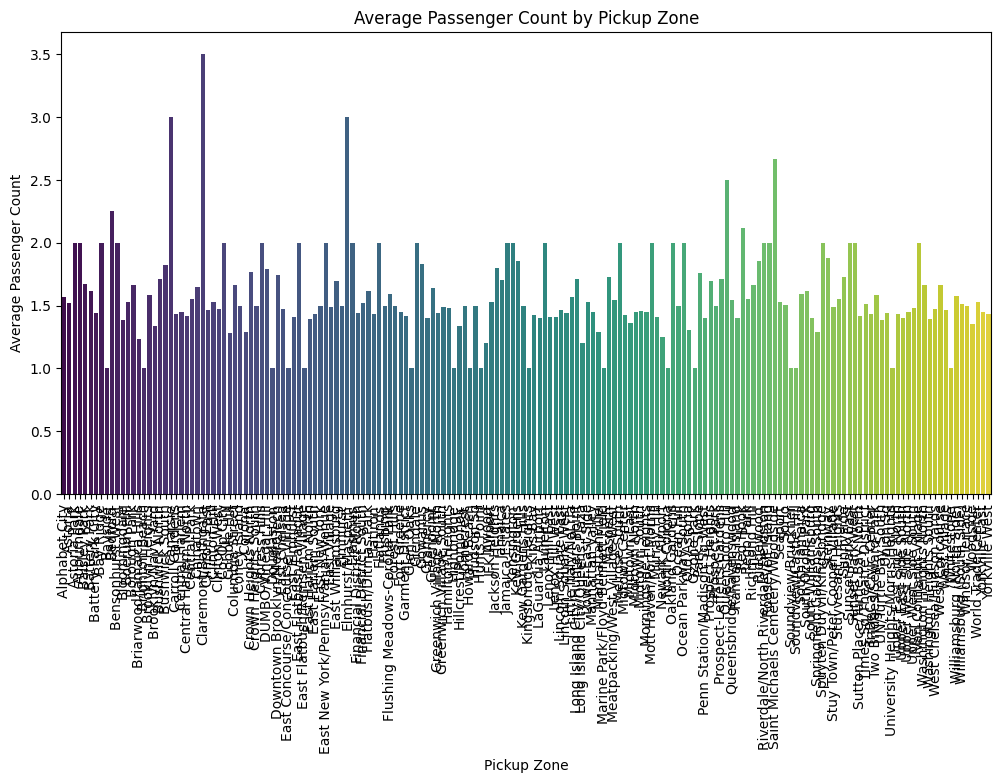

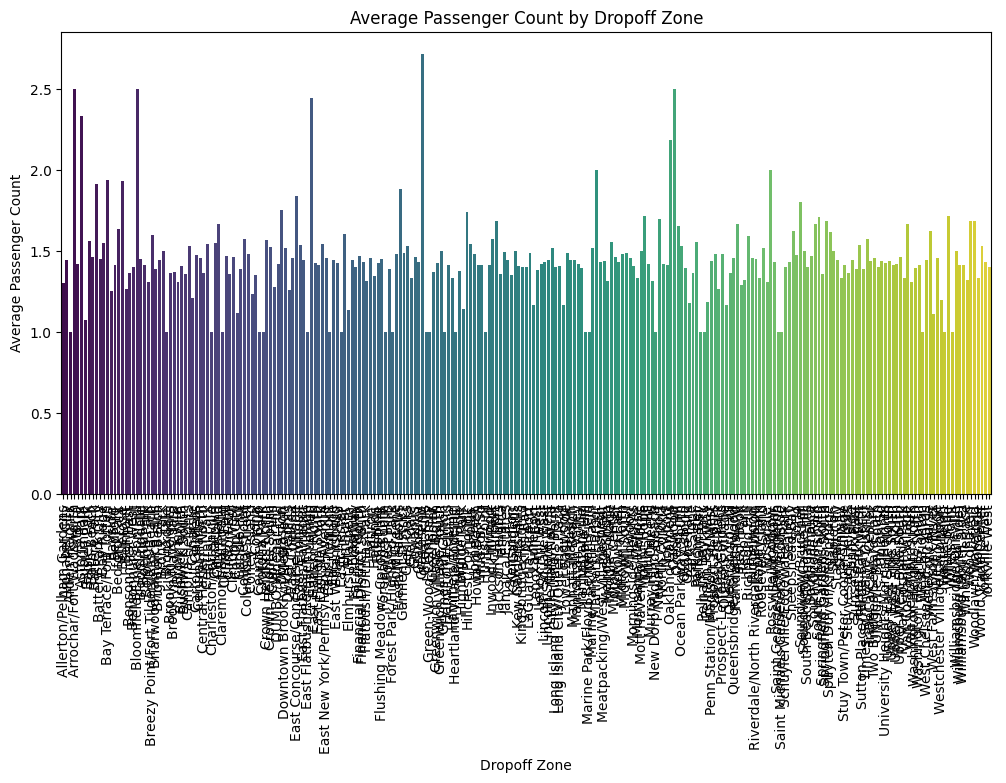

In [405]:
# How does passenger count vary across zones
pickup_zone_stats = df_merged_zones_pickup_dropoff.groupby('zone_pickup')['passenger_count'].mean().reset_index(name='avg_passenger_count')

# Group by dropoff zone and calculate average passenger count for each zone
dropoff_zone_stats = df_merged_zones_pickup_dropoff.groupby('zone_dropoff')['passenger_count'].mean().reset_index(name='avg_passenger_count')

# Visualize the variation of passenger count across pickup zones
plt.figure(figsize=(12, 6))
sns.barplot(x='zone_pickup', y='avg_passenger_count', data=pickup_zone_stats, palette='viridis')
plt.title('Average Passenger Count by Pickup Zone')
plt.xlabel('Pickup Zone')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Visualize the variation of passenger count across dropoff zones
plt.figure(figsize=(12, 6))
sns.barplot(x='zone_dropoff', y='avg_passenger_count', data=dropoff_zone_stats, palette='viridis')
plt.title('Average Passenger Count by Dropoff Zone')
plt.xlabel('Dropoff Zone')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

**Observation**: Visualization using bar plot for all zones, is not readable.<br>Unless we want to see top-n.<br>Let's use zone information, to visualize them in the map.

In [406]:
zones_with_trip_counts.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'num_trips_pickup'],
      dtype='object')

In [407]:
df_merged_zones_pickup_dropoff.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Month', 'Day', 'Hour',
       'Airport_fee', 'IsImputed', 'trip_duration_mins', 'calculated_total',
       'difference', 'day_of_week', 'day_name', 'OBJECTID_pickup',
       'Shape_Leng_pickup', 'Shape_Area_pickup', 'zone_pickup',
       'LocationID_pickup', 'borough_pickup', 'geometry_pickup', 'IsWeekend',
       'OBJECTID_dropoff', 'Shape_Leng_dropoff', 'Shape_Area_dropoff',
       'zone_dropoff', 'LocationID_dropoff', 'borough_dropoff',
       'geometry_dropoff', 'fare_per_mile', 'tip_percentage',
       'distance_range'],
      dtype='object')

In [408]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_count = df_merged_zones_pickup_dropoff.groupby('zone_pickup')['passenger_count'].mean().reset_index()
zones_with_trip_counts = zones_with_trip_counts.merge(avg_passenger_count,
                                                      left_on='zone', right_on='zone_pickup',
                                                      how='left')



In [409]:
# visualize now
zones_with_trip_counts.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   num_trips_pickup     zone_pickup  passenger_count  
0               4.0  Newark Airport         1.250000  
1               NaN             NaN              NaN  
2               NaN             NaN              NaN  
3             245.0   Alphabet City         1.567347  
4               NaN             NaN              NaN

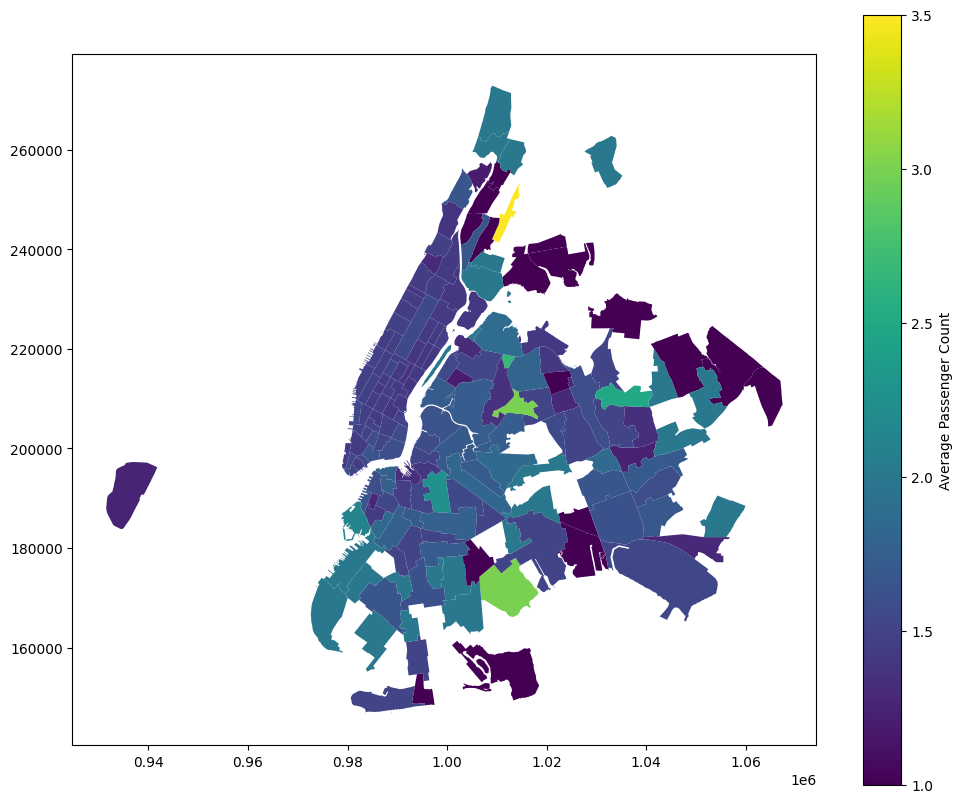

In [410]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_with_trip_counts.plot(column='passenger_count', ax=ax, legend=True,
                            legend_kwds={'label': "Average Passenger Count", 'orientation': "vertical"})
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [411]:
# How often is each surcharge applied?
# find where extra is applied
extra_charges_df = query_on_df(df_merged_zones_pickup_dropoff, 'extra > 0')

extra_charges_df.head(1)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:54:15   2023-01-01 01:01:43              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.3         1.0                  N            90           211   

   payment_type  ...  OBJECTID_dropoff  Shape_Leng_dropoff  \
0             1  ...             211.0            0.025235   

   Shape_Area_dropoff  zone_dropoff  LocationID_dropoff  borough_dropoff  \
0             0.00004          SoHo               211.0        Manhattan   

                                    geometry_dropoff  fare_per_mile  \
0  POLYGON ((983827.65 201526.658, 983727.737 201...       7.153846   

   tip_percentage  distance_range  
0       14.503817   Up to 2 miles  

[1 rows x 46 columns]

In [412]:
# first identify for pickups
# Group by the pickup zone and count the number of trips with extra charges
pickup_extra_count = extra_charges_df.groupby('zone_pickup').size().reset_index(name='extra_charge_count')

# Sort by the count of extra charges in descending order
pickup_extra_count = pickup_extra_count.sort_values(by='extra_charge_count', ascending=False)

# Display the top zones with the most extra charges
pickup_extra_count.head(10)

zone_pickup  extra_charge_count
61              LaGuardia Airport                7517
75                 Midtown Center                6608
114         Upper East Side South                6142
113         Upper East Side North                5137
76                   Midtown East                5109
64            Lincoln Square East                4687
108     Times Sq/Theatre District                4543
85   Penn Station/Madison Sq West                4348
55                    JFK Airport                4323
81                    Murray Hill                4086

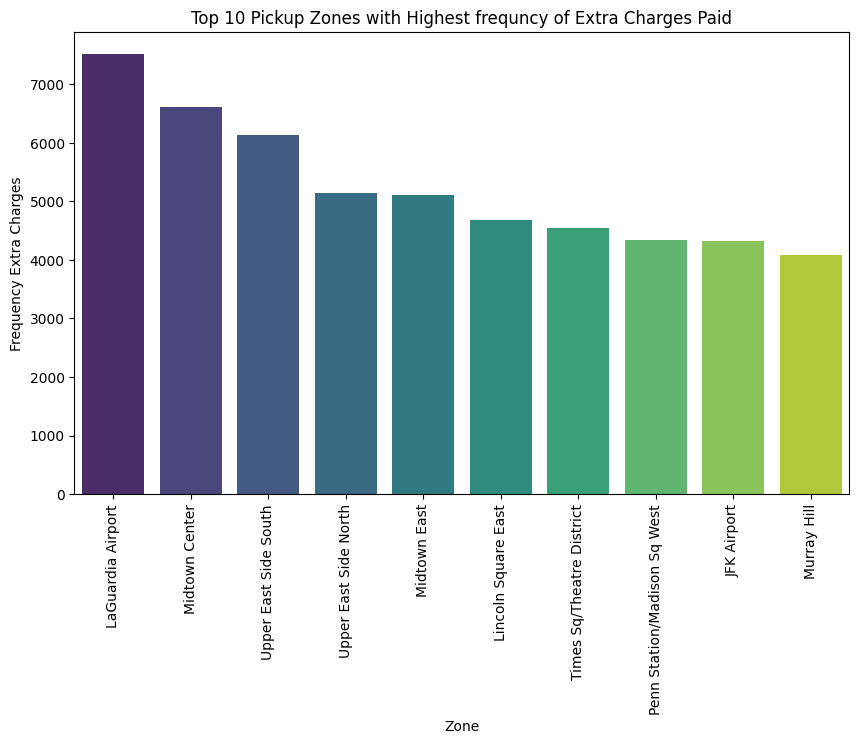

In [413]:
# visualize the extra charges across zones
#visualize_top_n(top_10_extra_charges, 10, 'zone_pickup', 'extra',
#                'Top 10 Zones with Highest Extra Charges', 'Zone', 'Extra Charges')
visualize_top_n(pickup_extra_count, 10, 'zone_pickup', 'extra_charge_count',
                'Top 10 Pickup Zones with Highest frequncy of Extra Charges Paid', 'Zone', 'Frequency Extra Charges')

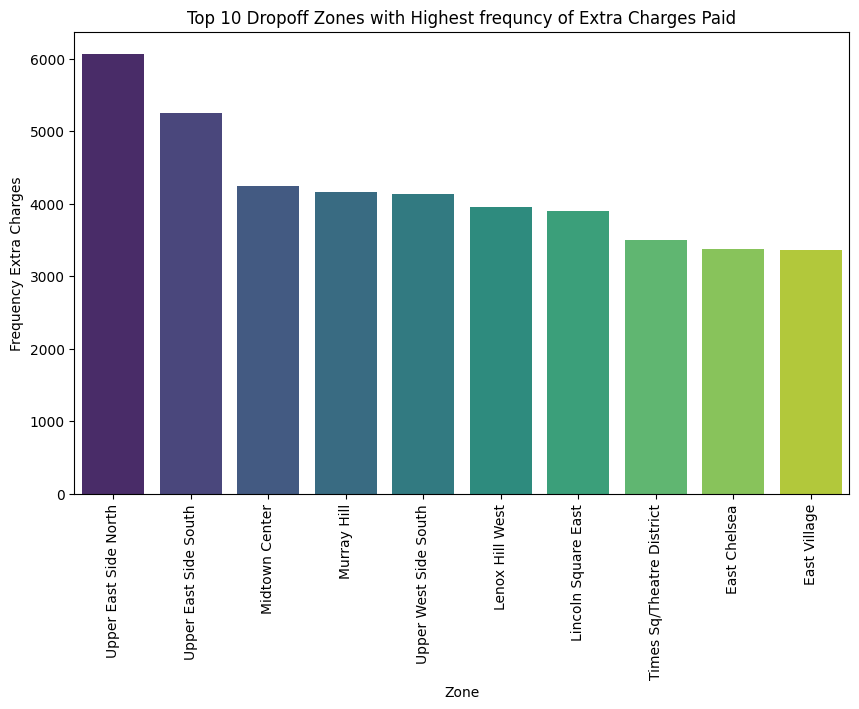

In [414]:
# let's visualize for drop off zones now
# Group by the dropoff zone and count the number of trips with extra charges
dropoff_extra_count = extra_charges_df.groupby('zone_dropoff').size().reset_index(name='extra_charge_count')

visualize_top_n(dropoff_extra_count, 10, 'zone_dropoff', 'extra_charge_count',
                'Top 10 Dropoff Zones with Highest frequncy of Extra Charges Paid', 'Zone', 'Frequency Extra Charges')

In [416]:
high_traffic_demand_routes.columns

Index(['Hour', 'PULocationID', 'DOLocationID', 'total_distance',
       'total_trip_duration', 'num_trips', 'average_speed'],
      dtype='object')

In [417]:
df_merged_zones_pickup_dropoff.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Month', 'Day', 'Hour',
       'Airport_fee', 'IsImputed', 'trip_duration_mins', 'calculated_total',
       'difference', 'day_of_week', 'day_name', 'OBJECTID_pickup',
       'Shape_Leng_pickup', 'Shape_Area_pickup', 'zone_pickup',
       'LocationID_pickup', 'borough_pickup', 'geometry_pickup', 'IsWeekend',
       'OBJECTID_dropoff', 'Shape_Leng_dropoff', 'Shape_Area_dropoff',
       'zone_dropoff', 'LocationID_dropoff', 'borough_dropoff',
       'geometry_dropoff', 'fare_per_mile', 'tip_percentage',
       'distance_range'],
      dtype='object')

In [419]:
# merge high_traffic_demand_routes to df_merged_zones_pickup_dropoff
high_traffic_zones_merged = df_merged_zones_pickup_dropoff.merge(
    high_traffic_demand_routes[['PULocationID', 'DOLocationID', 'Hour', 'average_speed']],
    how='left',
    left_on=['PULocationID', 'DOLocationID'],
    right_on=['PULocationID', 'DOLocationID'],
)

In [420]:
high_traffic_zones_merged.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Month', 'Day', 'Hour_x',
       'Airport_fee', 'IsImputed', 'trip_duration_mins', 'calculated_total',
       'difference', 'day_of_week', 'day_name', 'OBJECTID_pickup',
       'Shape_Leng_pickup', 'Shape_Area_pickup', 'zone_pickup',
       'LocationID_pickup', 'borough_pickup', 'geometry_pickup', 'IsWeekend',
       'OBJECTID_dropoff', 'Shape_Leng_dropoff', 'Shape_Area_dropoff',
       'zone_dropoff', 'LocationID_dropoff', 'borough_dropoff',
       'geometry_dropoff', 'fare_per_mile', 'tip_percentage', 'distance_range',
       'Hour_y', 'average_speed'],
      dtype='object')

In [421]:
# let's check where congestion_surcharge is paid
# from the zones capped with 50 percentile on High Demand High Traffic zones.
high_traffic_zones_congestion_charges_paid_df = query_on_df(high_traffic_zones_merged, 'congestion_surcharge > 0')
high_traffic_zones_congestion_charges_not_paid_df = query_on_df(high_traffic_zones_merged, 'congestion_surcharge <= 0')

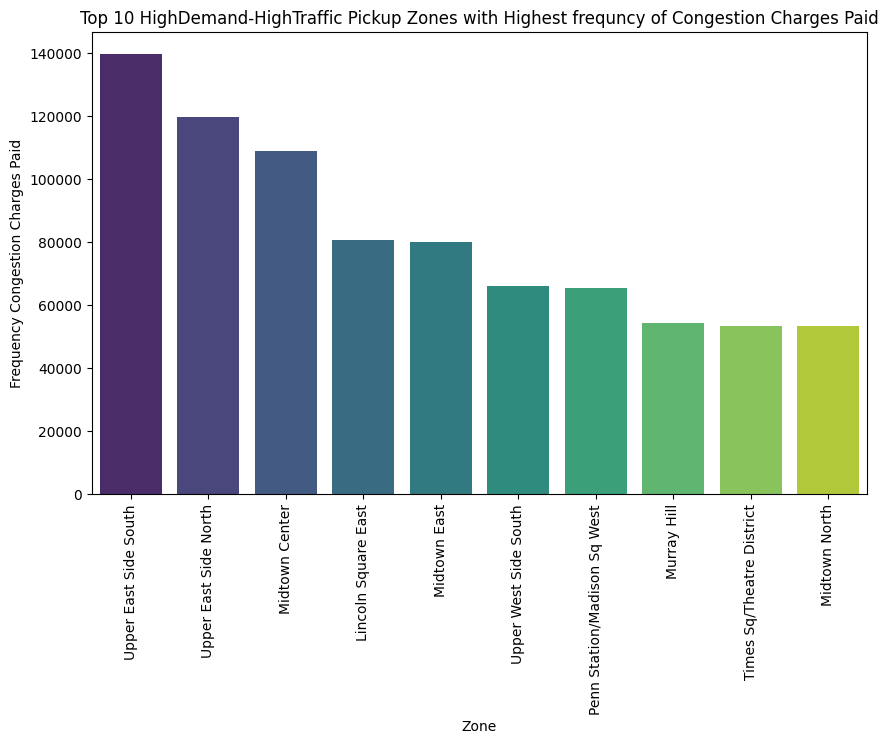

In [422]:
# visualize top 10 zones where congestion_surcharge is paid and it is part of congestion zones
pickup_cong_charge_count_high_demand_high_traffic_zones = high_traffic_zones_congestion_charges_paid_df.groupby('zone_pickup').size().reset_index(name='cong_charge_count')

visualize_top_n(pickup_cong_charge_count_high_demand_high_traffic_zones, 10, 'zone_pickup', 'cong_charge_count',
                'Top 10 HighDemand-HighTraffic Pickup Zones with Highest frequncy of Congestion Charges Paid', 'Zone', 'Frequency Congestion Charges Paid')

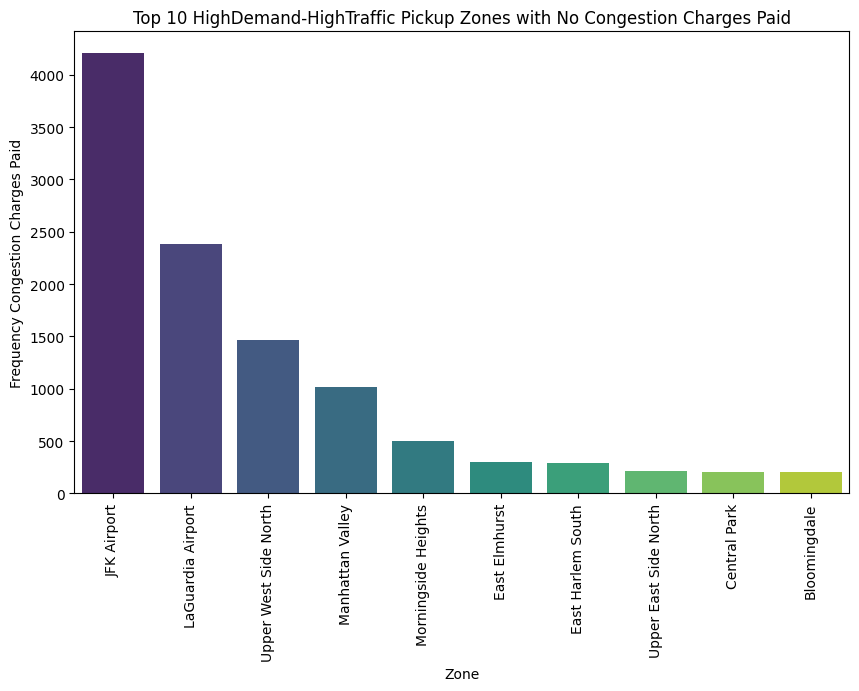

In [423]:
# visualize top 10 zones where congestion_surcharge is paid and it is part of congestion zones
pickup_cong_charge_not_paid_count_high_demand_high_traffic_zones = high_traffic_zones_congestion_charges_not_paid_df.groupby('zone_pickup').size().reset_index(name='cong_charge_count')

visualize_top_n(pickup_cong_charge_not_paid_count_high_demand_high_traffic_zones, 10, 'zone_pickup', 'cong_charge_count',
                'Top 10 HighDemand-HighTraffic Pickup Zones with No Congestion Charges Paid', 'Zone', 'Frequency Congestion Charges Paid')

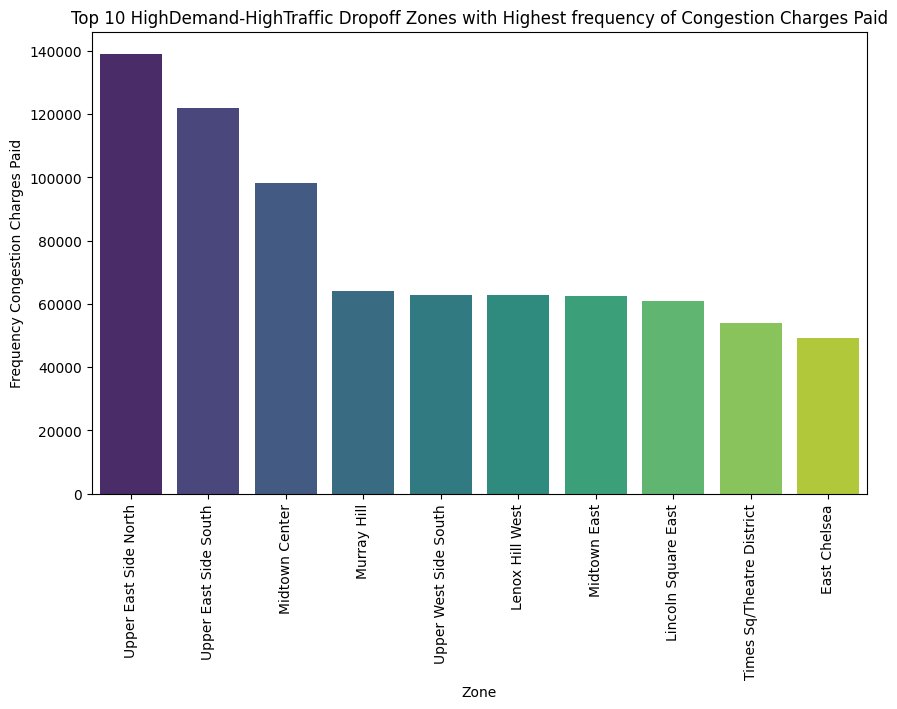

In [424]:
# visualize top 10 drop off zones where congestion_surcharge is paid and it is part of congestion zones
dropoff_cong_charge_count_high_demand_high_traffic_zones = high_traffic_zones_congestion_charges_paid_df.groupby('zone_dropoff').size().reset_index(name='cong_charge_count')

visualize_top_n(dropoff_cong_charge_count_high_demand_high_traffic_zones, 10, 'zone_dropoff', 'cong_charge_count',
                'Top 10 HighDemand-HighTraffic Dropoff Zones with Highest frequency of Congestion Charges Paid', 'Zone', 'Frequency Congestion Charges Paid')

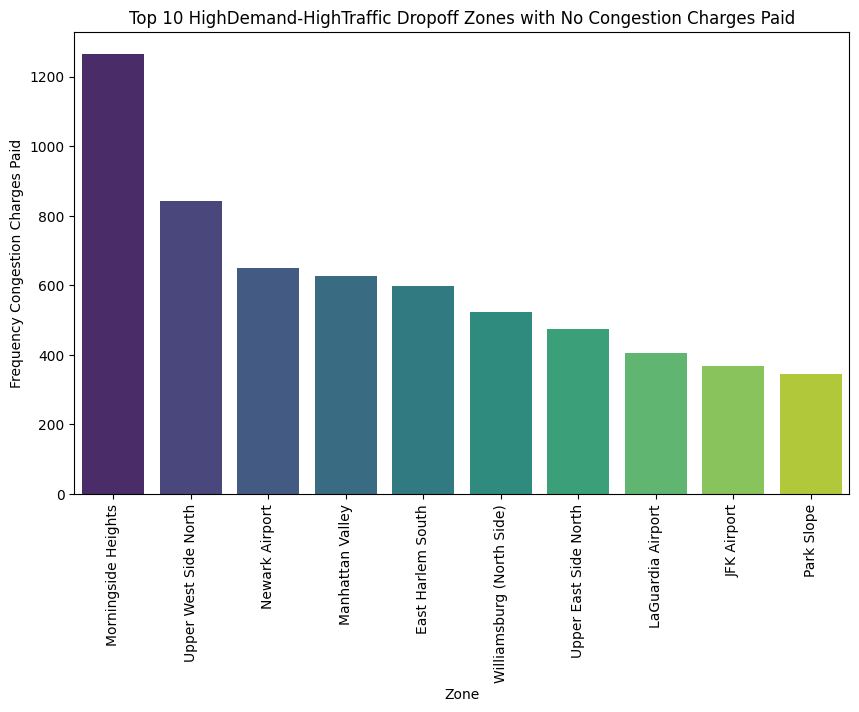

In [425]:
# visualize top 10 drop off zones where congestion_surcharge is not paid and it is part of congestion zones
dropoff_cong_charge_count_not_paid_high_demand_high_traffic_zones = high_traffic_zones_congestion_charges_not_paid_df.groupby('zone_dropoff').size().reset_index(name='cong_charge_count')

visualize_top_n(dropoff_cong_charge_count_not_paid_high_demand_high_traffic_zones, 10, 'zone_dropoff', 'cong_charge_count',
                'Top 10 HighDemand-HighTraffic Dropoff Zones with No Congestion Charges Paid', 'Zone', 'Frequency Congestion Charges Paid')

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

•	Peak Hours and High Traffic Zones:
1. Insights:
* The analysis indicates 6pm is the peak hour with a significant surge in trips, especially in office-heavy areas.
* During weekdays, evening hours see the most demand due to people leaving their workplaces. <br>
2. Recommendations:
* Dispatch more cabs to Midtown Center and Upper East Side areas, and other zones as per analysis in the late afternoon, around 5pm to 7pm, to ensure high service availability.

•	Low Demand in Night Hours:
1. Insights:
*	During late-night hours (2am to 6am), there is low demand, especially for general passenger trips.
2. Recommendations:
*	These hours can be leveraged for repositioning cabs to airport zones (JFK, LaGuardia) or long-distance routes where potential demand for early morning flights or rides to major terminals could be forecasted.

•	Special Focus on Weekends:
1. Insights:
*	The data suggests a calmer demand on Sundays, with more trips during lunch and early dinner hours on Saturdays.
2. Recommendations:
*	Consider offering weekend promotions or discounts to increase demand and ensure a smoother flow of customers during these quieter times.

•	Operational Efficiency for Airports:
1. Insights:
*	JFK Airport, identified as having the slowest average speed, could benefit from improved traffic management and shuttle routes.
2. Recommendations:
*	Dispatching cabs with shorter travel times during peak hours could reduce delays and improve overall efficiency.

•	Timely Cab Deployment for Mid-Week:
1. Insights:
*	Observing higher demand on Wednesdays and Thursdays suggests the need for better planning and increased fleet availability in office-heavy regions during these mid-weekdays.
2. Recommendations:
*	More cabs can be deployed between 8am to 10am and 4pm to 7pm to serve the business crowd more effectively.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

•	Top Pick-Up Zones:
1. Recommendations:
*	Focus on the Upper East Side (North and South) and Midtown Center, which consistently show high numbers of pick-ups, especially in the morning (6am - 10am) and evening (4pm - 8pm) hours.
*	Ensure higher fleet density during peak hours and direct the fleet towards these high-demand zones to reduce waiting times.

•	Airport Focused Strategy:
1. Insights:
*	JFK and LaGuardia airports show consistently high pick-up demand, but JFK has the slowest average speed.
2. Recommendations:
*	More cabs should be positioned at these airports for flights arriving and departing during busy periods.
*	Additionally, optimizing airport-related traffic could help streamline operations at these congested zones.

•	Localized Travel and Commute:
1. Insights:
*	Observing that Upper East Side North and South have a high frequency of pick-ups and drop-offs, with several trips staying within the same local zones, indicates localized demand.
2. Recommendations:
*	Having localized fleets operating mainly within these neighborhoods during midday hours will allow for faster response times and improved service quality for short-distance trips.

•	Midtown Evening Surge:
1. Insights:
*	During evening hours (4pm - 8pm), Midtown Center experiences a surge in pick-ups, which are predominantly dropped off in the Upper East Side North and South areas.
2. Recommendations:
*	Therefore, strategically position cabs in Midtown to serve customers heading to Upper East Side efficiently during the peak evening period.

•	Weekend Strategies:
1. Insights:
*	Weekends show reduced demand except for specific hours such as early dinner and late-night hours.
2. Recommendations:
*	Adjust the fleet availability with more cabs in high-traffic areas like Midtown and West Village to optimize demand during quieter times.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

•	Fare Adjustment Based on Time of Day:
1. Insights:
*	Based on high fare-per-mile observations during early morning (5am) and late evening (4pm), there is a noticeable increase in fare rates during these times, indicating high demand during these peak hours.
2. Recommendations:
*	It may be beneficial to implement a time-based fare structure, with slightly higher pricing during peak hours (e.g., 5am-7am or 4pm-6pm). This will help maximize revenue during high-demand periods while still maintaining competitive rates.

•	Weekend Fare Surge:
1. Insights:
*	Data shows weekend demand is generally lower, except for evening and late-night rides.
2. Recommendations:
*	To further revenue from these quieter days, introducing promotional pricing or discounted fares for weekend trips could increase demand.

•	Distance-Based Fare and Promotions:
1. Insights:
*	A proportional increase in fares for longer trips is observed, as there is a strong correlation between trip distance and fare amount. Popular locations like airports also tend to have longer trips.
2. Recommendations:
*	Maintain the proportional increase in fares for longer trips.
*	Additionally, consider offering promotional discounts or loyalty programs for longer rides or frequent trips to and from popular locations, such as airports, to encourage customer retention and loyalty.

•	Congestion Surcharge Optimization:
1. Insights:
*	Analysis indicates no congestion surcharge applied in high-traffic zones such as JFK Airport and LaGuardia Airport, even though they experience high demand.
2. Recommendations:
*	Adjusting the pricing model to introduce dynamic surcharges during peak traffic hours at these locations could help optimize revenue.
*	Loyalty programs can be extended to passengers plying to Airports frequently and offer some benefits of discounts being applied on surcharges.

•	Vendor-Specific Price Differentiation:
1. Insights:
*	Vendor 2 charges more for 0-2 miles, suggesting potential opportunities for price differentiation.
2. Recommendations:
*	Offering lower pricing for shorter distances and maintaining competitive rates for long-distance travel can balance demand across different segments and boost market share.
